## PROJECT HOUSING: PRICE PREDICTION
### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [2]:
# reading train_dataset and viewing 5 random enteries
train_dataset = pd.read_csv('train.csv')

train_dataset.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
465   1359         160       FV          NaN     2117   Pave   NaN      Reg   
1135   384          45       RH         60.0     9000   Pave   NaN      Reg   
567    934          20       RL         63.0     8487   Pave   NaN      Reg   
476   1102          20       RL         61.0     9758   Pave   NaN      IR1   
244   1344          50       RL         57.0     7558   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
465          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1135         Lvl    AllPub    Corner       Gtl      SawyerW       Norm   
567          Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
476          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
244          Bnk    AllPub    Inside       Gtl      Crawfor       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
465        Norm    Twnhs     2Story            6            5       2000   
1135       Norm     1Fam     1.5Unf            6            3       1928   
567        Norm     1Fam     1Story            7            5       2004   
476        Norm     1Fam     1Story            5            5       1971   
244        Norm     1Fam     1.5Fin            6            6       1928   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
465           2000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1135          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
567           2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   
476           1971     Gable  CompShg     HdBoard     MetalSd       None   
244           1950     Gable  CompShg     BrkFace       Stone       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
465        216.0        Gd        TA      PConc       Gd       TA   
1135         0.0        TA        TA     BrkTil       Fa       Fa   
567        210.0        Gd        TA      PConc       Gd       TA   
476          0.0        TA        TA     CBlock       TA       TA   
244          0.0        TA        TA     BrkTil       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
465            No          GLQ         378          Unf           0   
1135           No          Unf           0          Unf           0   
567            Av          GLQ          20          Unf           0   
476            No          BLQ         412          LwQ         287   
244            No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
465         378          756    GasA        Ex          Y      SBrkr   
1135        784          784    GasA        TA          N      FuseA   
567        1480         1500    GasA        Ex          Y      SBrkr   
476         251          950    GasA        TA          Y      SBrkr   
244         896          896    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
465        769       804             0       1573             0             0   
1135       784         0             0        784             0             0   
567       1500         0             0       1500             0             0   
476        950         0             0        950             0             0   
244       1172       741             0       1913             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
465          2         1             3             1          Gd   
1135         1         0             2             1          TA   
567          2         0             3             1          Gd   
476          1         0             3             1          TA   
244          1         1             3             1          TA   

   

In [3]:
# reading test_dataset and viewing 5 random rows

test_dataset = pd.read_csv('test.csv')

test_dataset.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
161   296          80       RL         37.0     7937   Pave   NaN      IR1   
94    989          60       RL          NaN    12046   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
280    44          20       RL          NaN     9200   Pave   NaN      IR1   
219  1007          20       RL          NaN    12155   Pave   NaN      IR3   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
161         Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
94          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
280         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
219         Lvl    AllPub    Inside       Gtl        NAmes       PosN   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
161       Norm     1Fam       SLvl            6            6       1984   
94        Norm     1Fam     2Story            6            6       1976   
290       Norm     1Fam     1.5Fin            6            7       1947   
280       Norm     1Fam     1Story            5            6       1975   
219       Norm     1Fam     1Story            6            3       1970   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
161          1984     Gable  CompShg     HdBoard     HdBoard       None   
94           1976     Gable  CompShg     Plywood     Plywood    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
280          1980       Hip  CompShg     VinylSd     VinylSd       None   
219          1970     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
161         0.0        TA        TA     CBlock       TA       TA           Av   
94        298.0        TA        TA     CBlock       TA       TA           No   
290         0.0        TA        Gd     CBlock       TA       TA           No   
280         0.0        TA        TA     CBlock       Gd       TA           Av   
219         0.0        TA        TA     CBlock       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
161          GLQ         819          Unf           0        184         1003   
94           LwQ         156          Unf           0        692          848   
290          ALQ         399          Unf           0        605         1004   
280          LwQ         280          BLQ         491        167          938   
219          LwQ        1237          Unf           0        420         1657   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
161    GasA        TA          Y      SBrkr      1003         0             0   
94     GasA        TA          Y      SBrkr      1118       912             0   
290    GasA        Ex          Y      SBrkr      1004       660             0   
280    GasA        TA          Y      SBrkr       938         0             0   
219    GasA        Gd          Y      SBrkr      1657         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
161       1003             1             0         1         0             3   
94        2030             0             0         2         1             4   
290       1664             0             0         2         0             3   
280        938             1             0         1         0             3   
219       1657             0             1         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
161             1          TA             6        Typ           0   
94              1          Gd             8        Typ           1   
290             1          TA             7  

In [4]:
# shape of train_dataset
train_dataset.shape

(1168, 81)

In [5]:
# Shape of test_dataset
test_dataset.shape

(292, 80)

In [6]:
# viewing some information for all columns in train_dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
# viewing some information for all columns in test_dataset
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

We can see that, there are 81 columns in the train_dataset and 80 columns in the test_dataset.
* In train_dataset, there are 81 columns with 1168 enteries.
* In test_dataset, there are 80 columns with 292 enteries.

There are many columns with the null values in the dataset. Let's treat null values appropriately.

### Null Values Treatment

In [8]:
# defining a function to give null values details for different columns
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [9]:
# calling the function to get details for null values in train_dataset
missing_values_table(train_dataset)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

In [10]:
# calling the function to get details for null values in test_dataset
missing_values_table(test_dataset)

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


Missing Values  % of Total Values
PoolQC                   292              100.0
MiscFeature              282               96.6
Alley                    278               95.2
Fence                    248               84.9
FireplaceQu              139               47.6
LotFrontage               45               15.4
GarageType                17                5.8
GarageYrBlt               17                5.8
GarageFinish              17                5.8
GarageQual                17                5.8
GarageCond                17                5.8
BsmtExposure               7                2.4
BsmtFinType1               7                2.4
BsmtFinType2               7                2.4
BsmtCond                   7                2.4
BsmtQual                   7                2.4
MasVnrArea                 1                0.3
MasVnrType                 1                0.3
Electrical                 1                0.3

### Treating NULL Values in our dataset.

#### "PoolQC", "MiscFeature", "Alley", "Fence" --> Since more than or approx equal to 85% data contains NaN. So, Dropping the columns.

In [11]:
# dropping the columns with more than 85% of null values
train_dataset.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace = True)
test_dataset.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1, inplace = True)

In [12]:
# checking categories in column "FireplaceQu"
train_dataset["FireplaceQu"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

__"FireplaceQu" --> Imputing NaN with NA.__

In [13]:
# imputing the nulls with NA.
train_dataset['FireplaceQu'] =  train_dataset['FireplaceQu'].fillna('NA')
test_dataset['FireplaceQu'] =  test_dataset['FireplaceQu'].fillna('NA')

In [14]:
# checking categories in Garage related columns "GarageType", "GarageFinish", "GarageQual", "GarageCond"
for i in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    print(i, train_dataset[i].unique())

GarageType ['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'Gd' nan 'Po' 'Ex']


__"GarageType", "GarageFinish", "GarageQual", "GarageCond" --> Imputing NaN with NA.__

In [15]:
# imputing the nulls with NA.
train_dataset[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] =  train_dataset[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna('NA')
test_dataset[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] =  test_dataset[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]].fillna('NA')

__"GarageYrBlt" --> Mostly garages are built as the same the year of building. Let's verify and update the GarageYrBlt with YearBuilt__

In [16]:
# comparing "GarageYrBlt" and "YearBuilt"
train_dataset[["GarageYrBlt", "YearBuilt"]]

GarageYrBlt  YearBuilt
0          1977.0       1976
1          1970.0       1970
2          1997.0       1996
3          1977.0       1977
4          1977.0       1977
...           ...        ...
1163       1970.0       1967
1164       2002.0       1949
1165       1976.0       1976
1166       1920.0       1920
1167       2002.0       2002

[1168 rows x 2 columns]

##### Since our assumption holds true for maximum of the cases. Therefore, imputing NULL values in GarageYrBlt with YearBuilt.

In [17]:
train_dataset["GarageYrBlt"]=train_dataset["GarageYrBlt"].fillna(train_dataset["YearBuilt"])
test_dataset["GarageYrBlt"]=test_dataset["GarageYrBlt"].fillna(test_dataset["YearBuilt"])

__"LotFrontage" --> Let's see mean and median values for LotFrontage and impute the NULL values based on that.__

In [18]:
# checking the mean
train_dataset["LotFrontage"].mean()

70.98846960167715

In [19]:
#checking the median
train_dataset["LotFrontage"].median()

70.0

##### Since the mean and median values are approx same. Therefore, replacing null values in LotFrontage with median i.e. 70.0.

In [20]:
# imputing the nulls with median
train_dataset["LotFrontage"]=train_dataset["LotFrontage"].fillna(70)
test_dataset["LotFrontage"]=test_dataset["LotFrontage"].fillna(70)

In [21]:
# checking categories in Garage related columns "GarageType", "GarageFinish", "GarageQual", "GarageCond"
for i in ["BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]:
    print(i, train_dataset[i].unique())

BsmtExposure ['No' 'Gd' 'Av' 'Mn' nan]
BsmtFinType2 ['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
BsmtCond ['TA' 'Gd' 'Fa' nan 'Po']
BsmtFinType1 ['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']


__"BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual" --> Imputing NULLs with NA.__ 

In [22]:
# imputing the nulls with the NA
train_dataset[["BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]]=train_dataset[["BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]].fillna("NA")
test_dataset[["BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]]=test_dataset[["BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]].fillna("NA")

__"MasVnrArea" --> Let's see mean and median values for LotFrontage and fill the NULL values based on that.__

In [23]:
# checking the mean
train_dataset["MasVnrArea"].mean()

102.31007751937985

In [24]:
# checking the median
train_dataset["MasVnrArea"].median()

0.0

Since there seems to be a huge difference between the mean and the median, therefore, let's check the few statistical data for MasVnrArea.

In [25]:
# checking the statistical informations
train_dataset["MasVnrArea"].describe()

count    1161.000000
mean      102.310078
std       182.595606
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

##### Since more than 50% values are 0.0, and 75% value is only 160.0 while max value is 1600.0. Therefore, mean would not be the correct choice to fill null values ---> Replacing null values with median.

In [26]:
# imputing the nulls with the median
train_dataset["MasVnrArea"]=train_dataset["MasVnrArea"].fillna(0.0)
test_dataset["MasVnrArea"]=test_dataset["MasVnrArea"].fillna(0.0)

In [27]:
# checking categories in column "MasVnrType"
train_dataset["MasVnrType"].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

__"MasVnrType" ---> Imputing Null Values with None as we have filled null values in MassVnrArea with 0.0__

In [28]:
# imputing the nulls with None
train_dataset["MasVnrType"]=train_dataset["MasVnrType"].fillna("None")
test_dataset["MasVnrType"]=test_dataset["MasVnrType"].fillna("None")

#### "Electrical" column has 1 missing value in test_dataset only.

In [29]:
# checking the unique categories
test_dataset["Electrical"].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

__"Electrical" ---> Filling single Null Value with mode__

In [30]:
# checking the mode in the data
test_dataset["Electrical"].mode()

0    SBrkr
Name: Electrical, dtype: object

In [31]:
# imputing the nulls with the mode
test_dataset["Electrical"]=test_dataset["Electrical"].fillna("SBrkr")

##### Now checking again if all null values are treated !

In [32]:
# calling the function to get details for null values in train_dataset
missing_values_table(train_dataset)

Your selected dataframe has 77 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [33]:
# calling the function to get details for null values in test_dataset
missing_values_table(test_dataset)

Your selected dataframe has 76 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### All Null Values have been treated. Moving on to Visualization to understand data trends and relations more easily.

## Visualization

### Separating features for plot

In [34]:
# Dropping Id from the dataset as it is of no significance in analysis.
train_dataset.drop('Id', axis=1, inplace=True)
test_dataset.drop('Id', axis=1, inplace=True)

In [35]:
# separating year columns
year_columns = []
for column in train_dataset.columns:
    if "Year" in column or "Yr" in column:
        year_columns.append(column)

In [36]:
# checking list of year columns
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [37]:
# separating the numerical / continuous data from categorical data
cat_features = list(train_dataset.select_dtypes(include = [object]).columns)
num_features = list(train_dataset.select_dtypes(include = [int,float]).columns)

# removing year columns from the numerical columns list
num_features = list(set(num_features) - set(year_columns))

In [38]:
# checking the categorical features
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
# initialzing separate for numerical columns without SalePrice
num_cols = list(num_features)

In [40]:
# dropping the SalePrice
num_cols.pop(num_cols.index('SalePrice'))
num_cols

['FullBath',
 'Fireplaces',
 'TotalBsmtSF',
 'PoolArea',
 'EnclosedPorch',
 'GarageArea',
 'BsmtFullBath',
 'LotArea',
 '3SsnPorch',
 'OverallCond',
 'BsmtFinSF2',
 'LotFrontage',
 '1stFlrSF',
 'BedroomAbvGr',
 'MoSold',
 'MSSubClass',
 'TotRmsAbvGrd',
 'MiscVal',
 'GarageCars',
 '2ndFlrSF',
 'BsmtHalfBath',
 'OpenPorchSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'GrLivArea',
 'BsmtFinSF1',
 'OverallQual',
 'BsmtUnfSF',
 'KitchenAbvGr',
 'ScreenPorch',
 'MasVnrArea',
 'HalfBath']

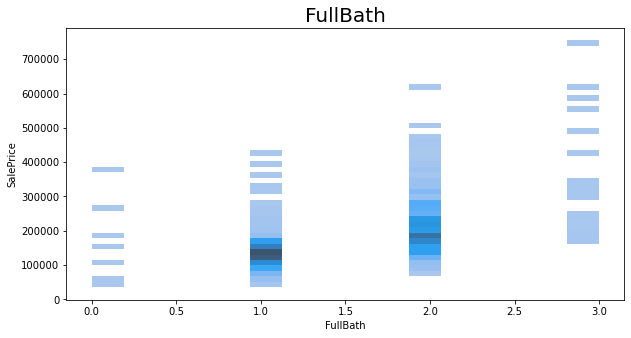

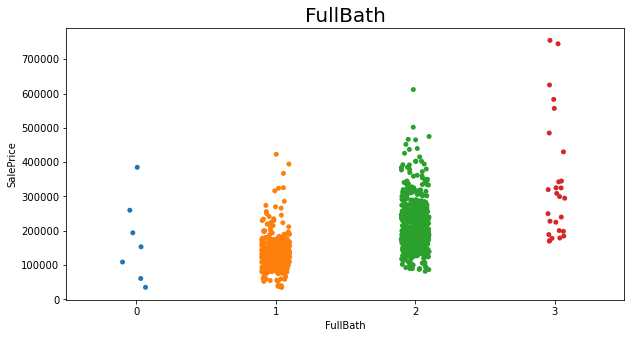

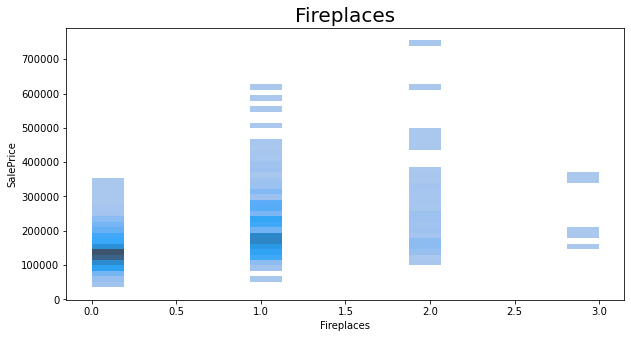

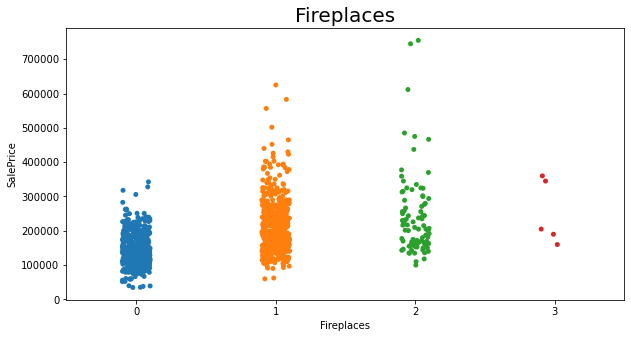

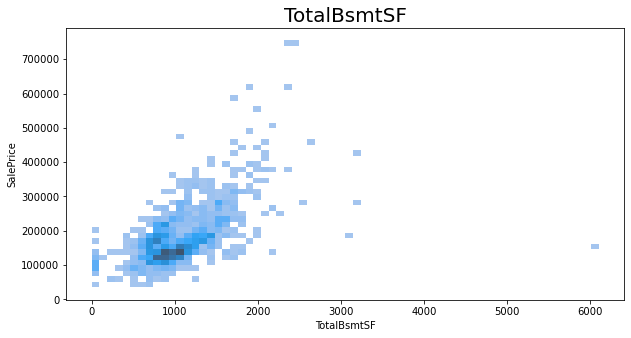

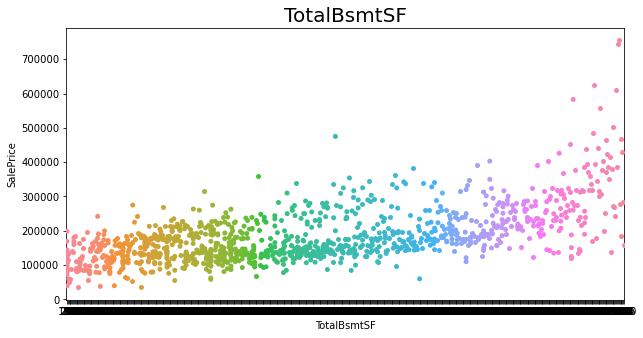

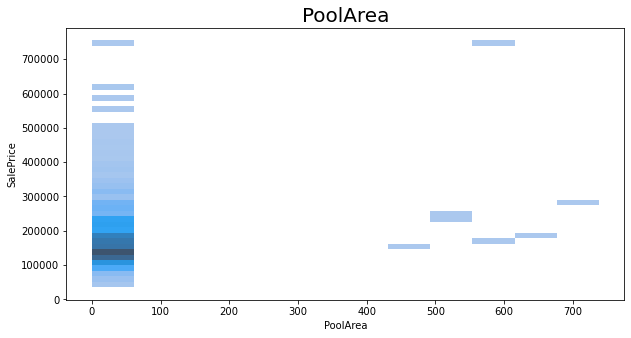

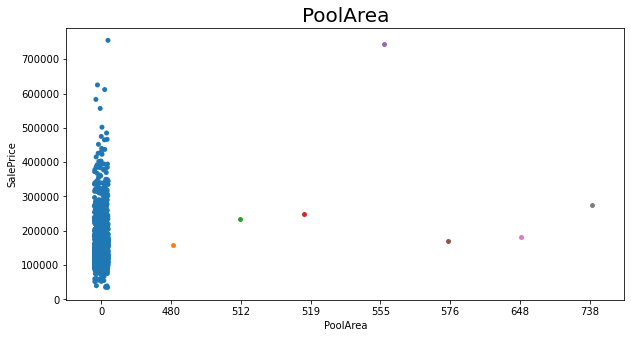

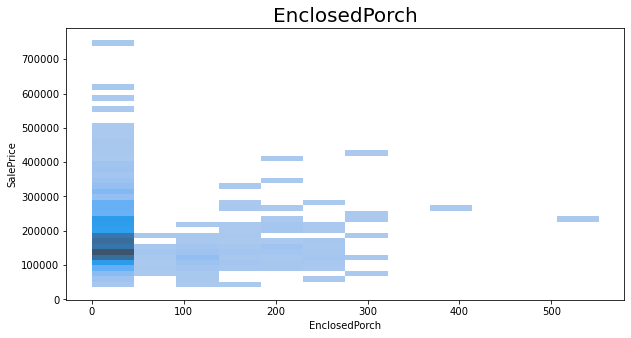

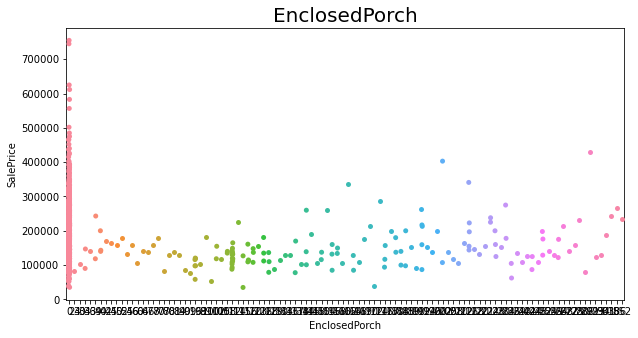

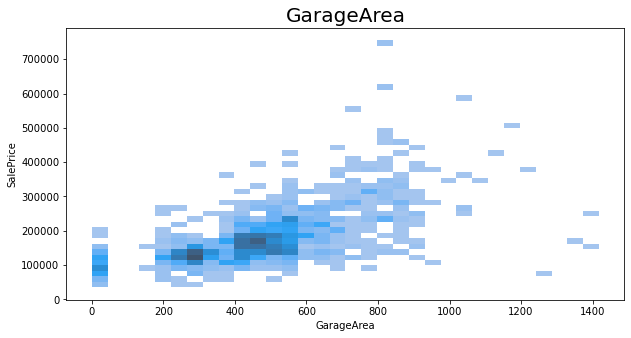

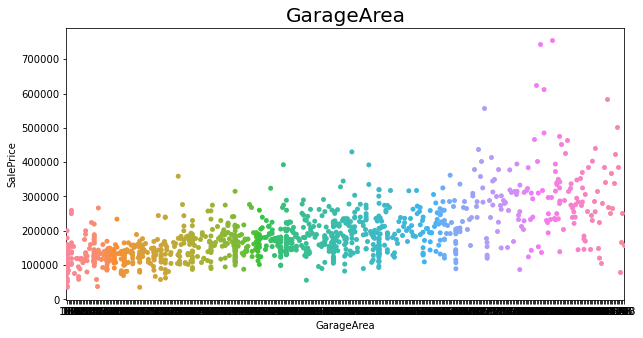

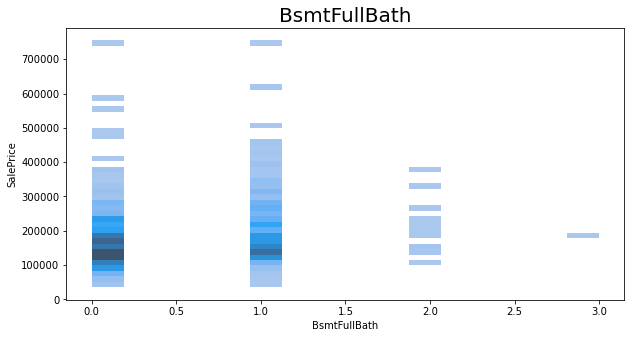

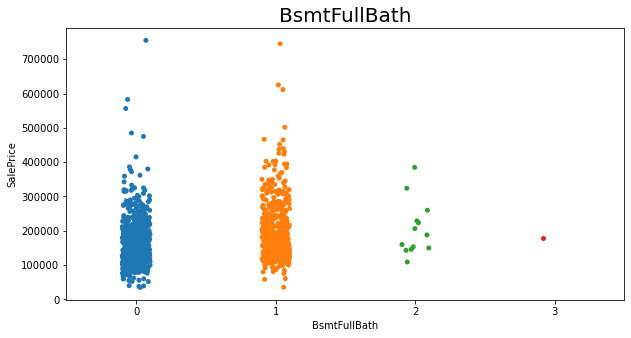

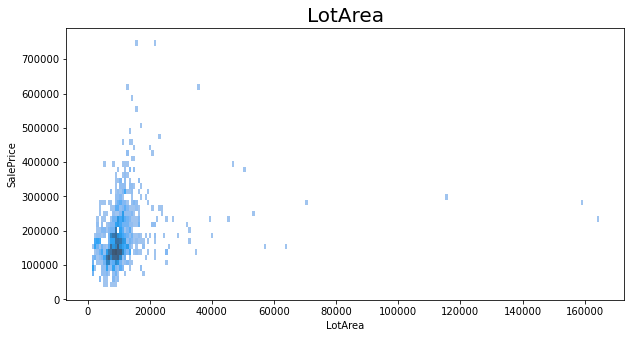

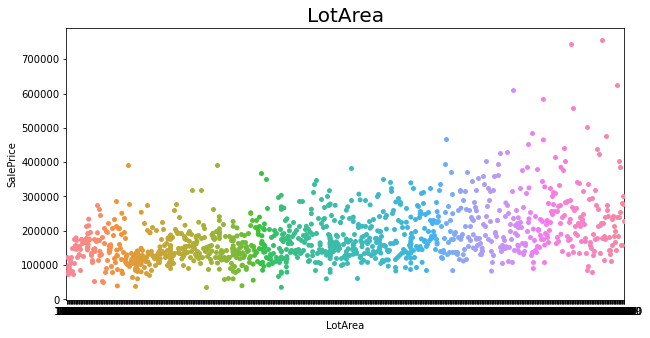

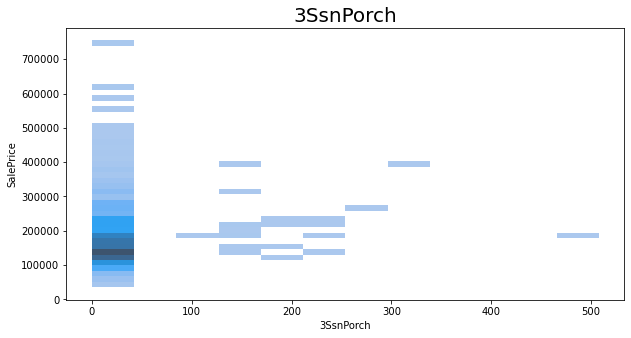

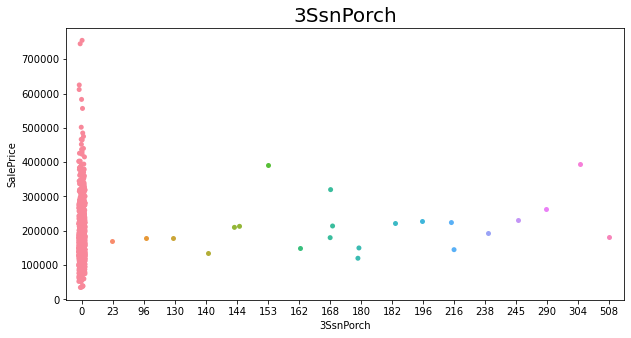

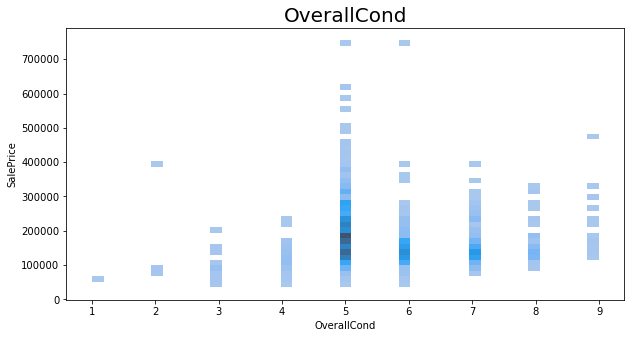

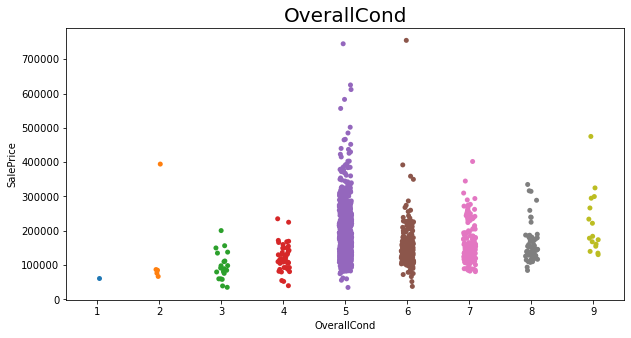

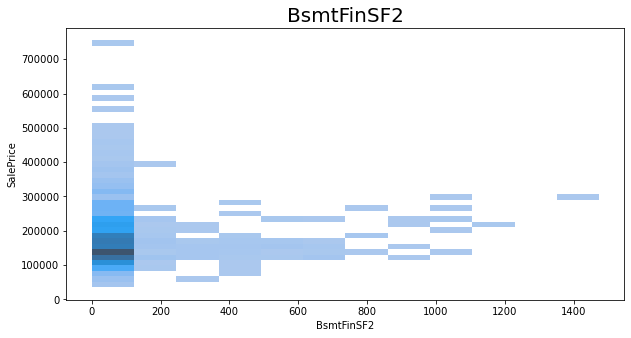

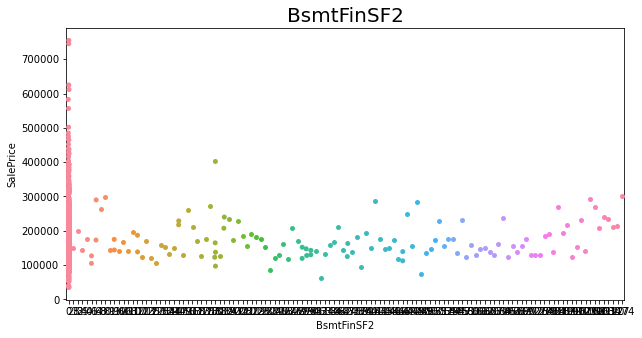

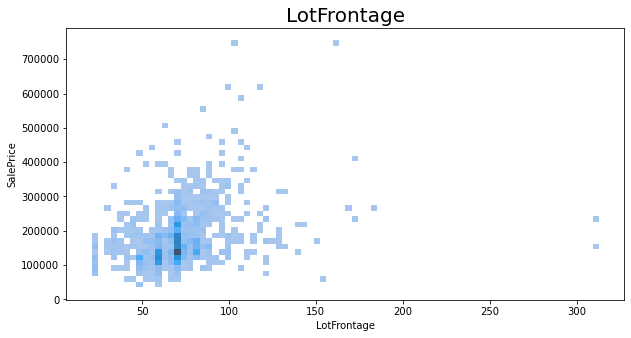

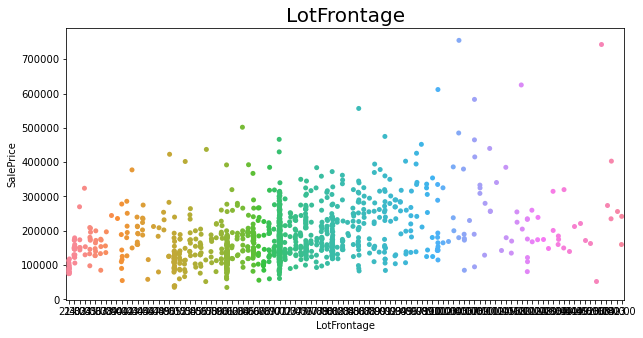

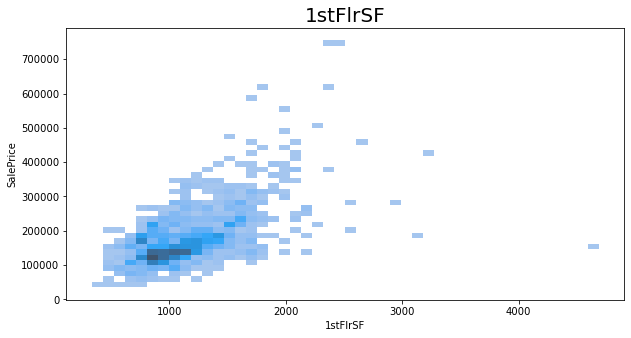

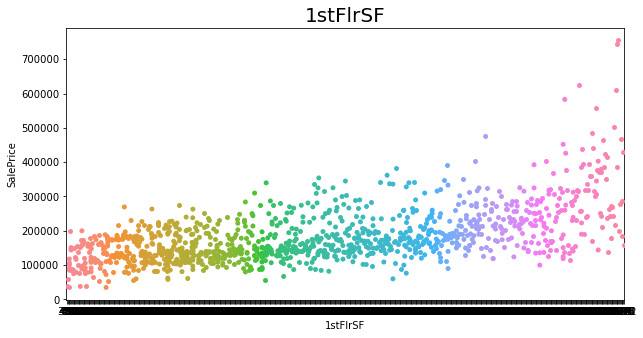

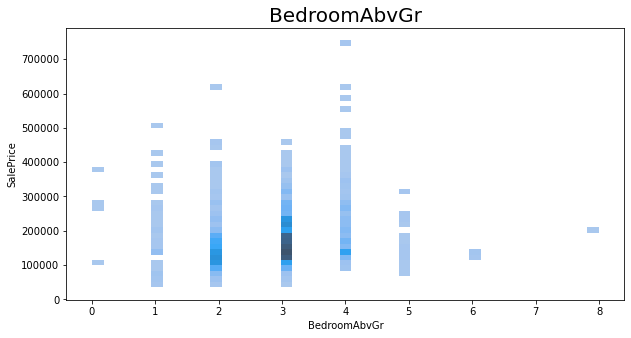

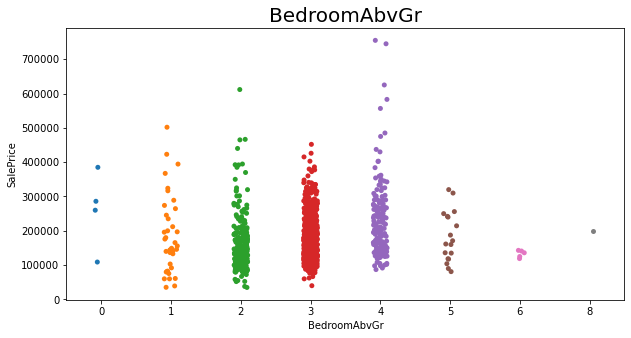

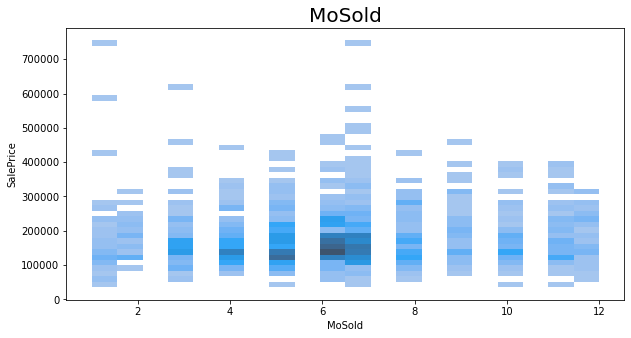

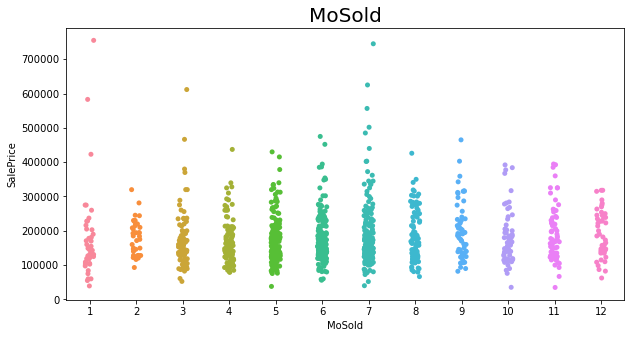

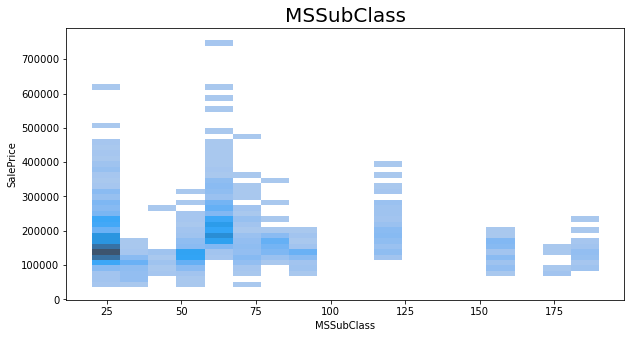

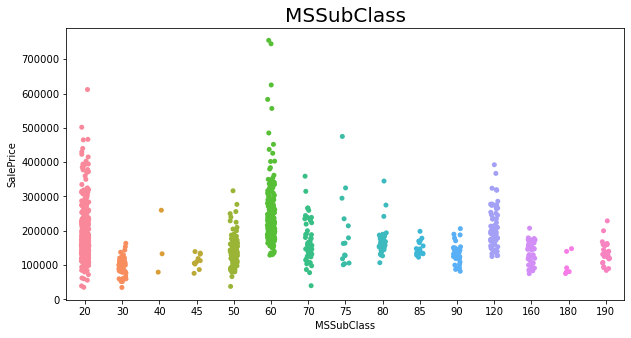

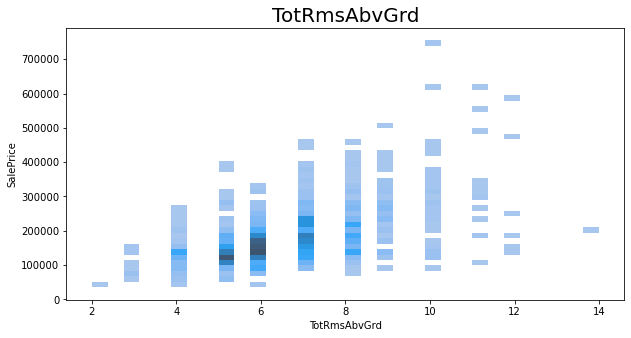

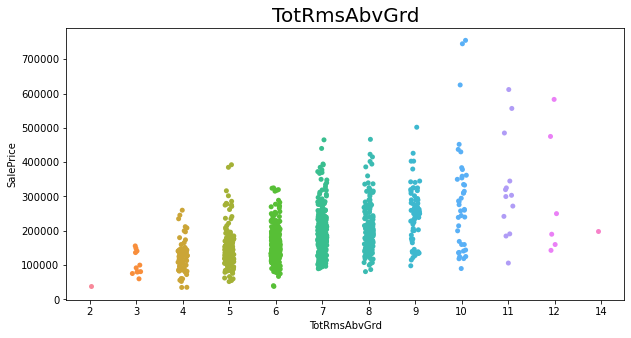

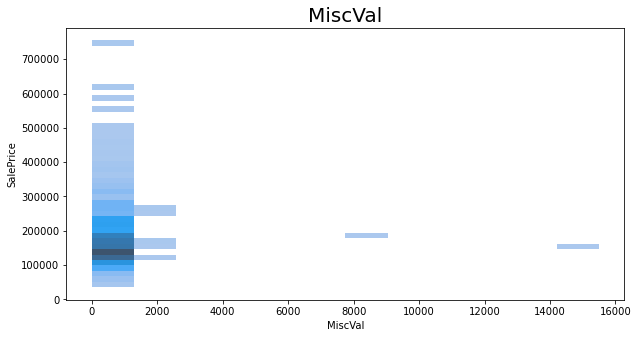

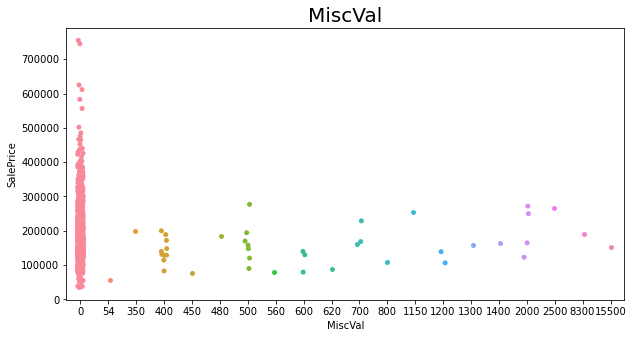

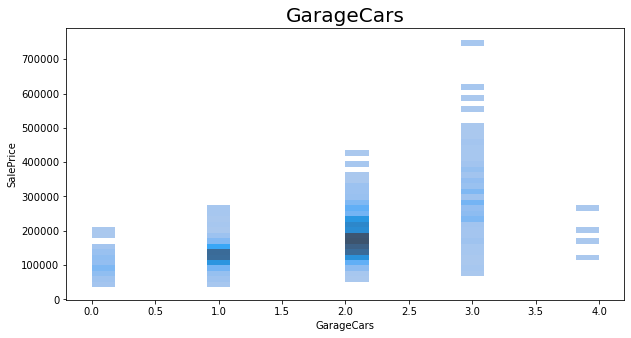

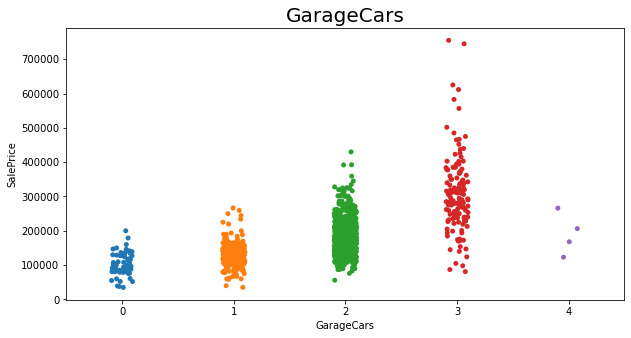

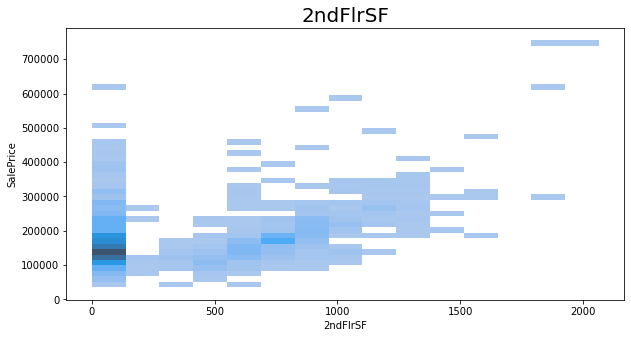

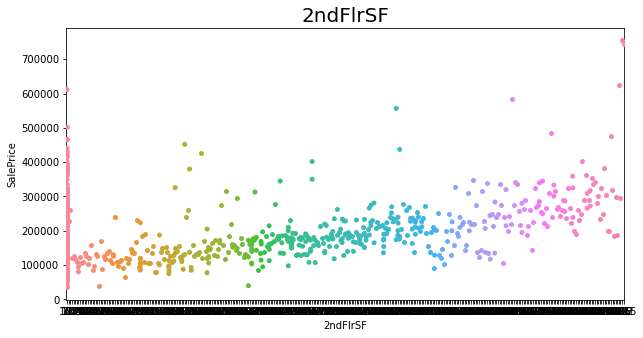

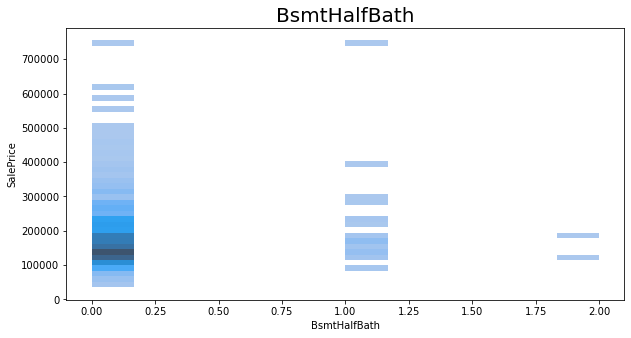

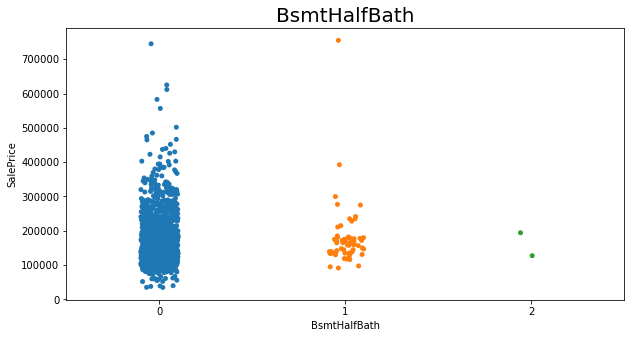

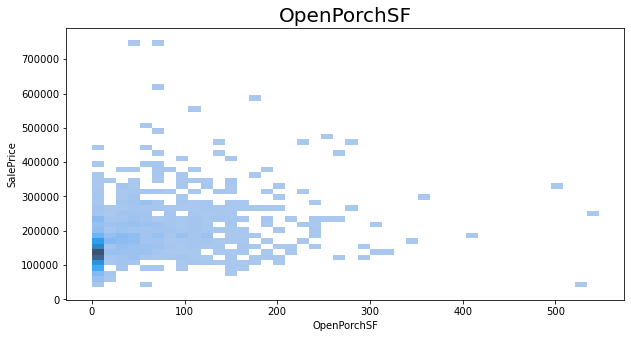

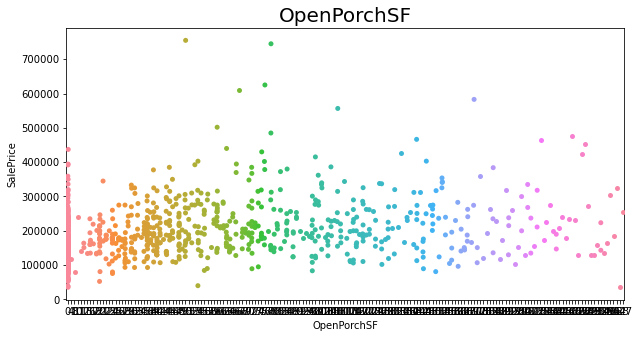

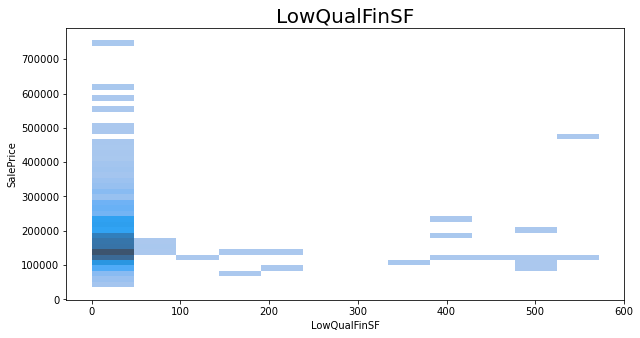

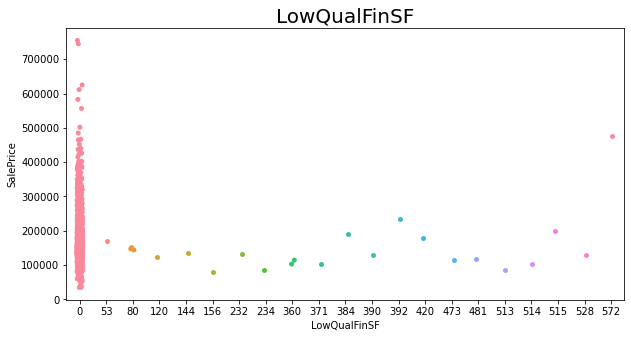

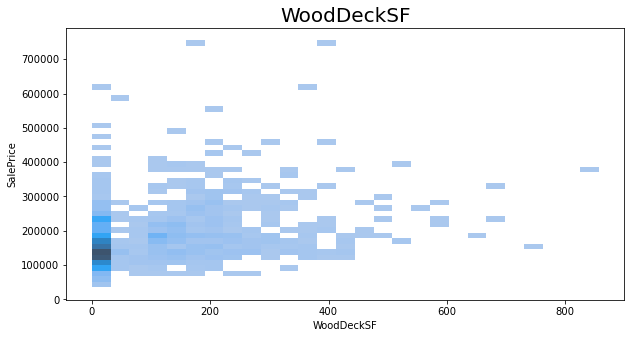

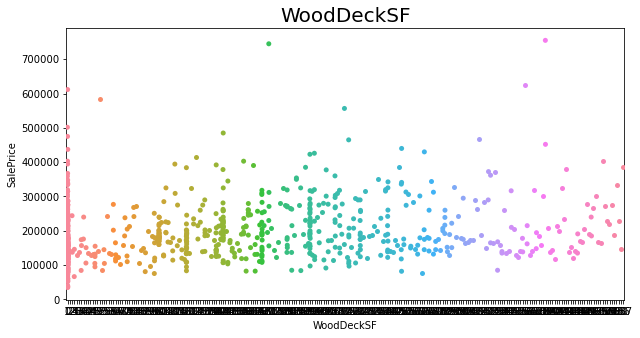

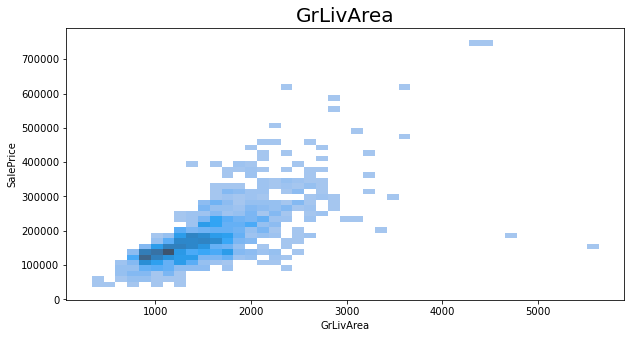

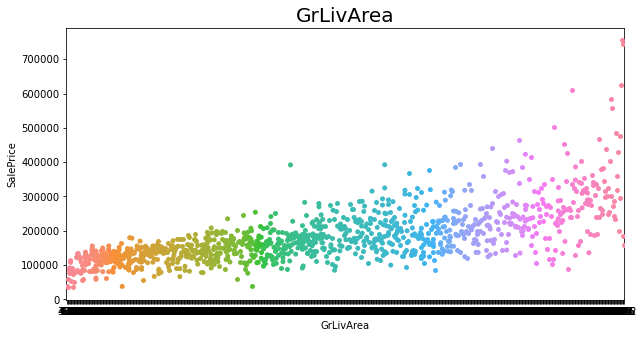

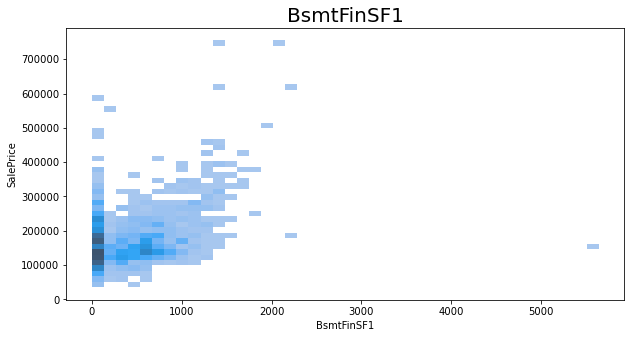

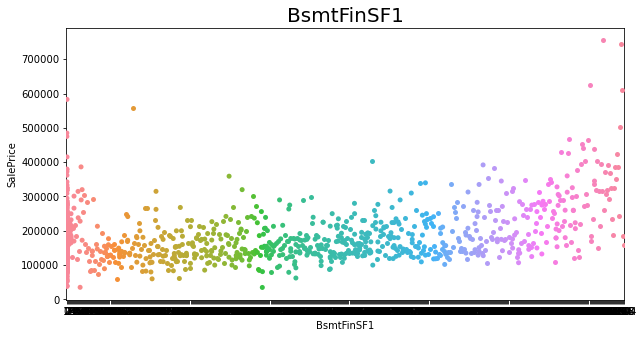

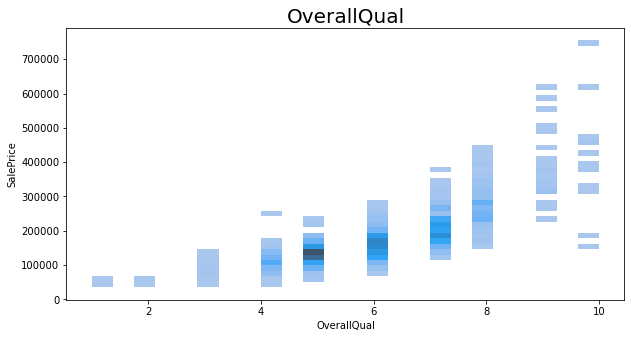

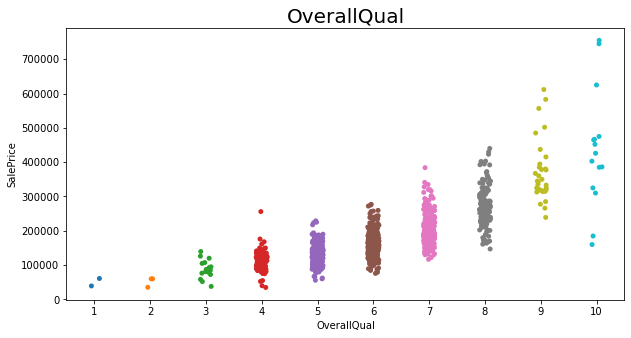

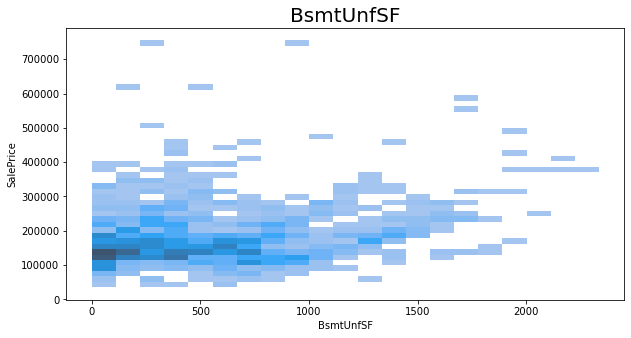

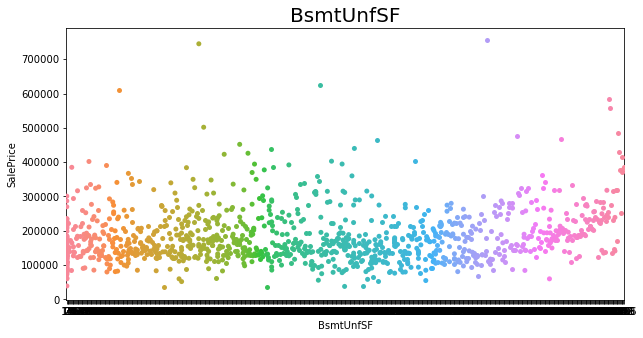

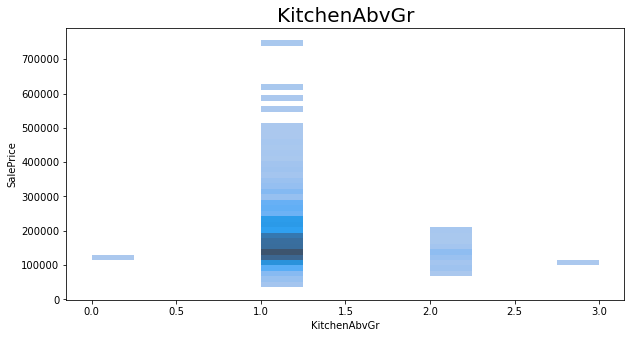

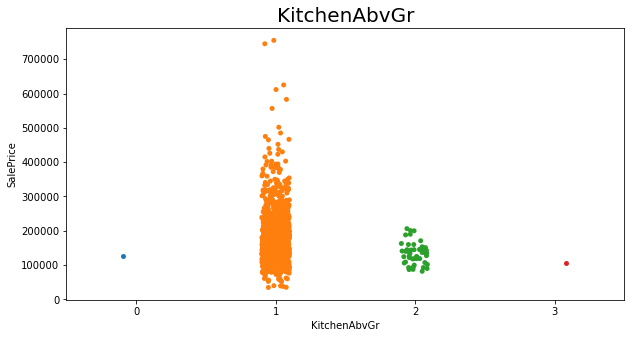

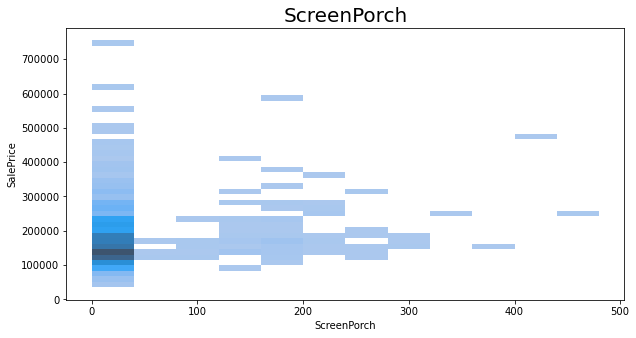

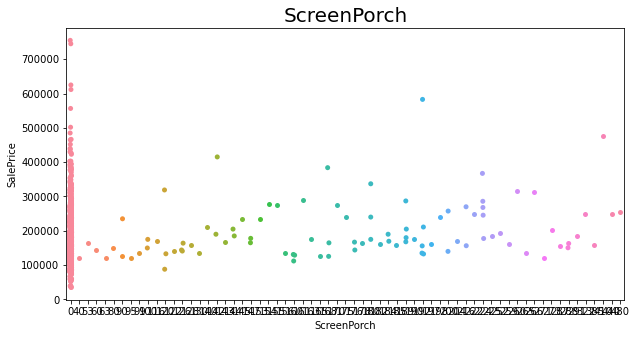

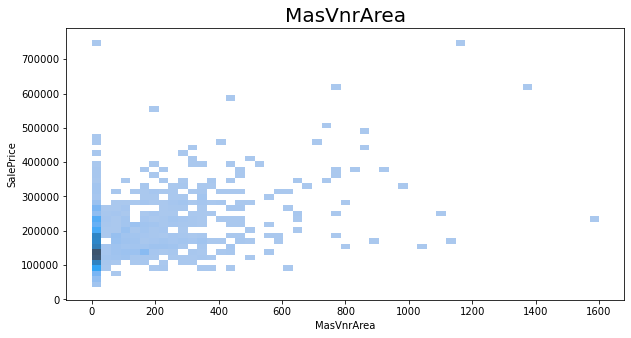

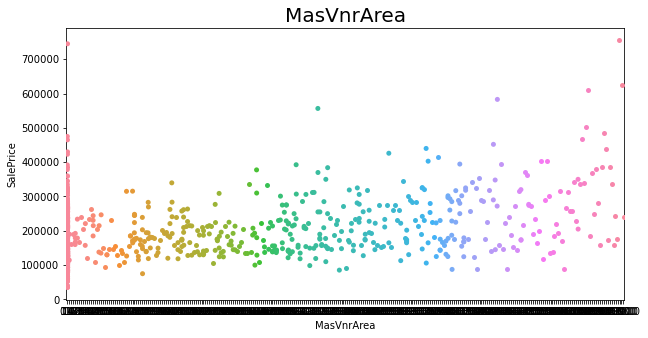

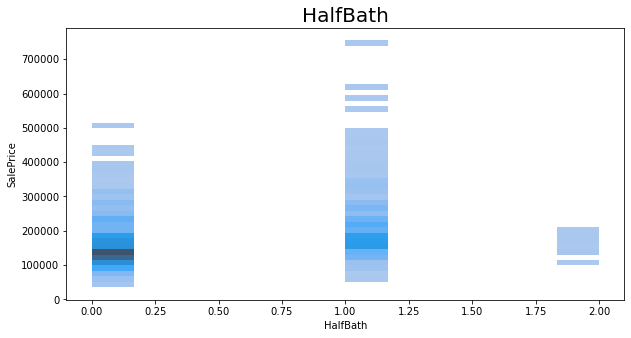

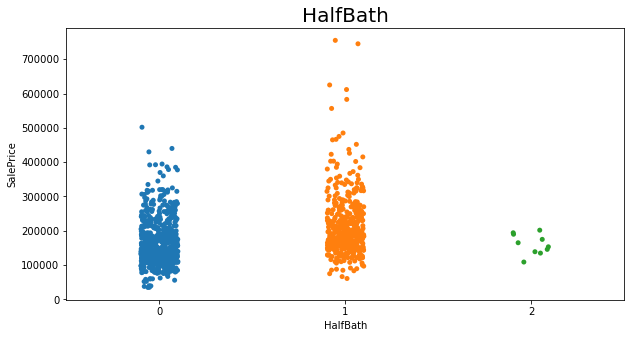

In [41]:
# creating the plots to find some information based on the plot
for feature in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x = feature, y = 'SalePrice', data = train_dataset)
    plt.title(feature, fontsize=20)
    plt.show()
    plt.figure(figsize=(10, 5))
    sns.stripplot(x = feature, y = 'SalePrice', data = train_dataset)
    plt.title(feature, fontsize=20)
    plt.show()

From the above plots, column/s
- "BsmtHalfBath, BedroomAbvGr, WoodDeckSF, BsmtUnfSf, KitchenAbvGr, LowQualFinSF, 3SsnPorch, ScreenPorch, OpenPorchSF, BsmtFinSF2, PoolArea, MoSold, OverallCond, LotFrontage, EnclosedPorch, MSSubClass, BsmtFullBath, HalfBath, MiscVal" doesn't seem to have much effect on the SalePrice.
- "GarageCars, GarageArea" shows that the SalePrice would be more if the numbers of cars parking capacity is more i.e more GarageArea but it is valid for capacity of cars upto 3 only.
- "GrLivArea, 2ndFlrSF, MasVnrArea, FullBath, TotalBsmtSF, OverallQual, 1stFlrSF, LotArea, TotRmsAbvGrd, BsmtFinSF1" shows good relation with the SalePrice.
- "Fireplaces" shows that multiple fireplaces doesn't seems to affect the price but 1 fireplace in the house is costly against the house without any fireplace.

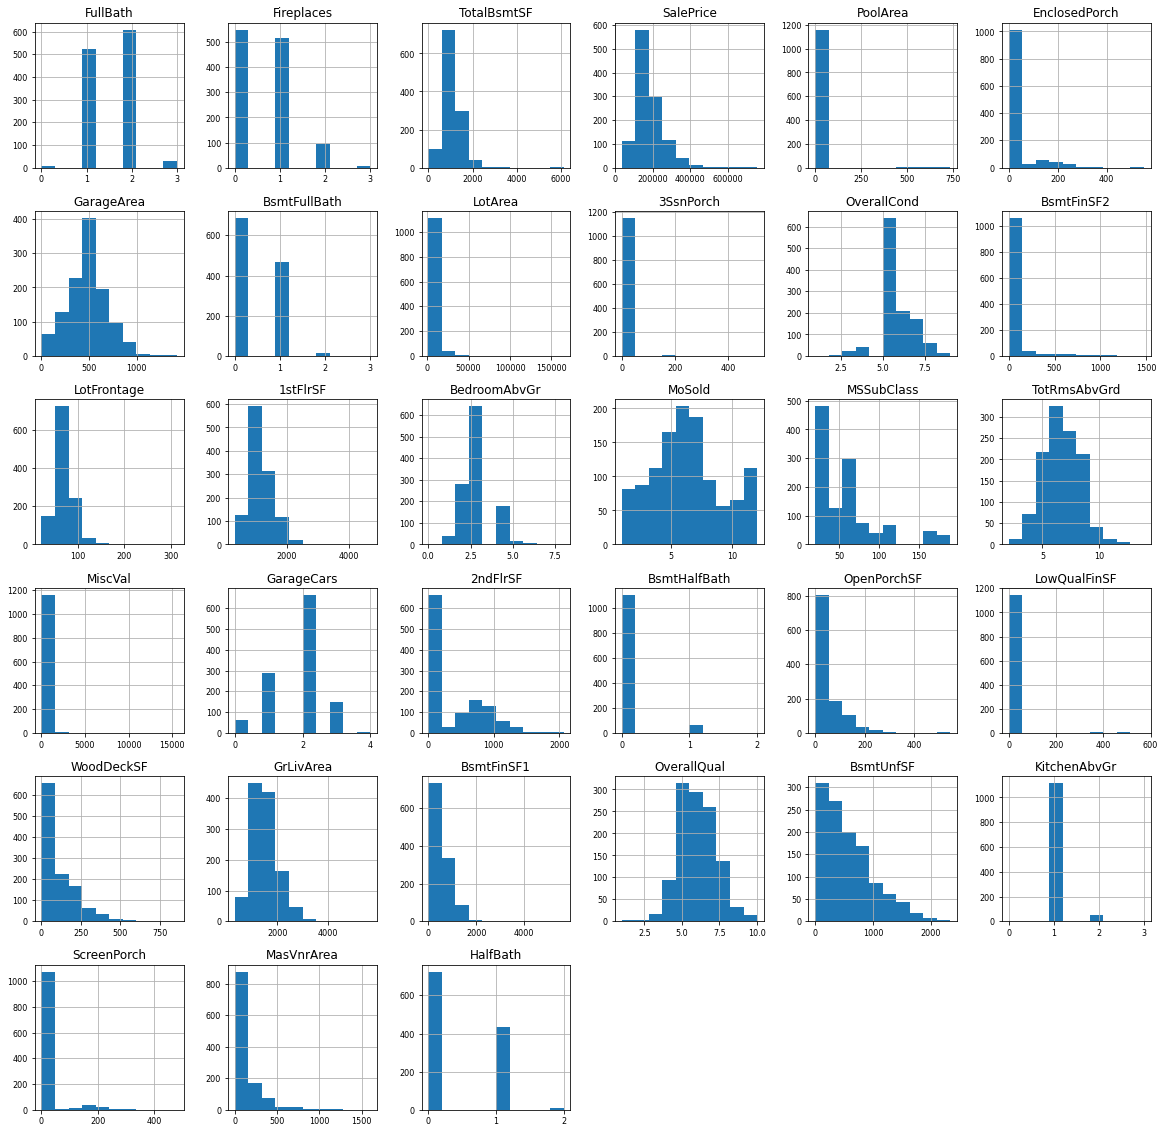

In [42]:
train_dataset[num_features].hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8);

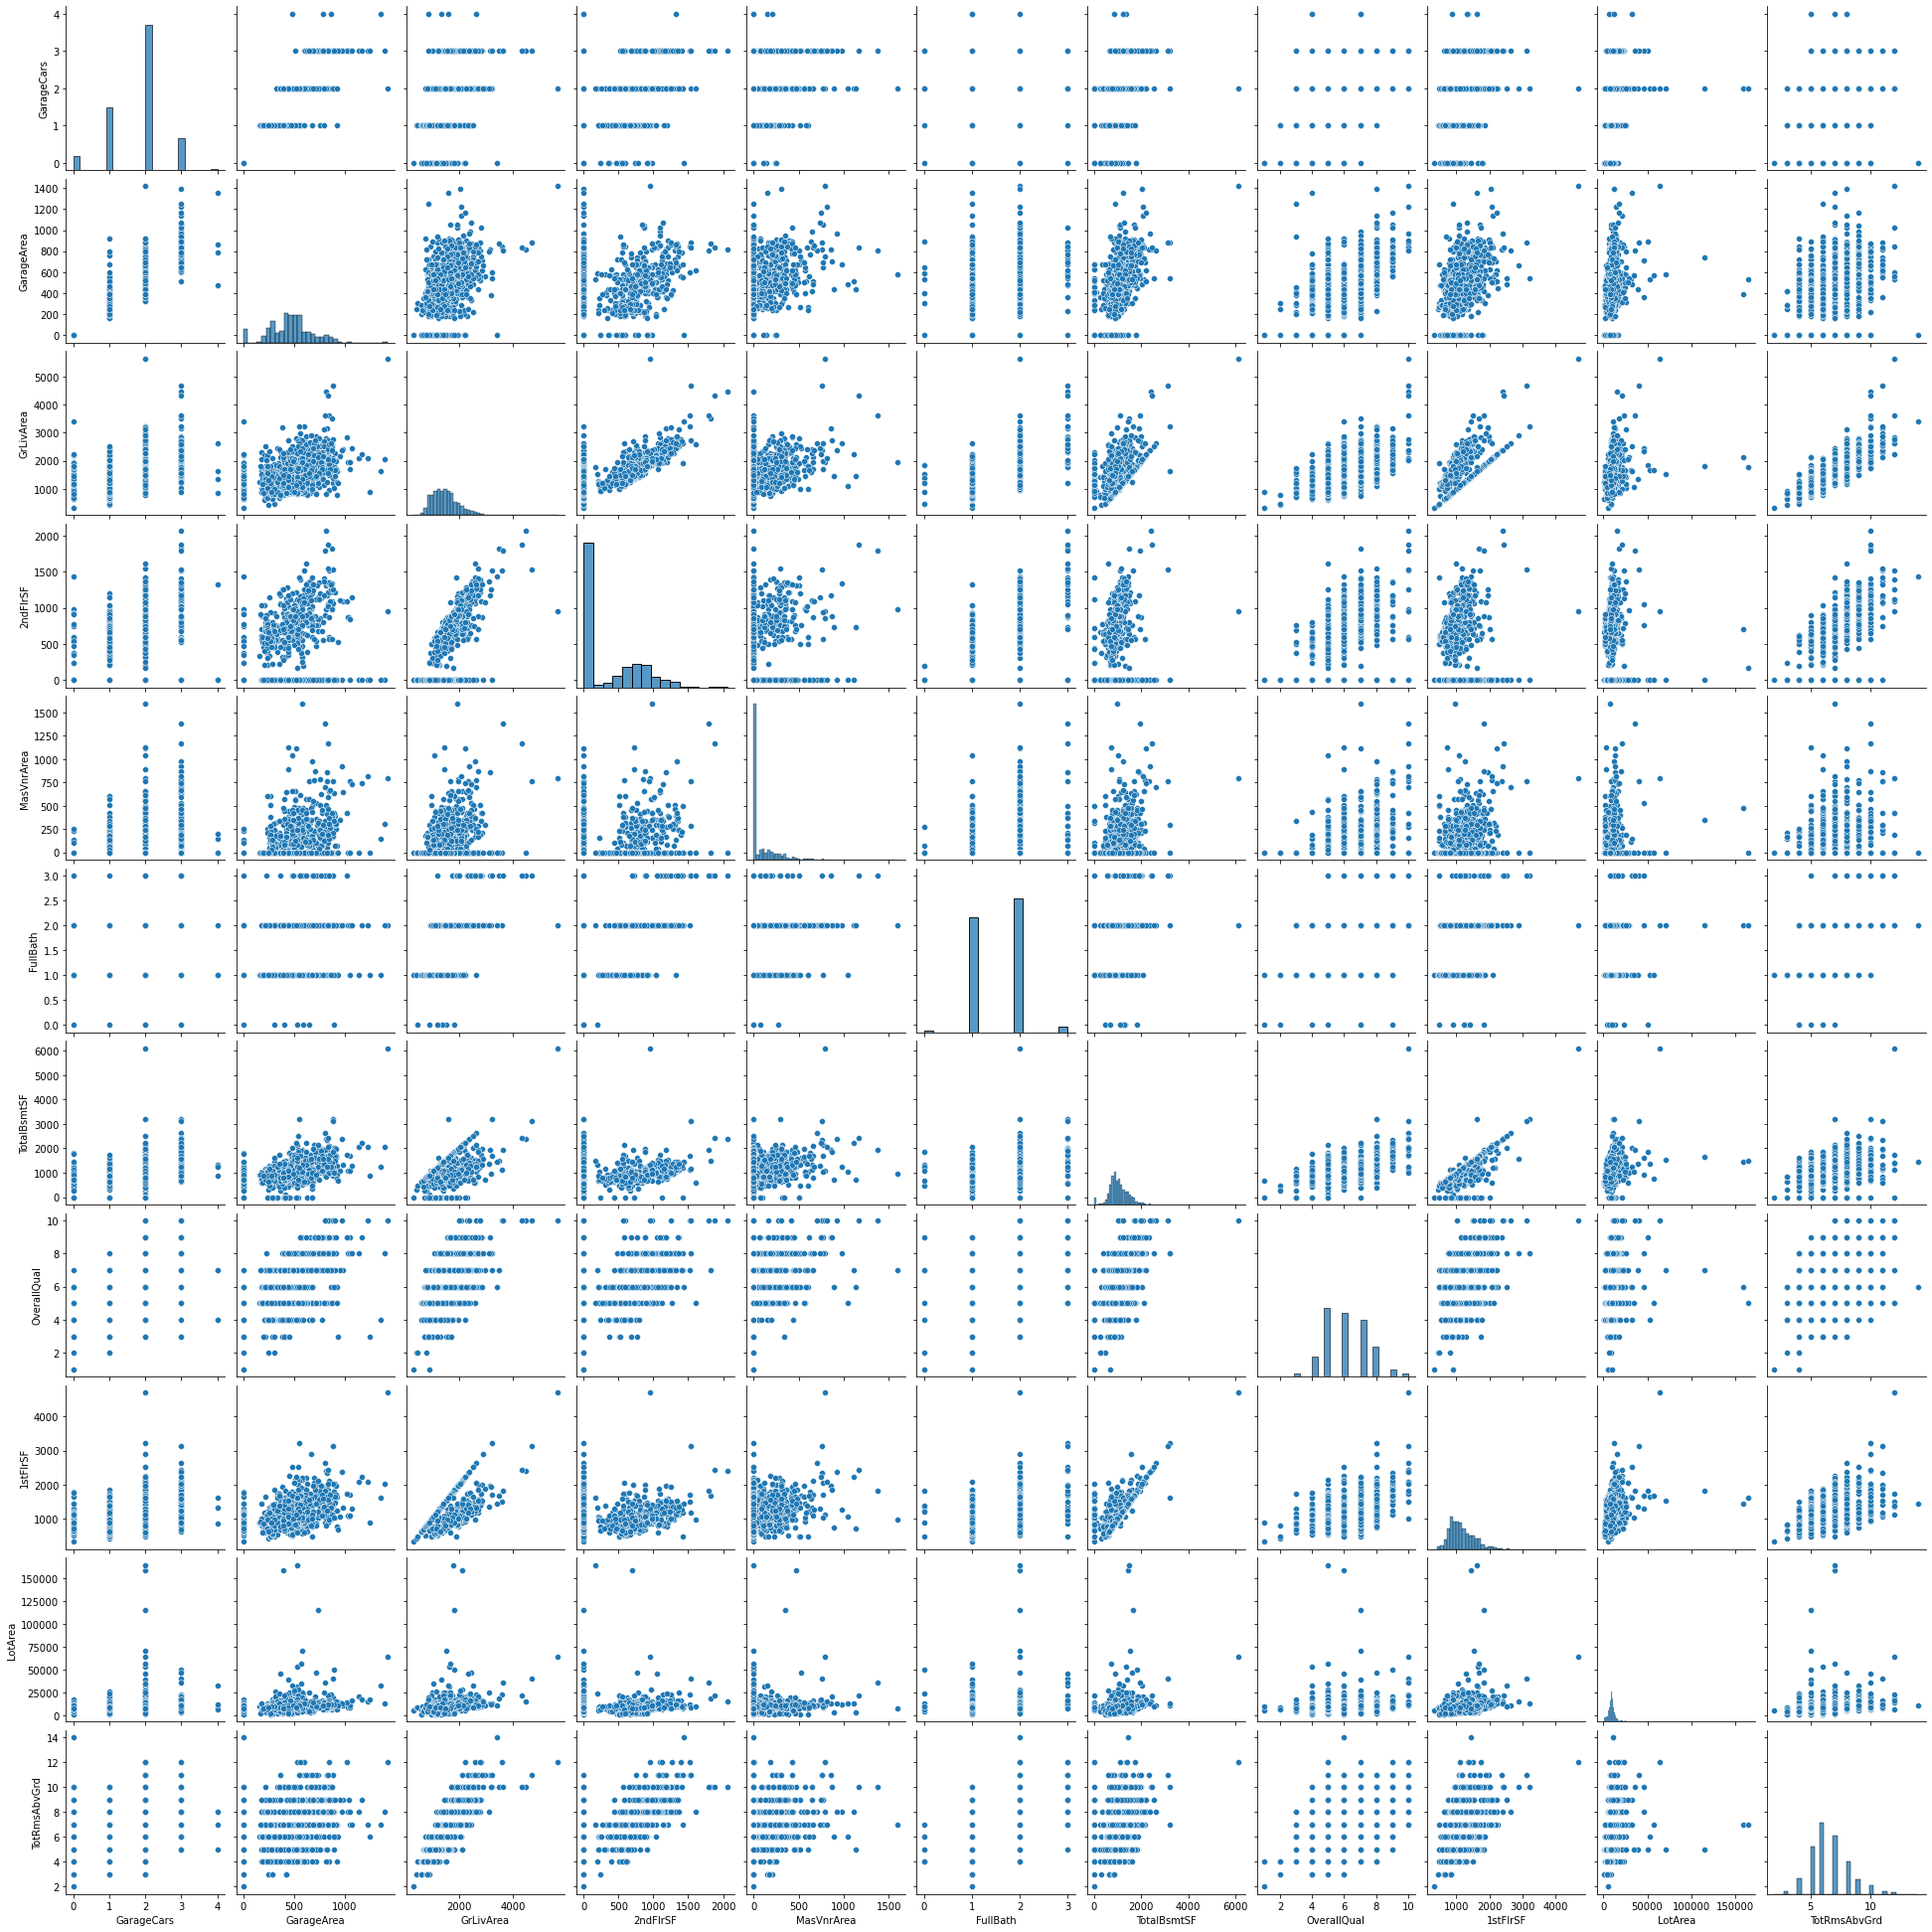

In [43]:
# selecting the columns for pairplot
pair = ["GarageCars", "GarageArea", "GrLivArea", "2ndFlrSF", "MasVnrArea", "FullBath", "TotalBsmtSF", "OverallQual", "1stFlrSF", "LotArea", "TotRmsAbvGrd"]

# plotting pairplot
sns.pairplot(data = train_dataset[pair])

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


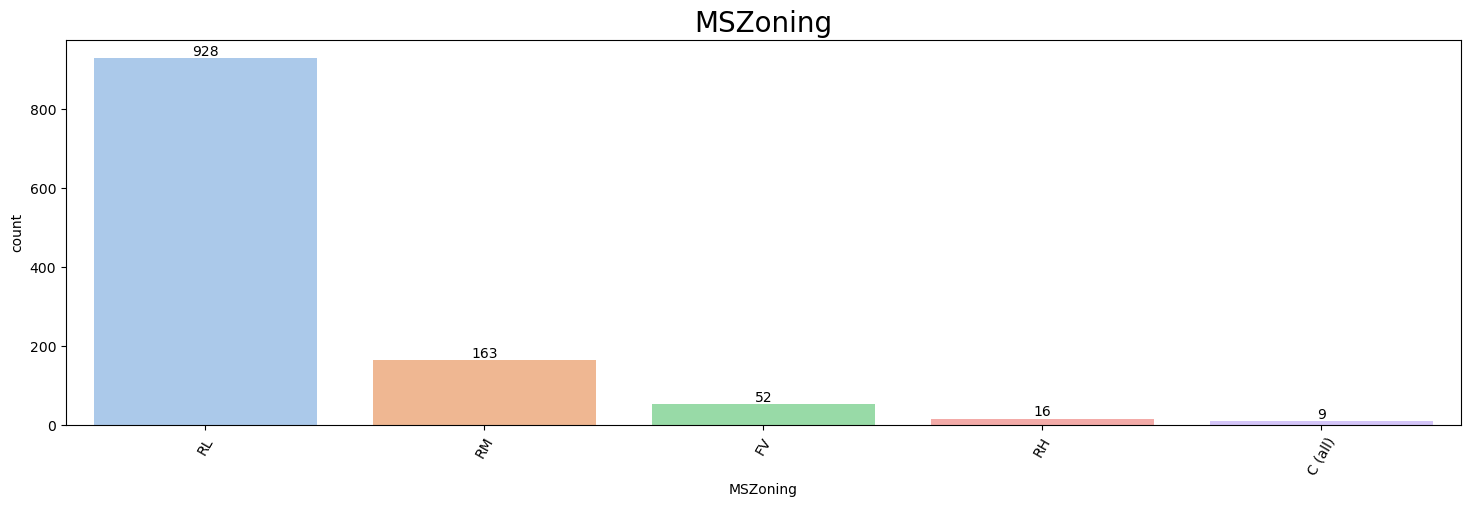

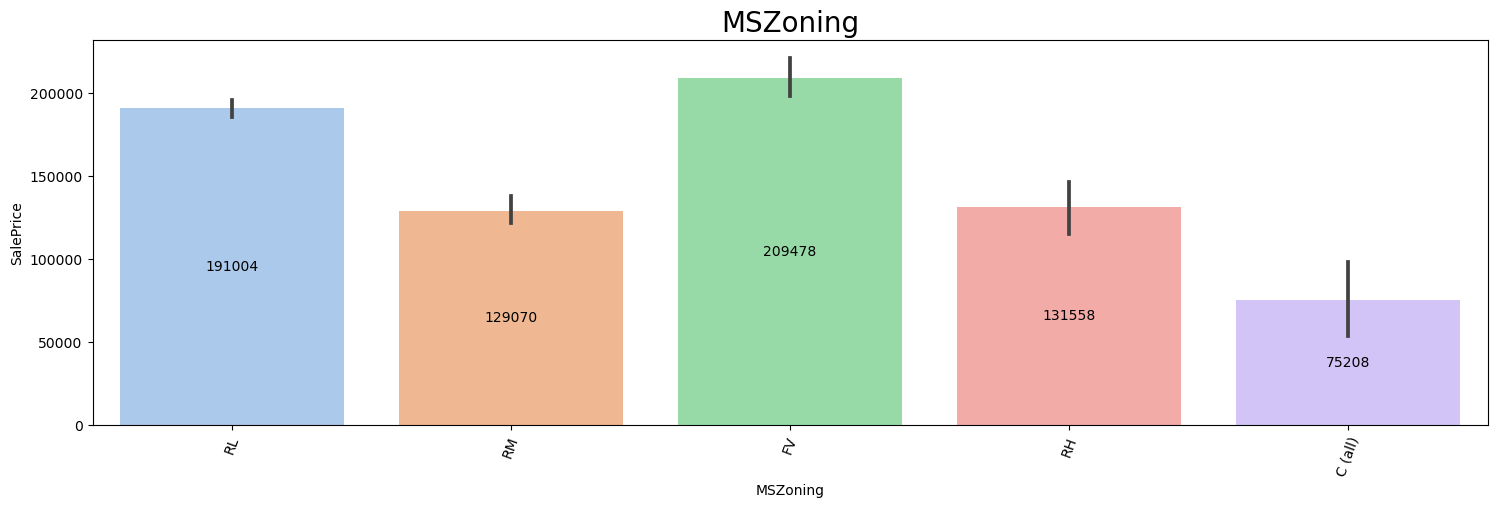

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


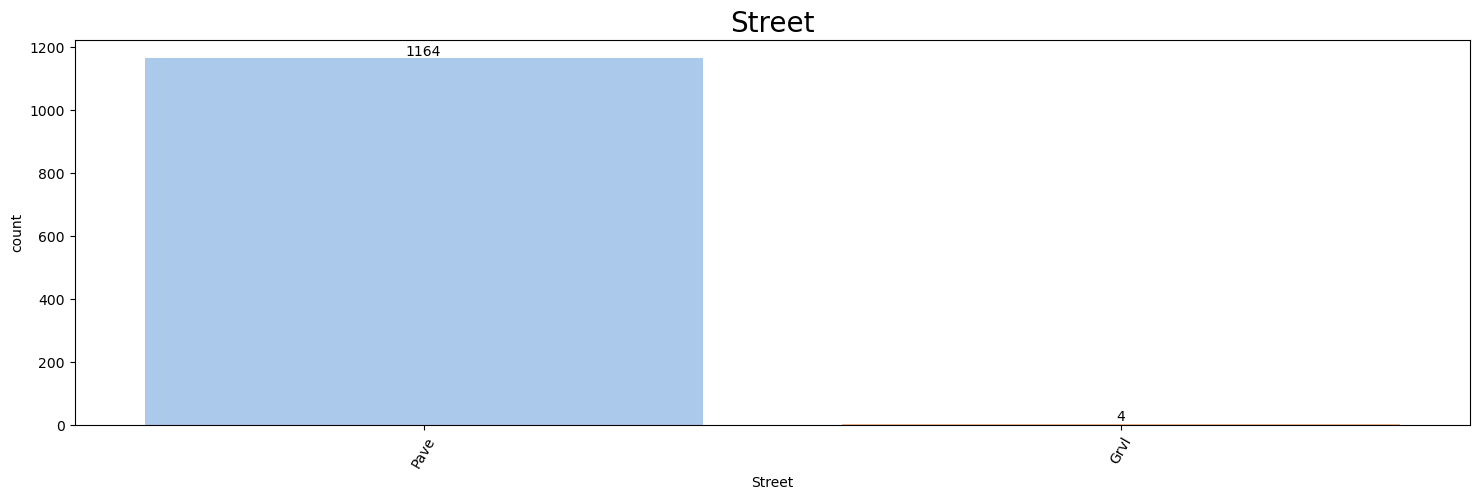

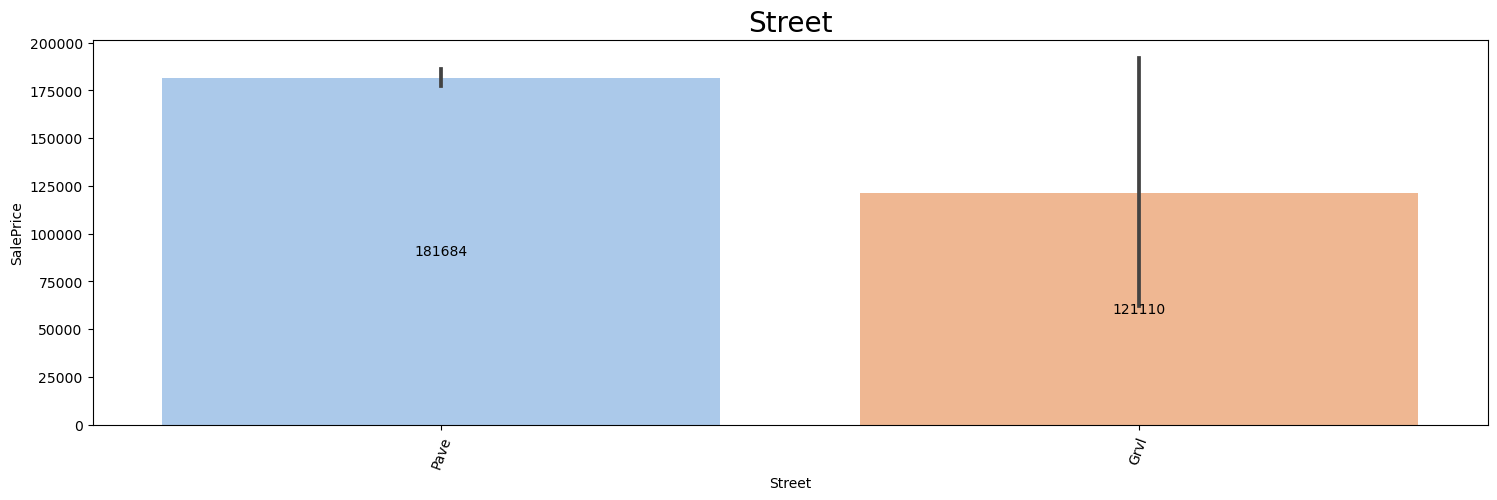

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


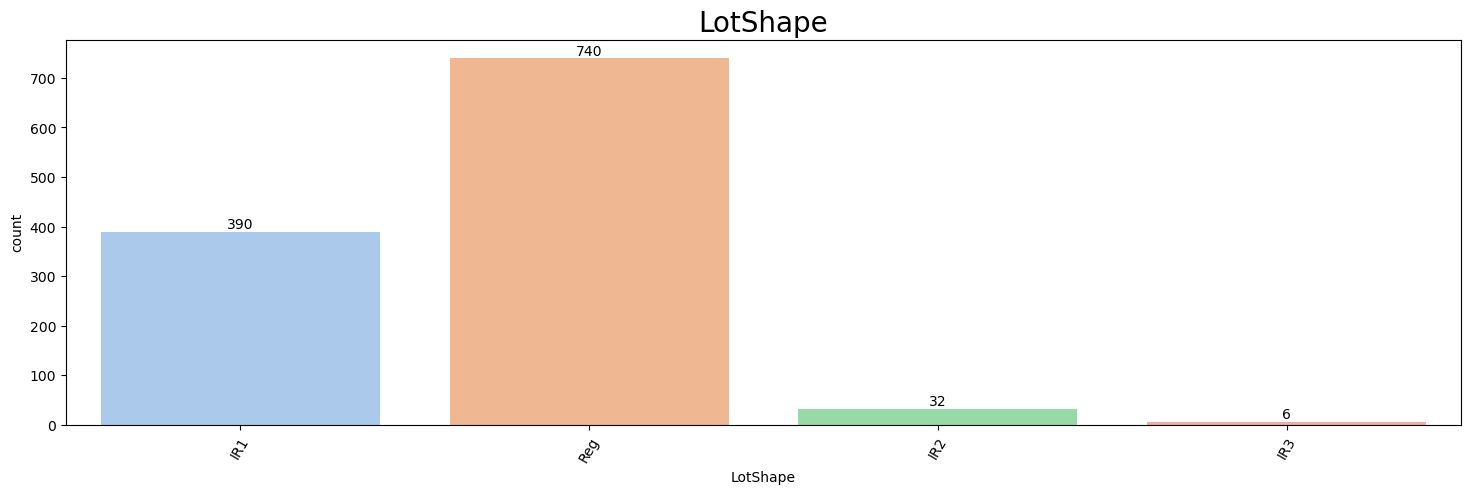

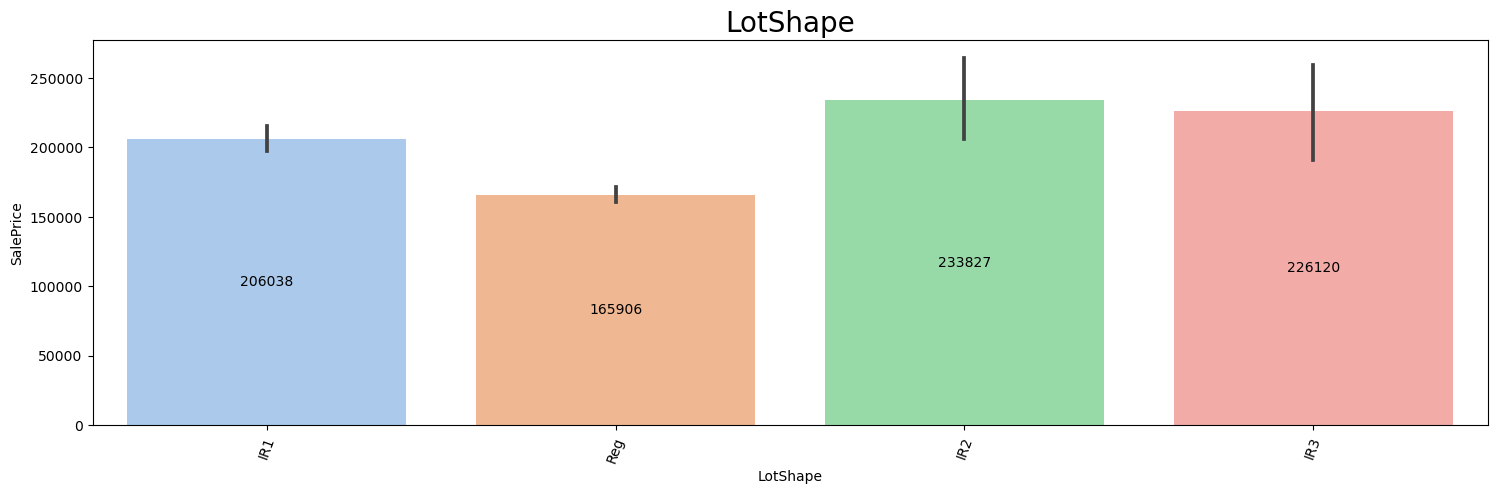

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


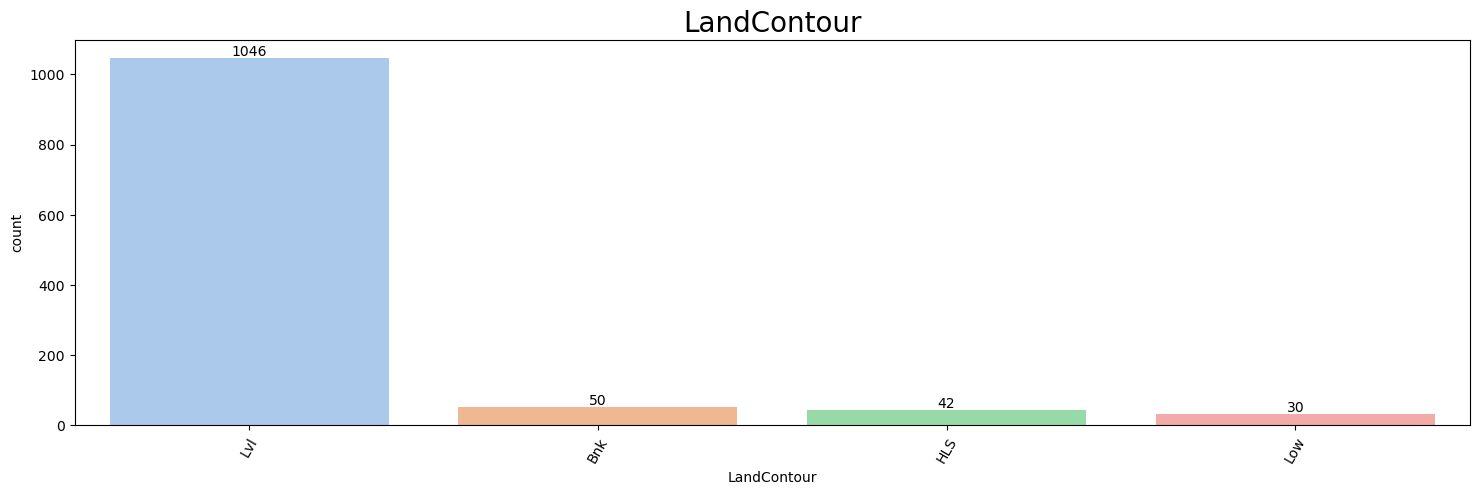

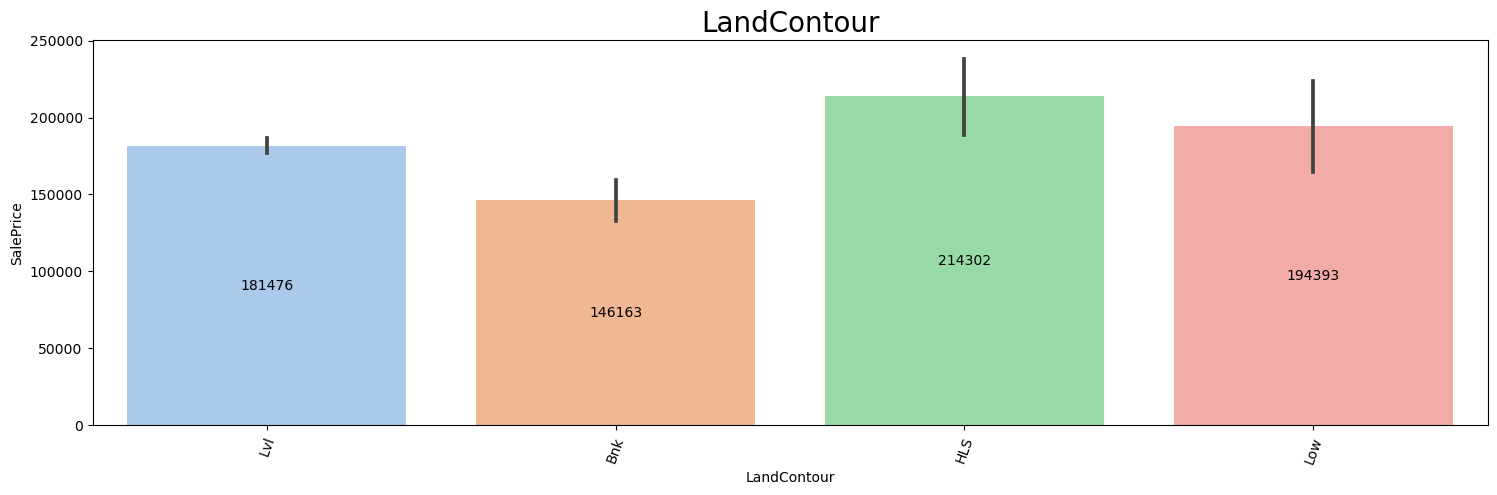

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


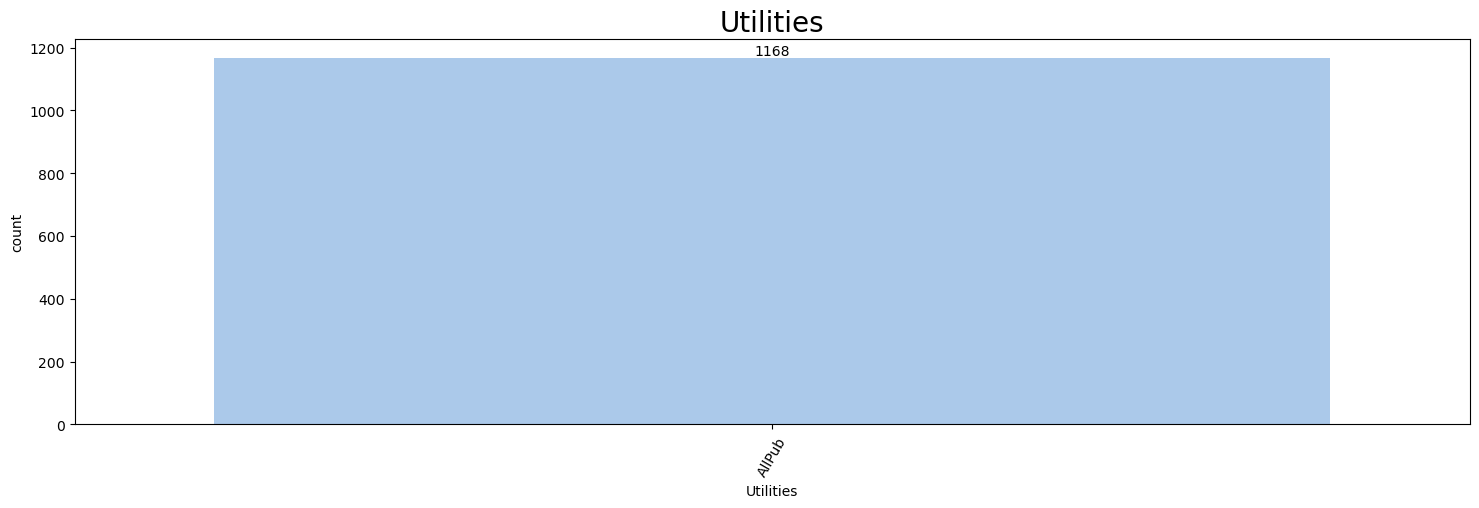

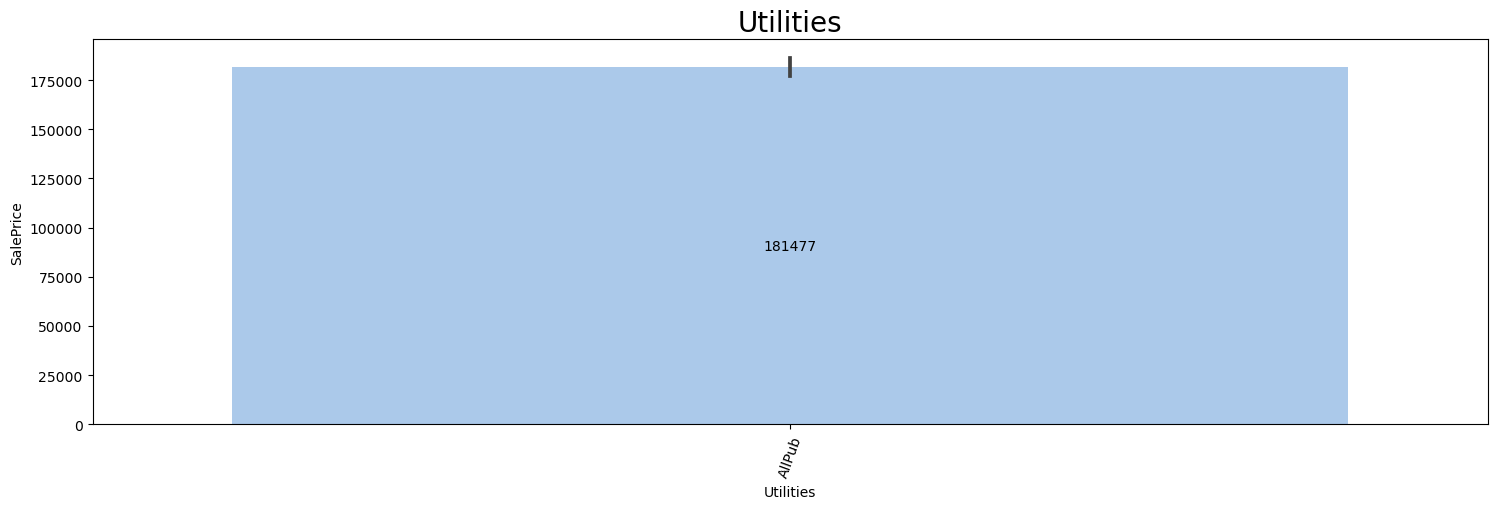

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


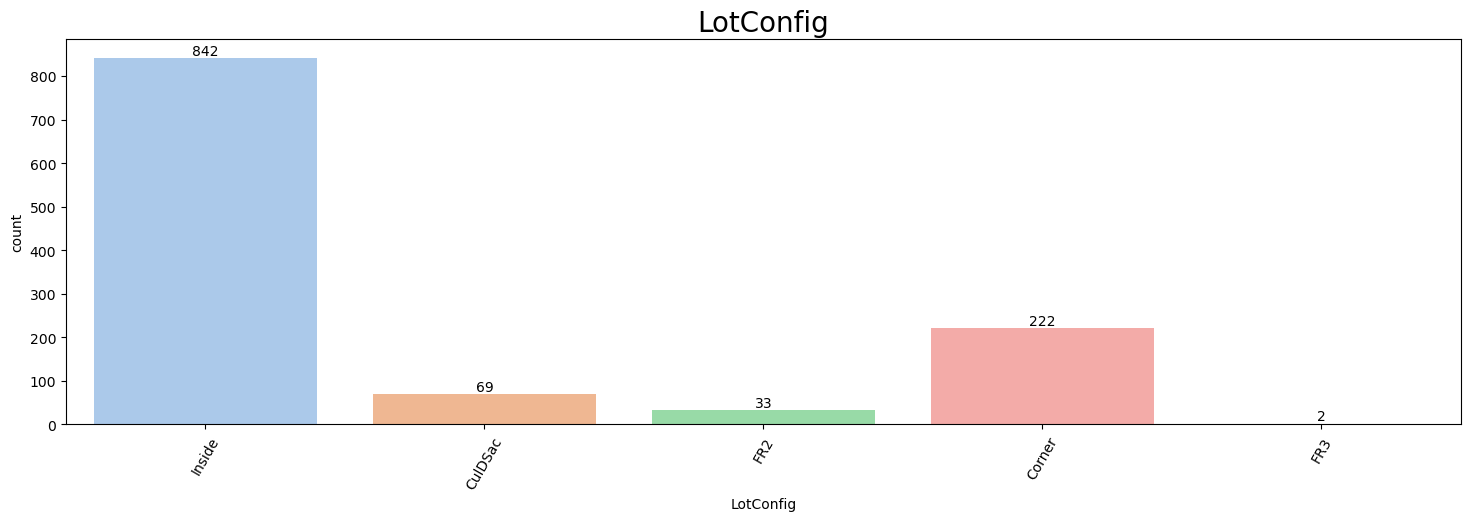

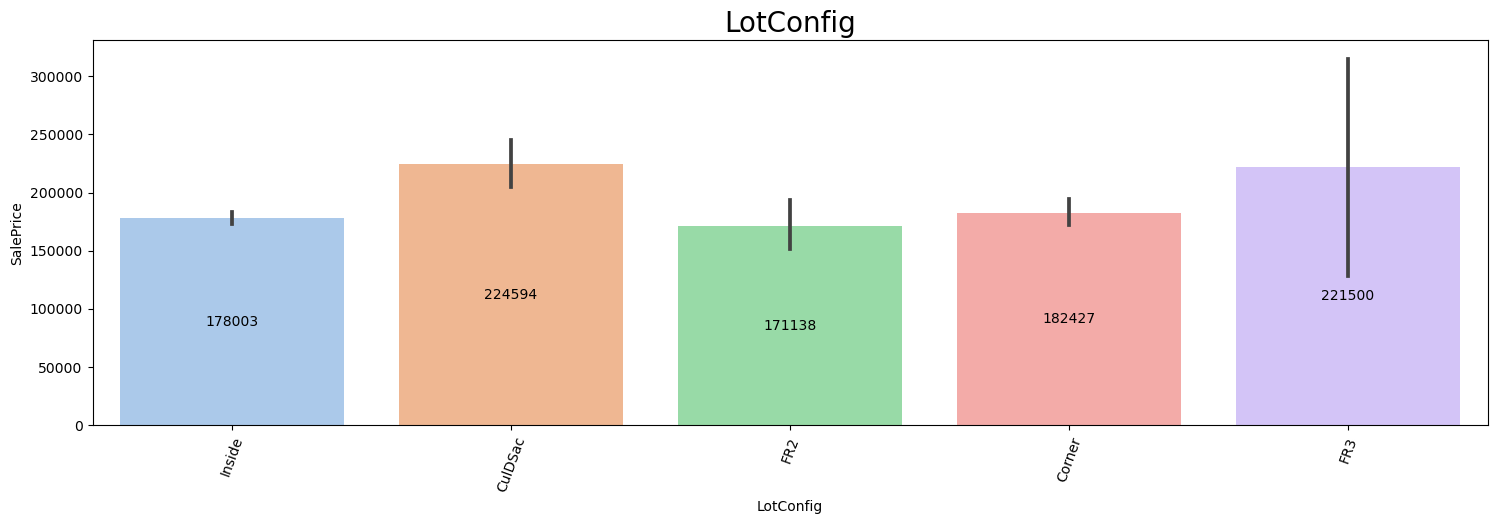

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


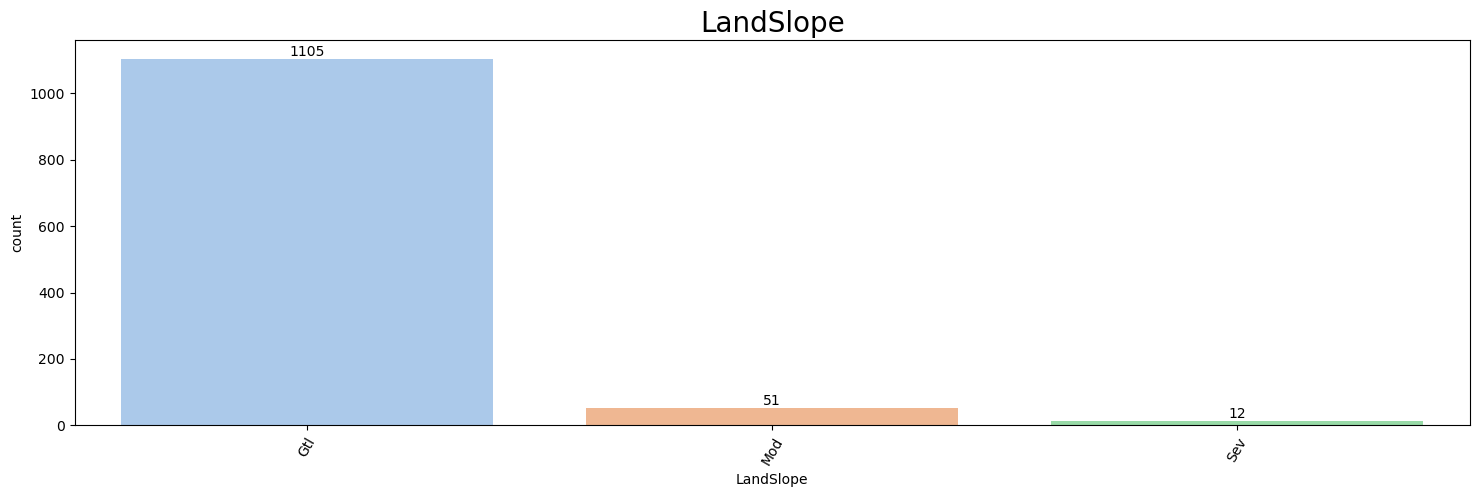

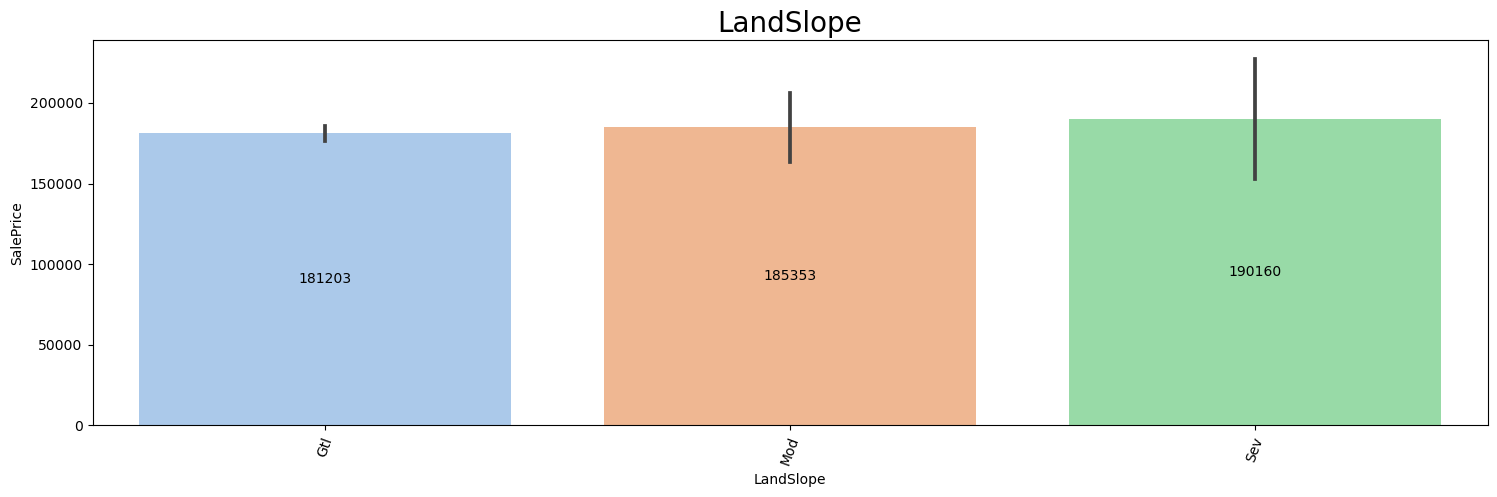

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


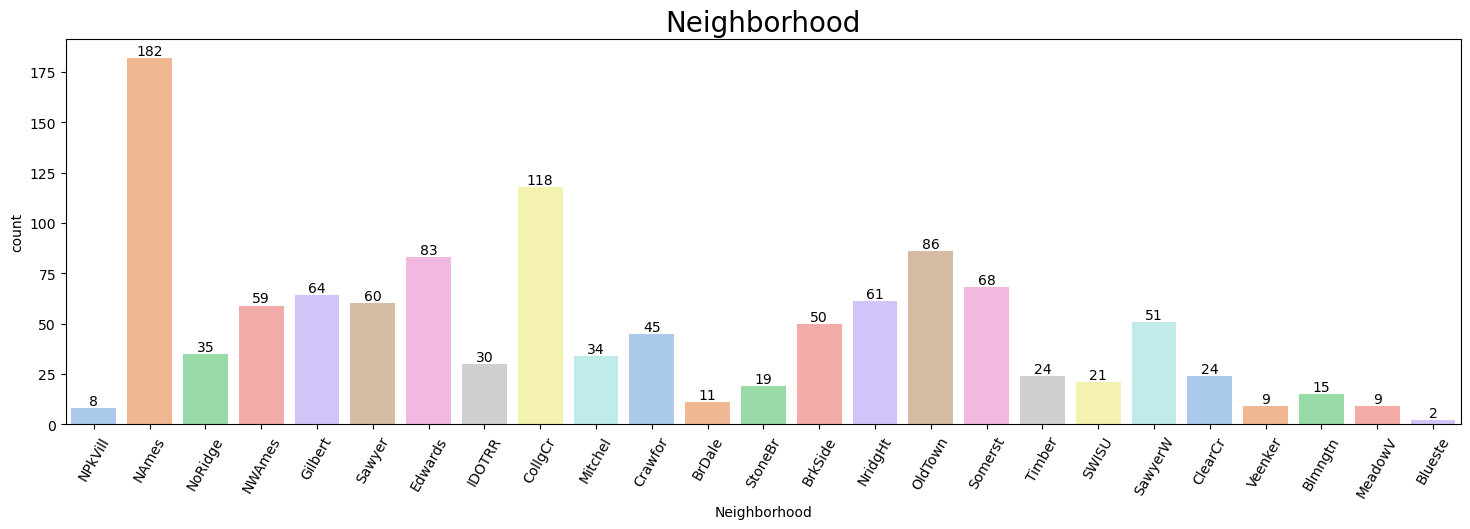

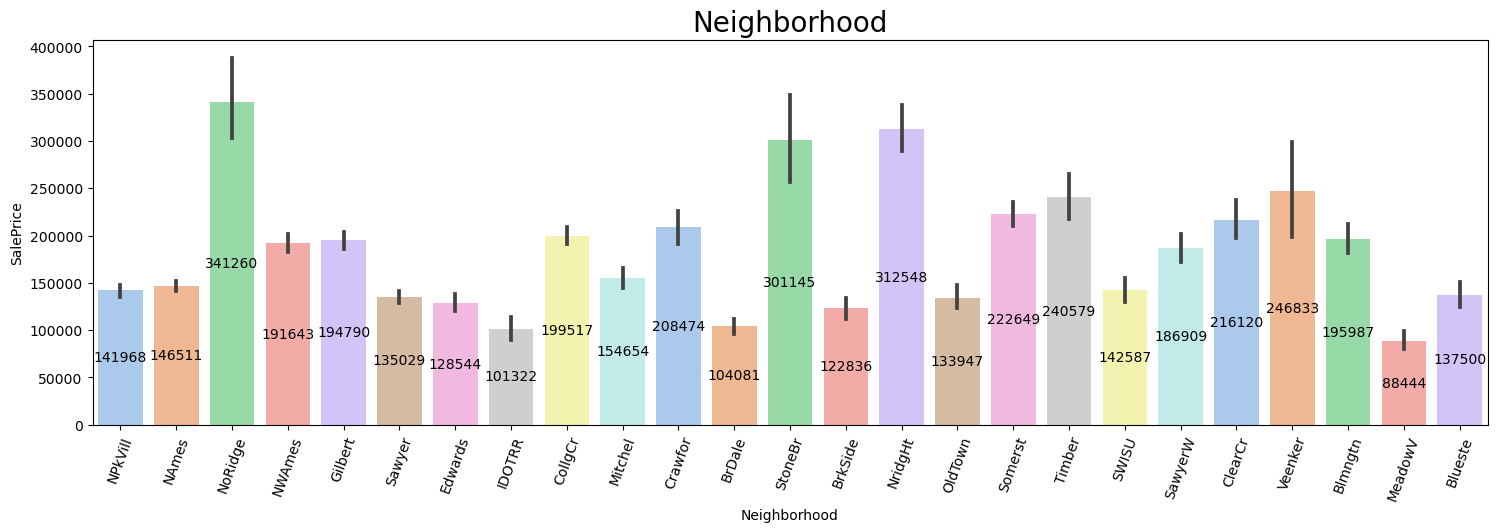

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


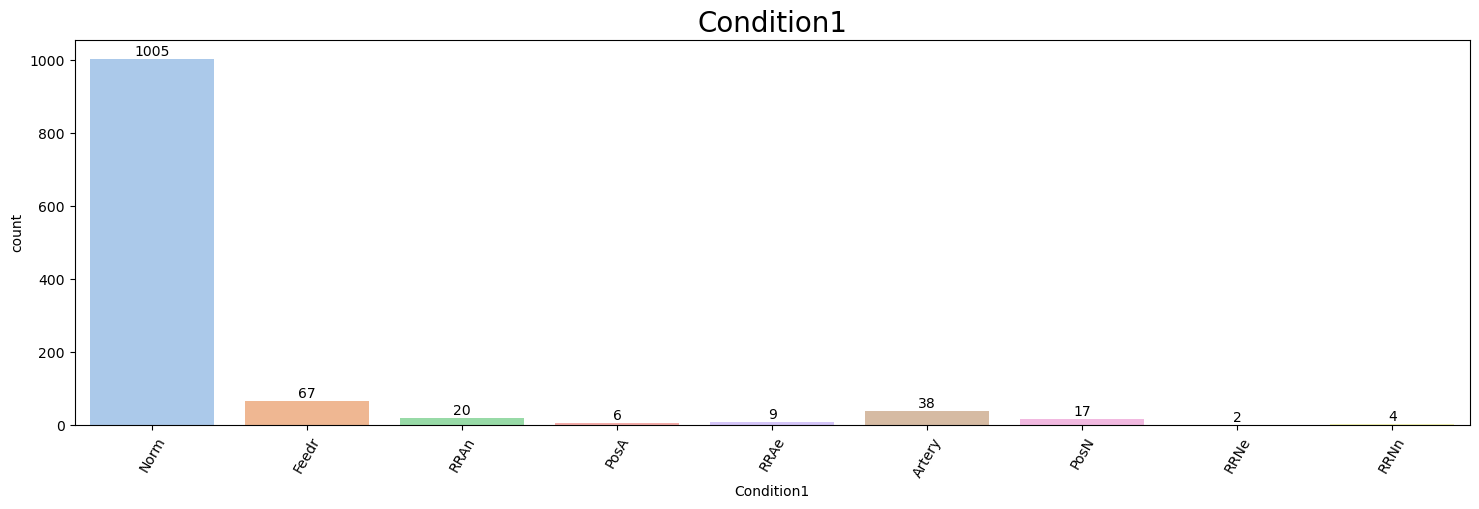

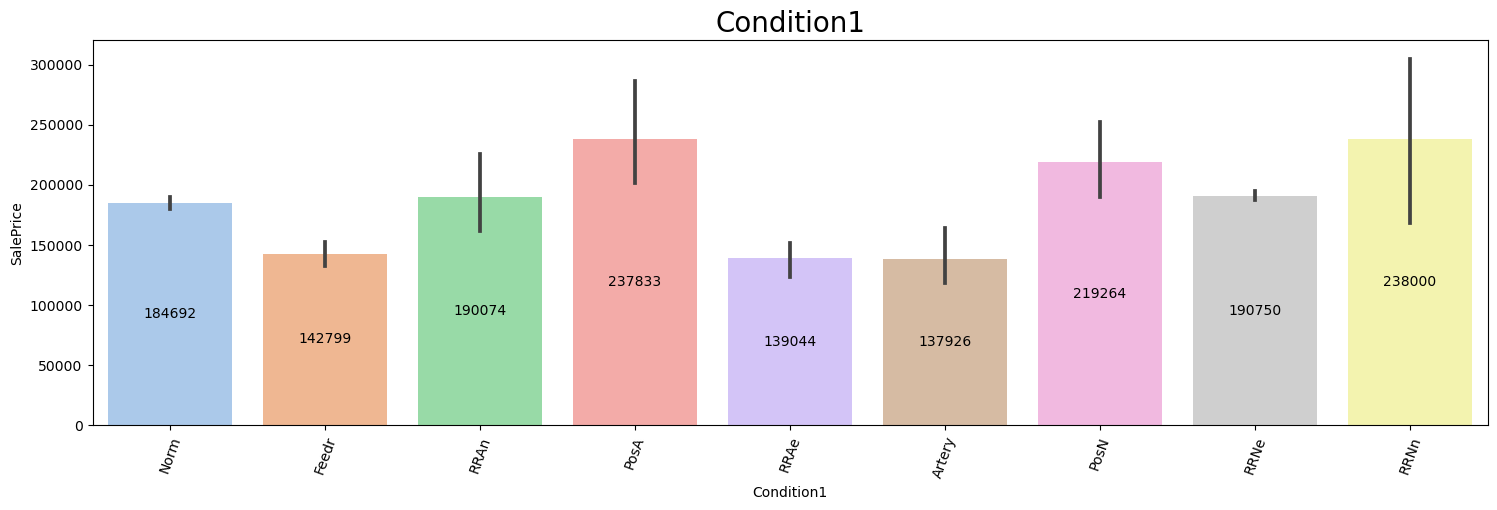

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


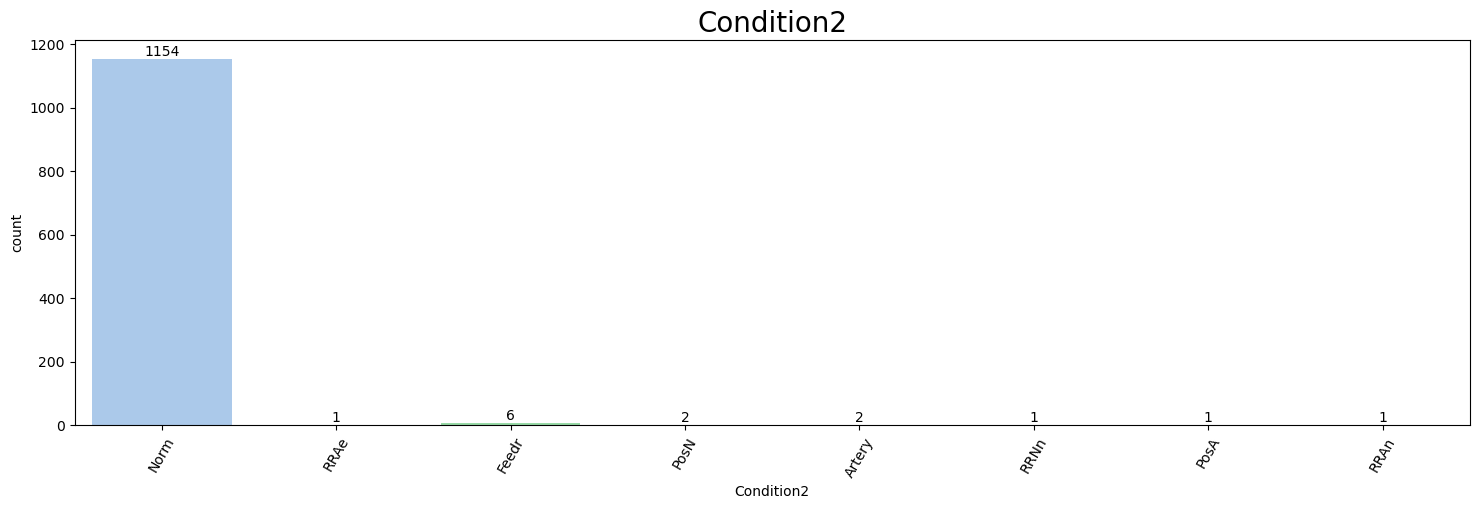

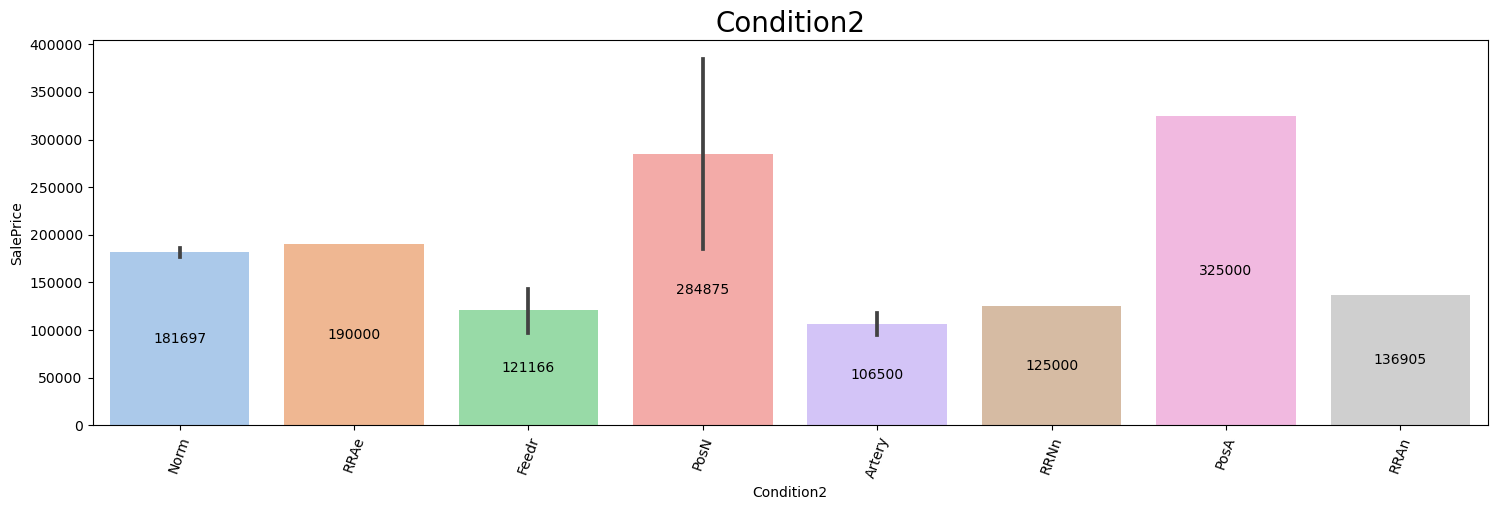

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


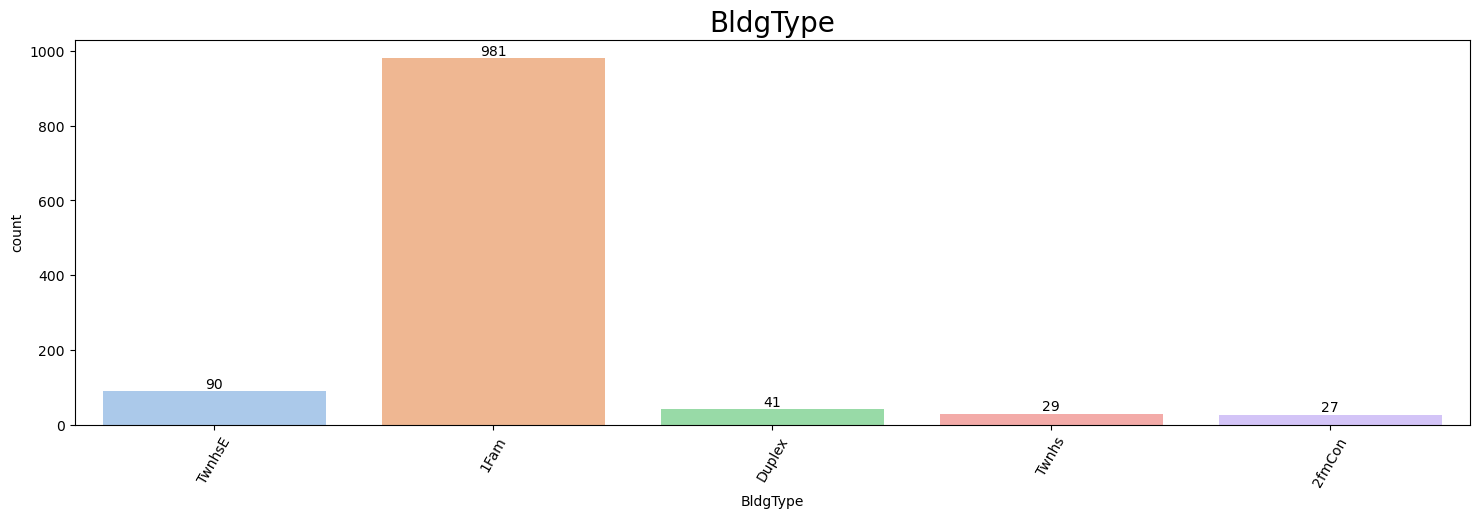

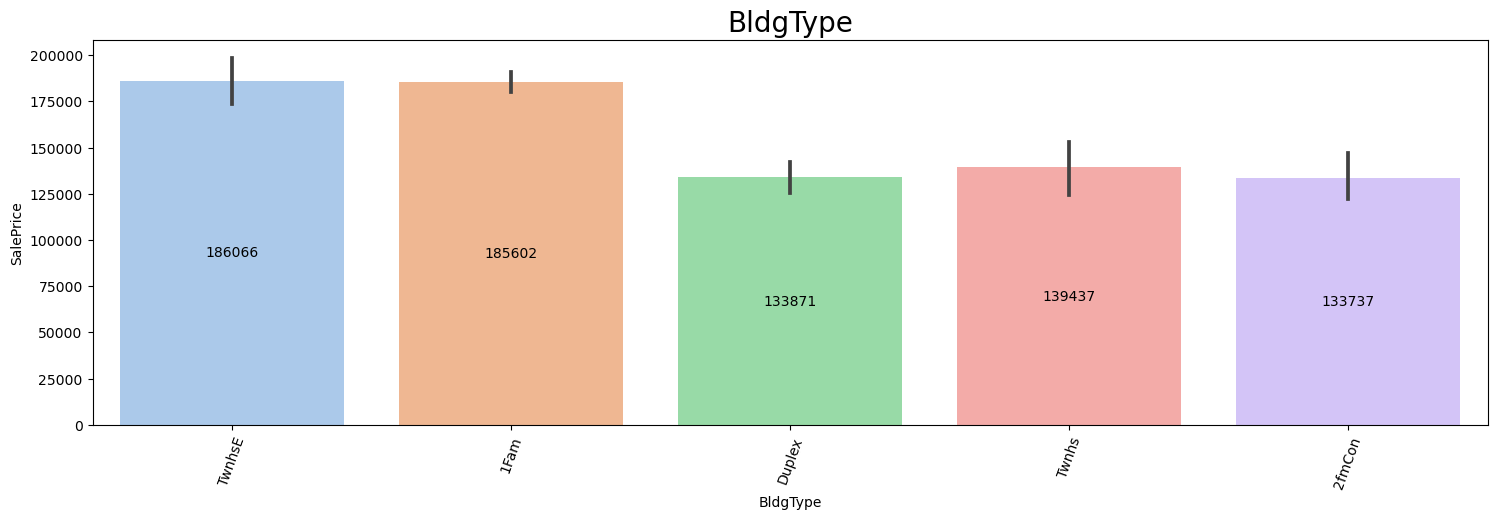

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


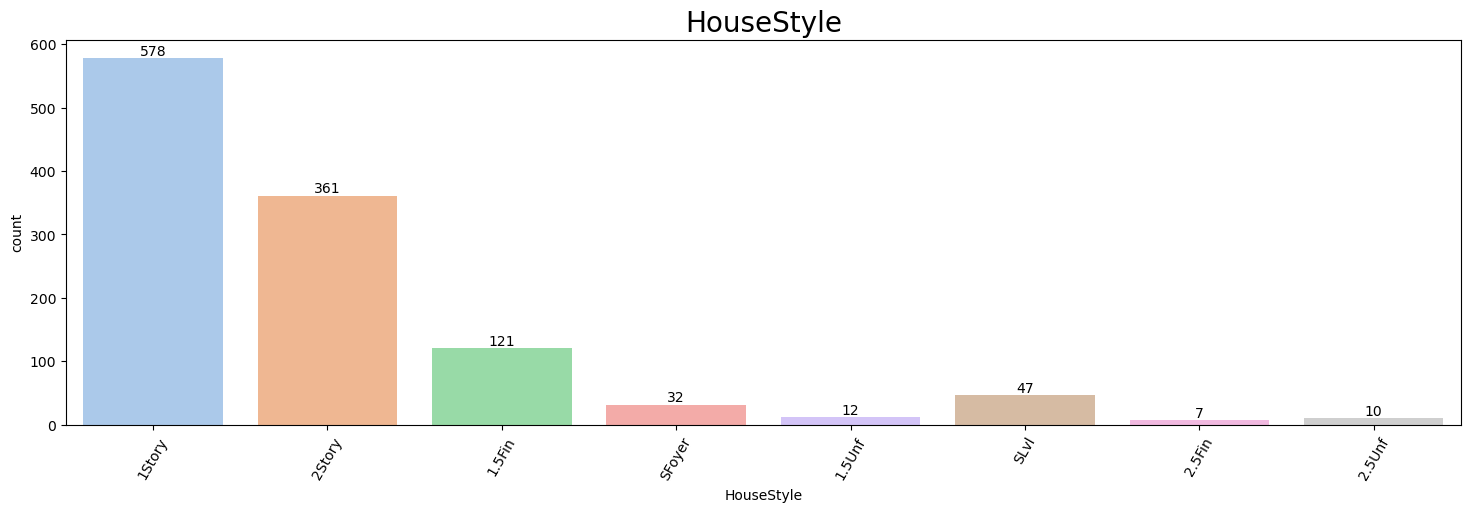

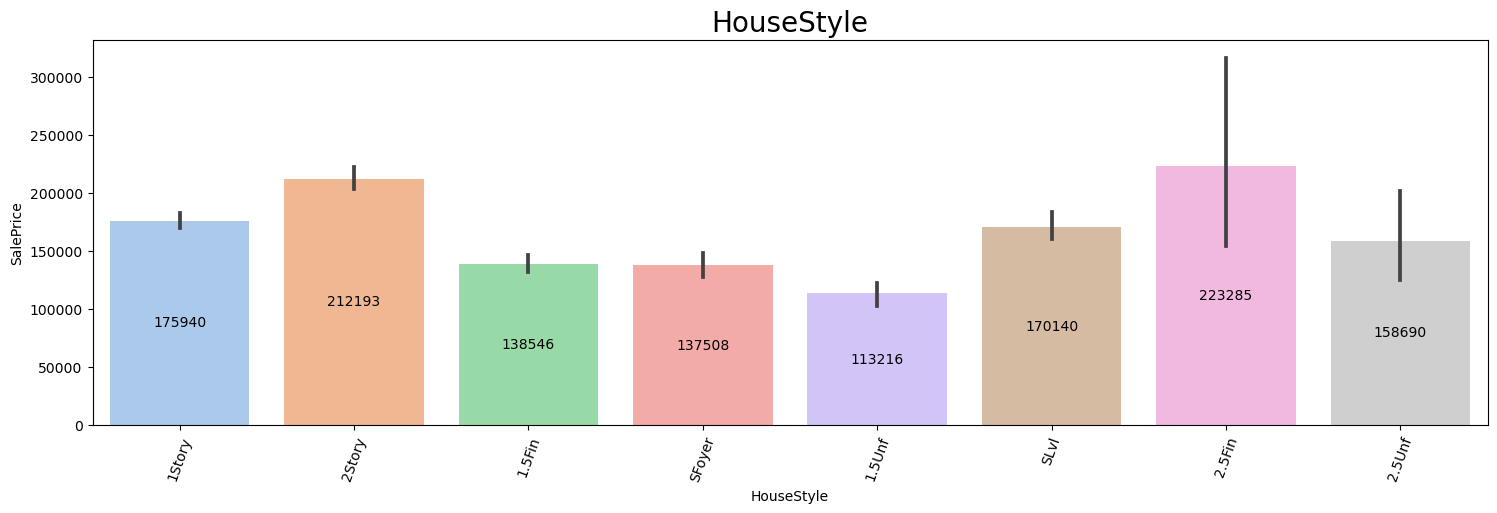

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


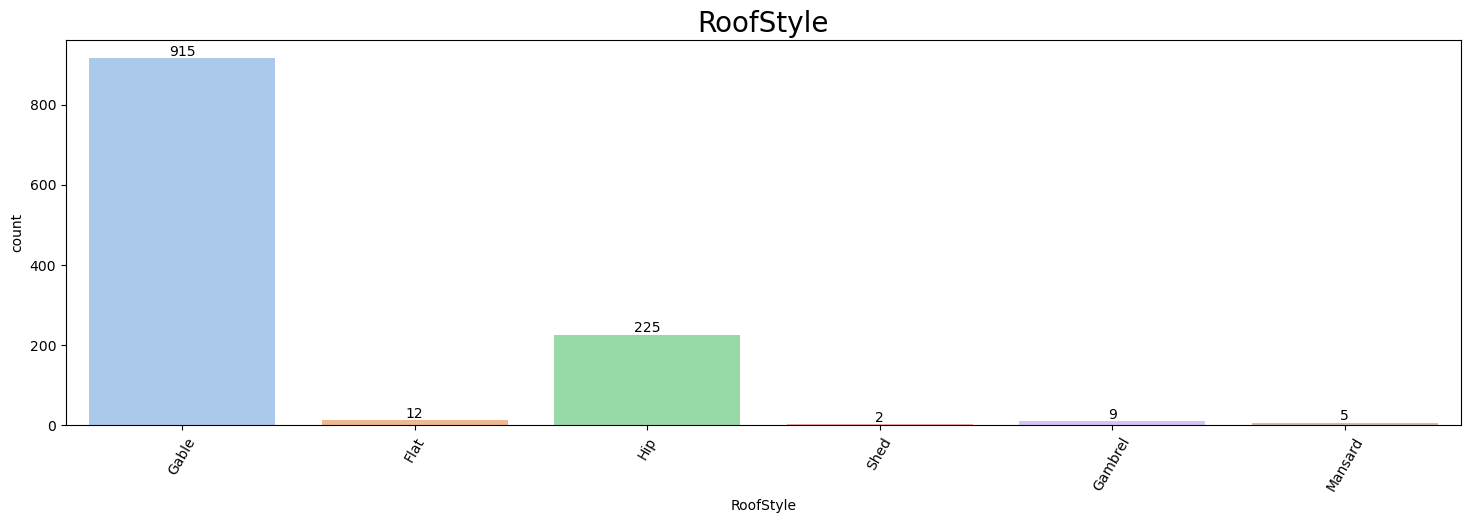

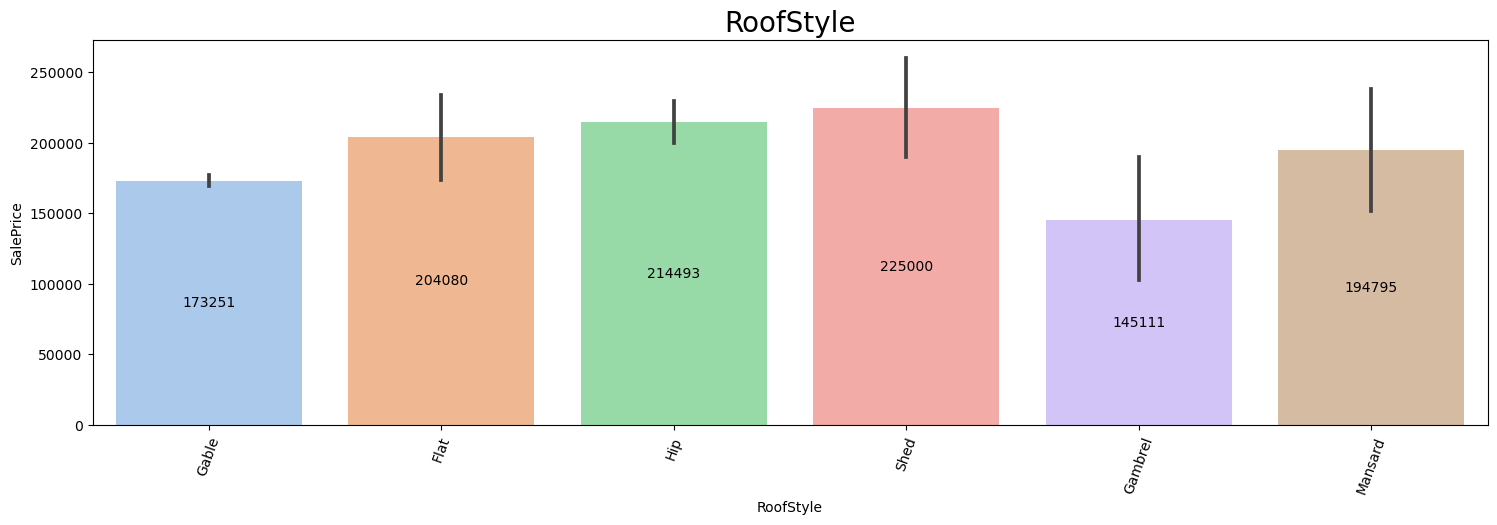

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


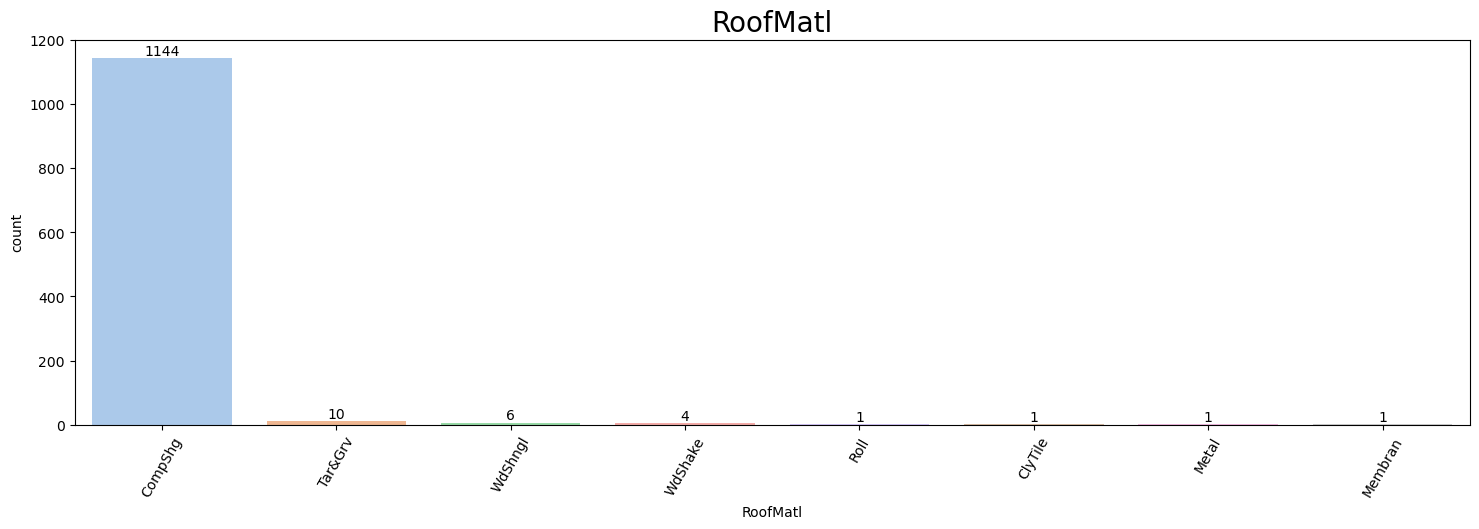

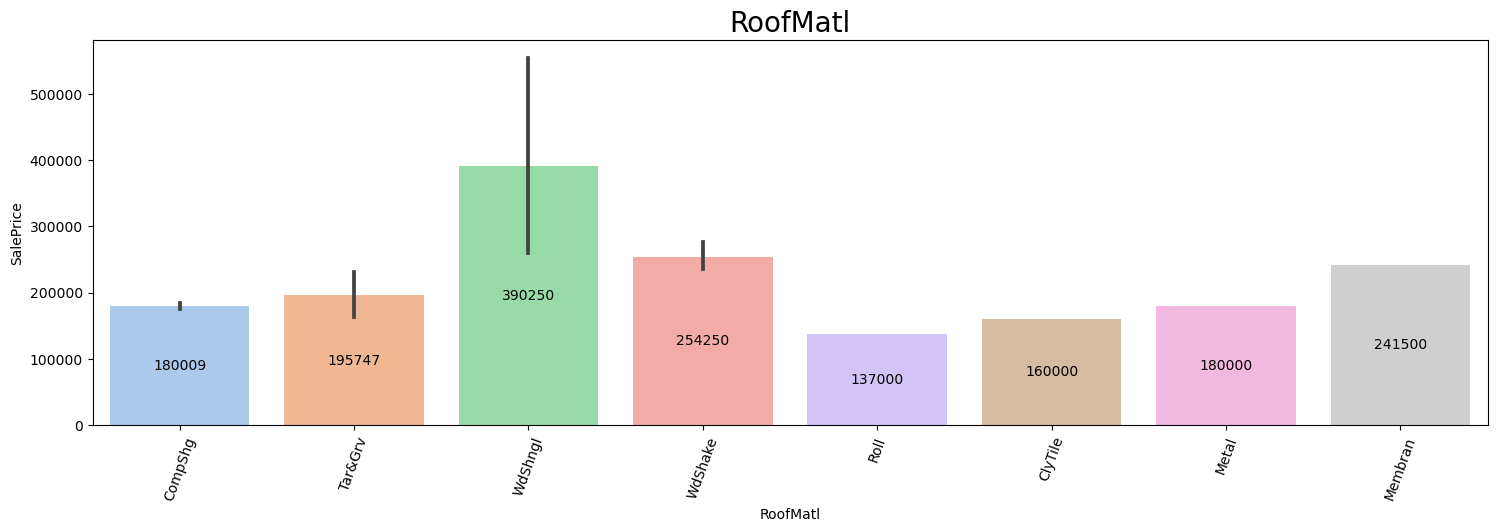

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


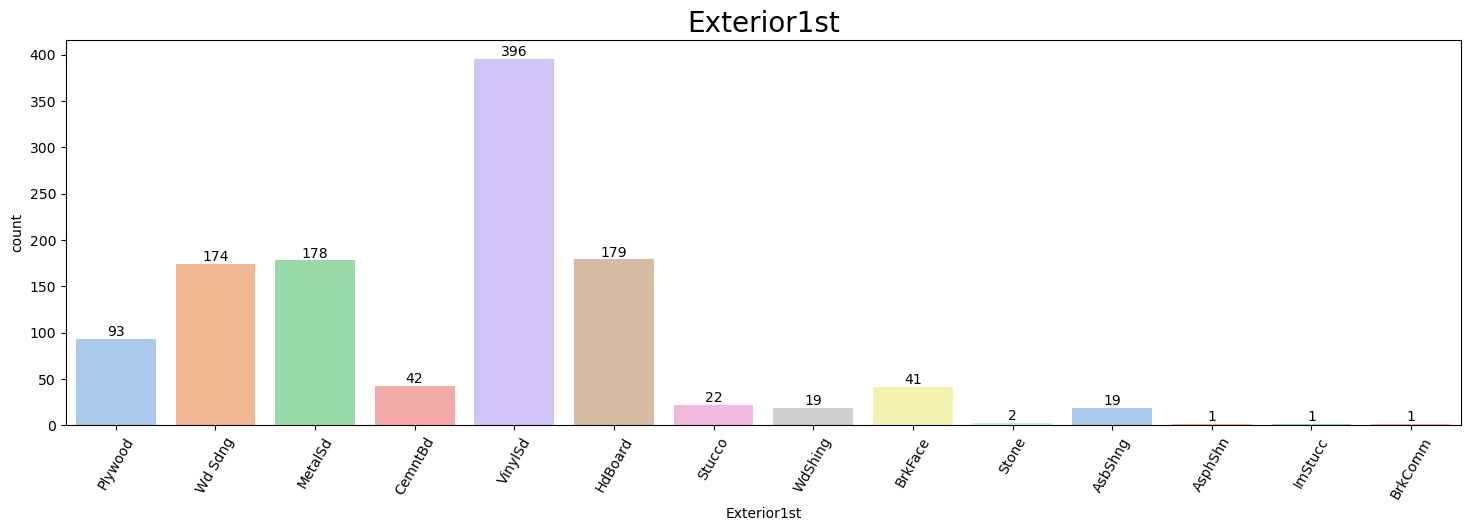

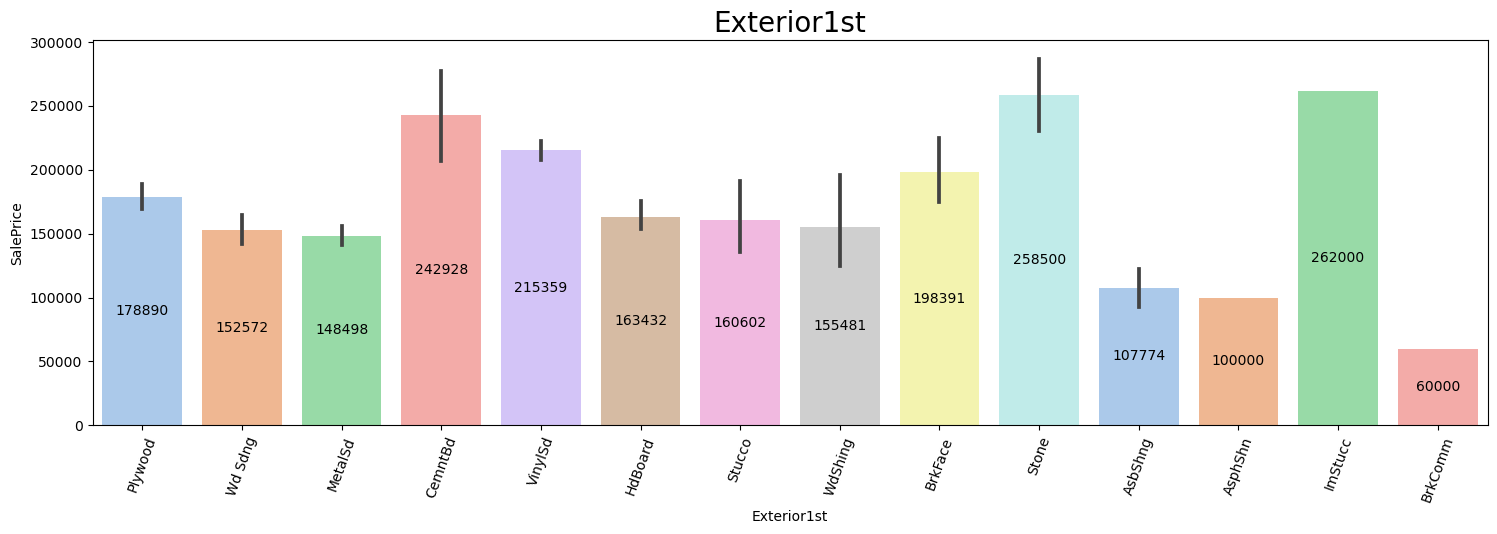

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


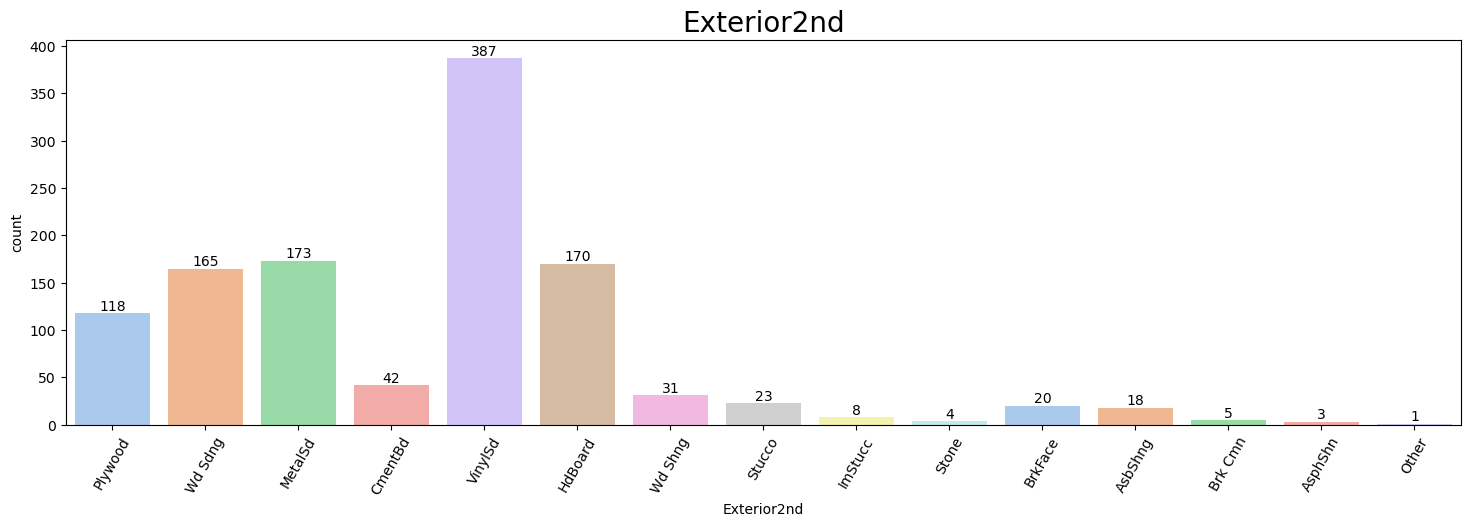

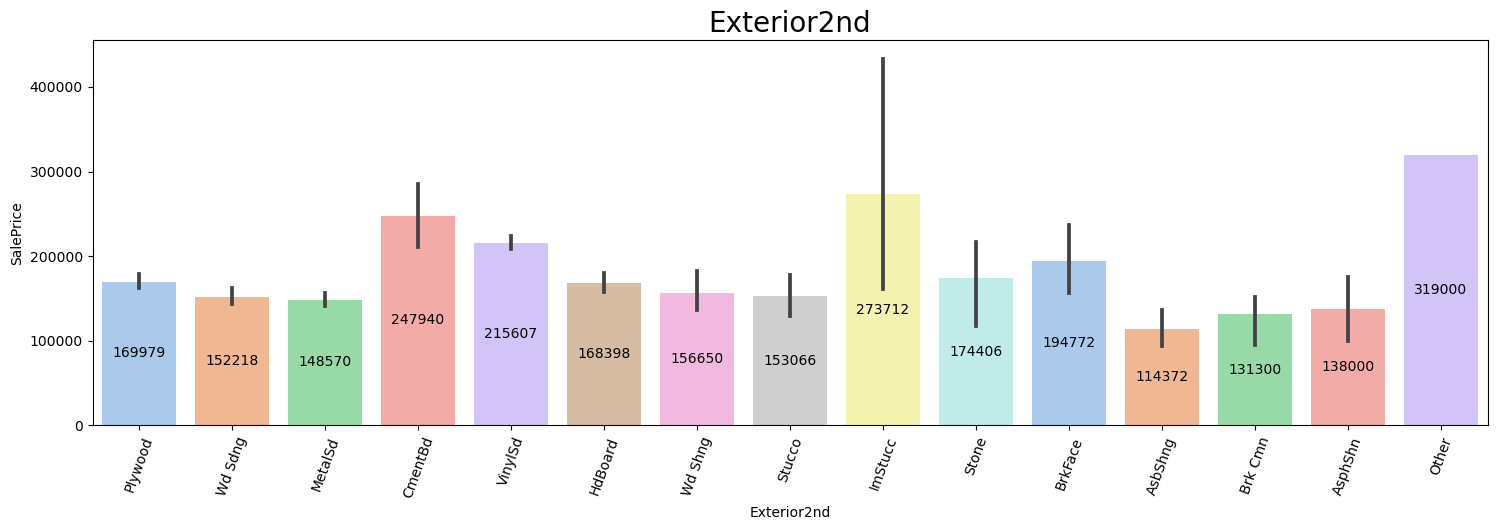

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


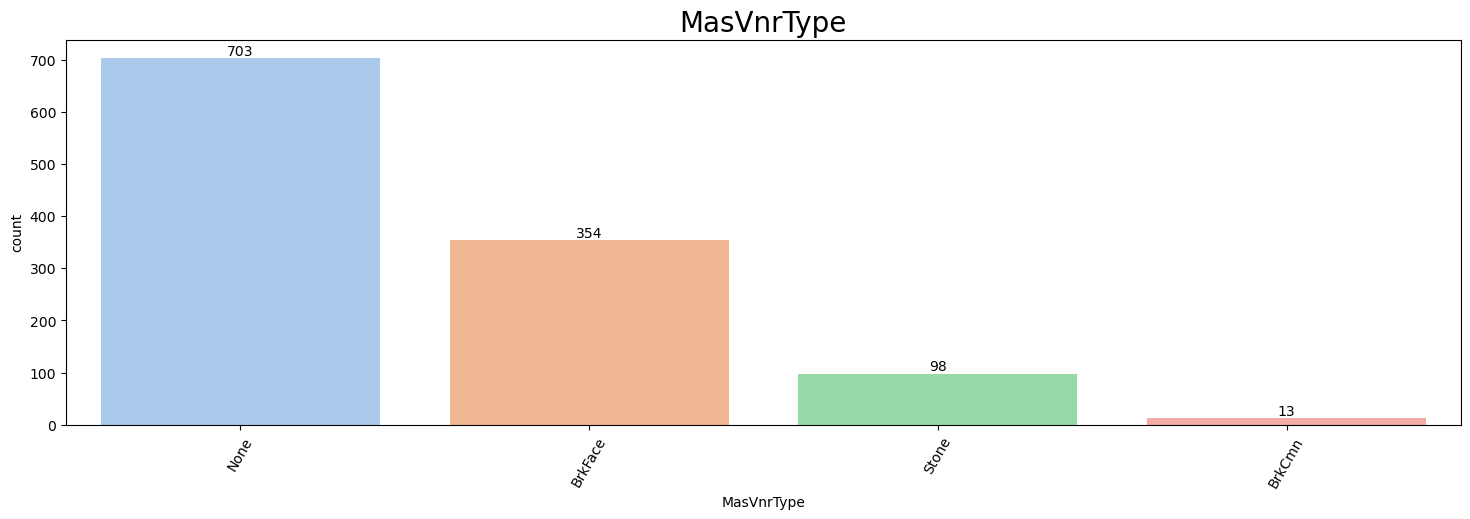

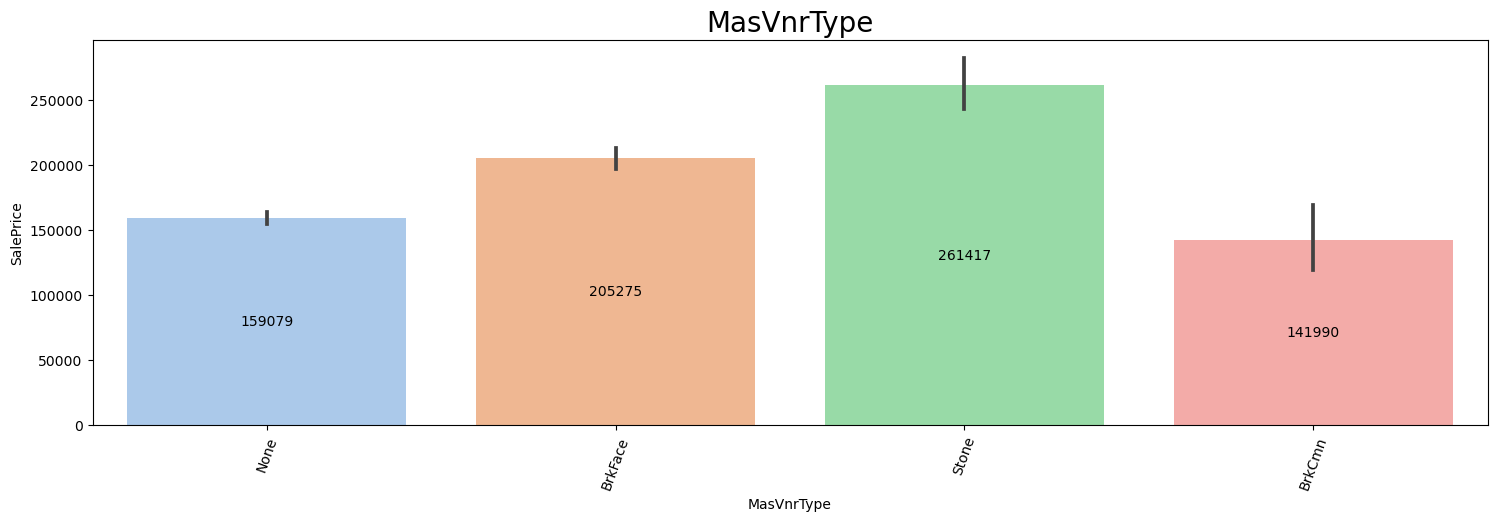

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


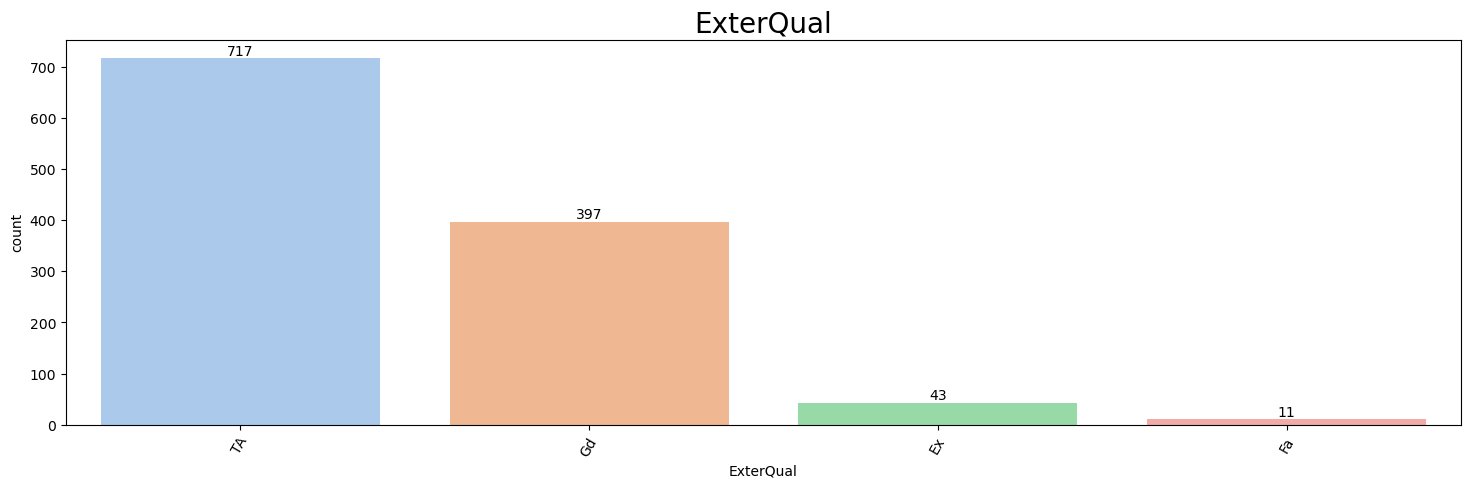

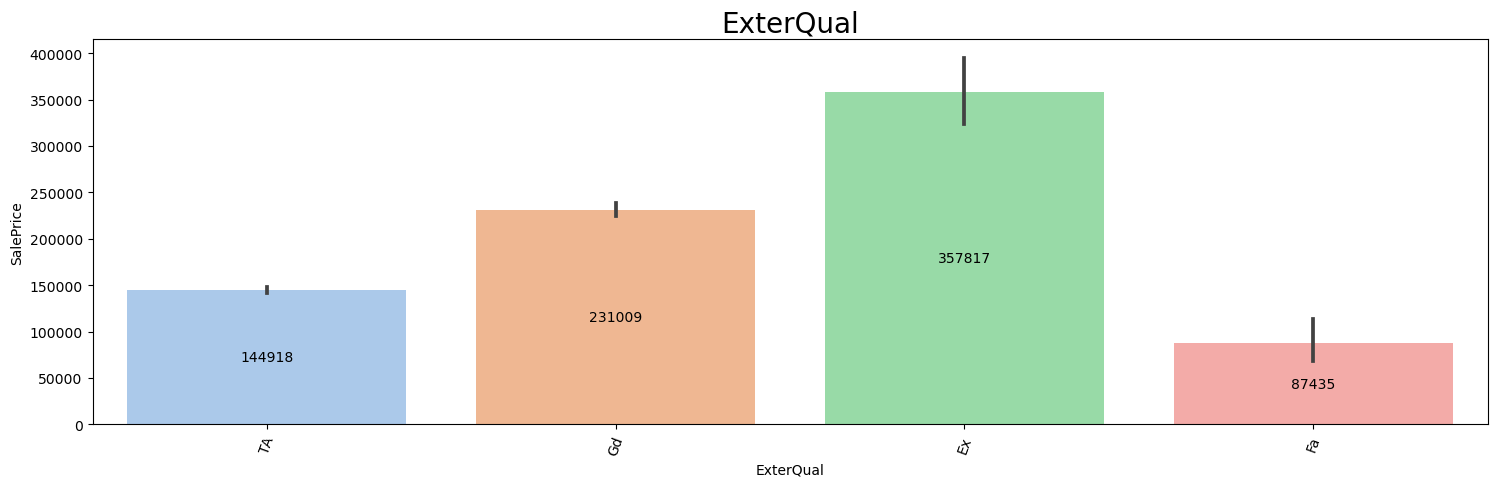

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


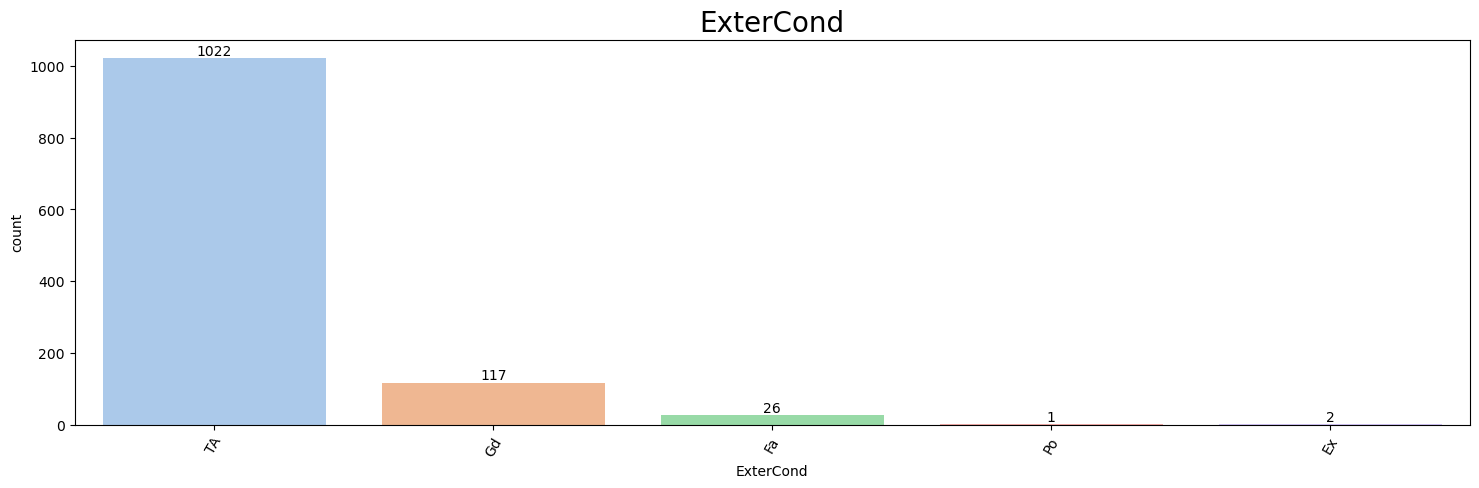

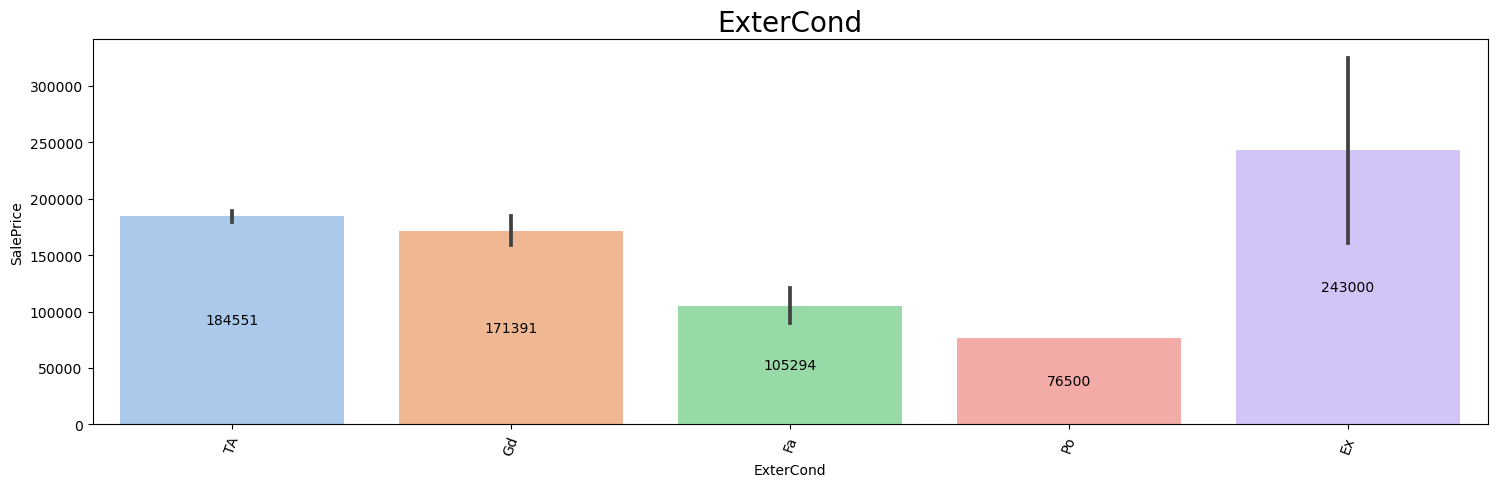

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


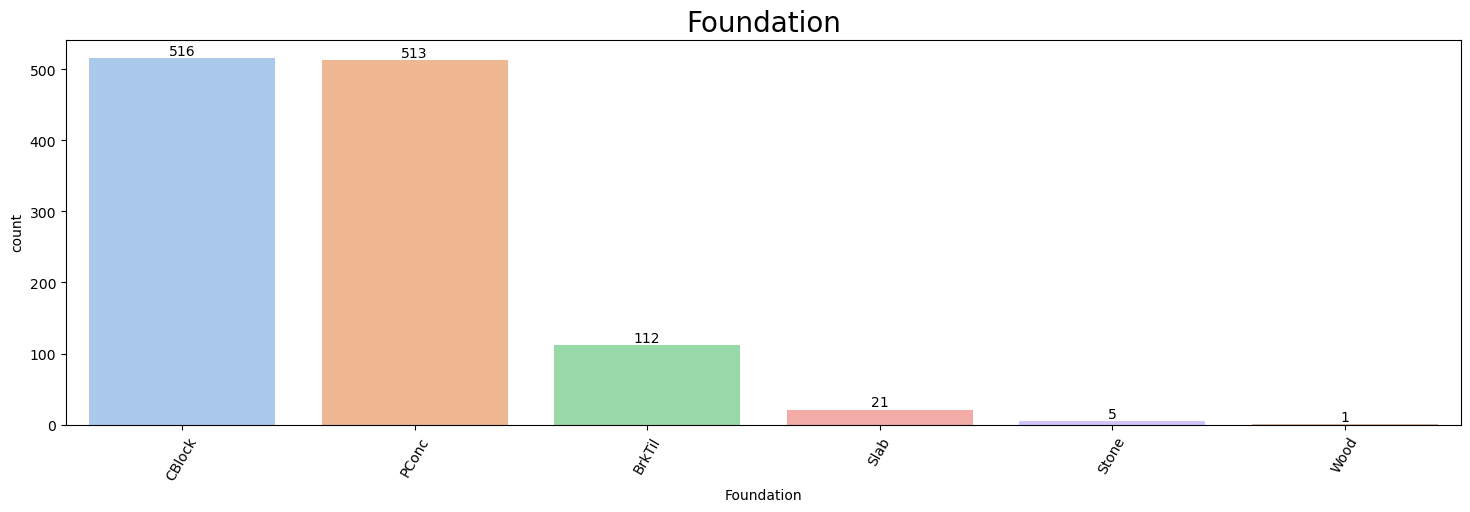

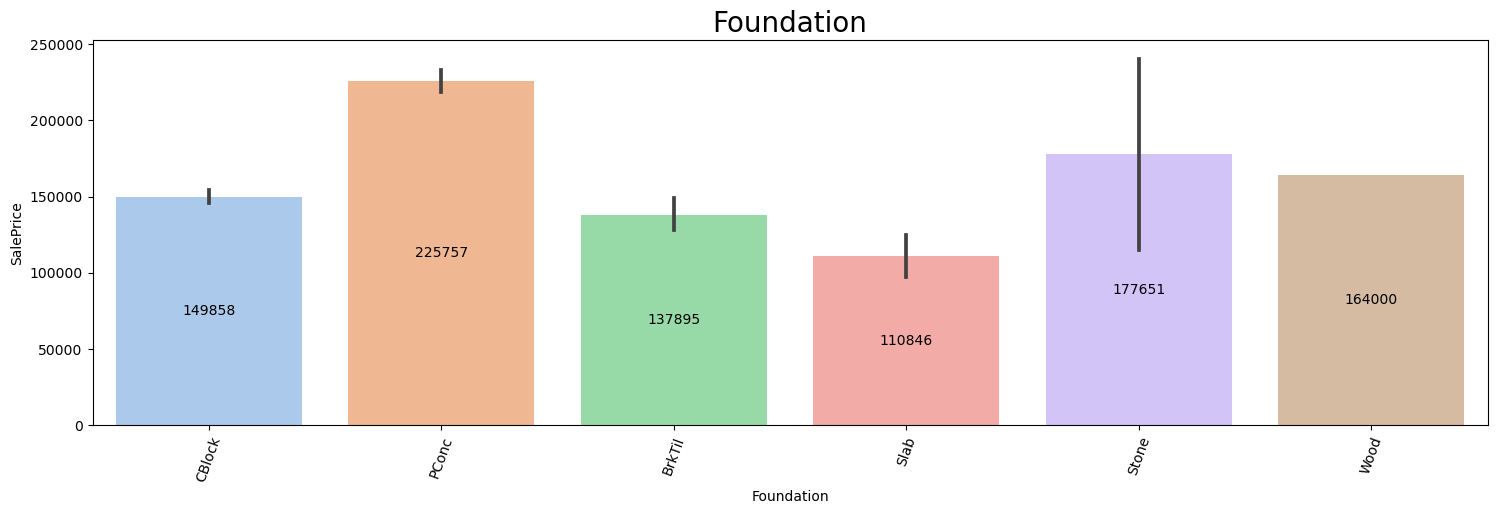

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


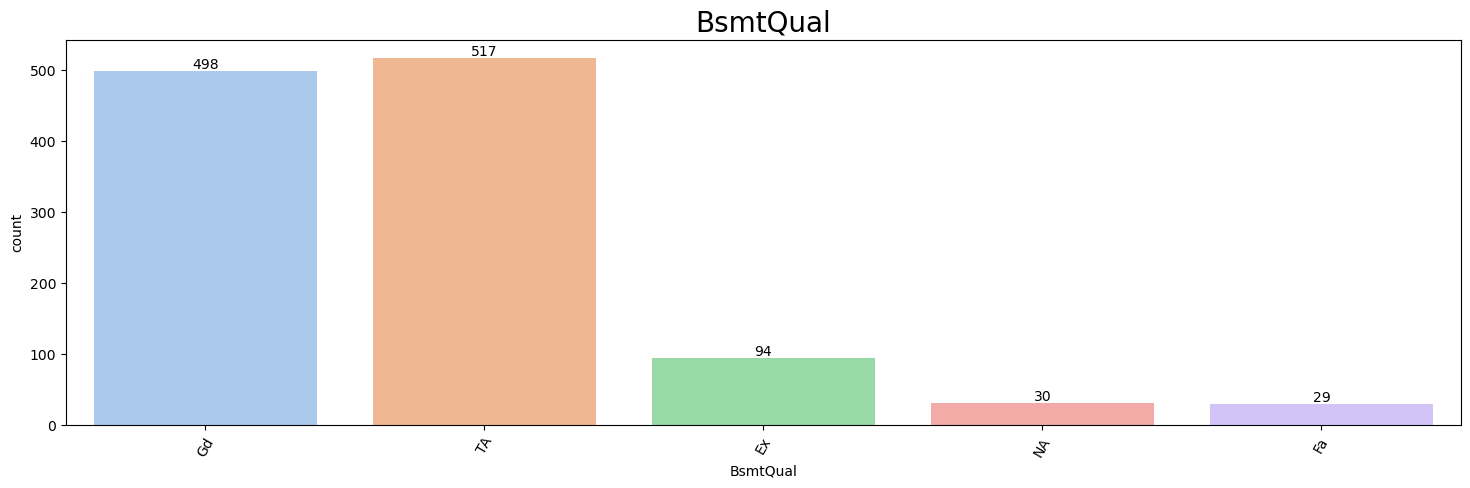

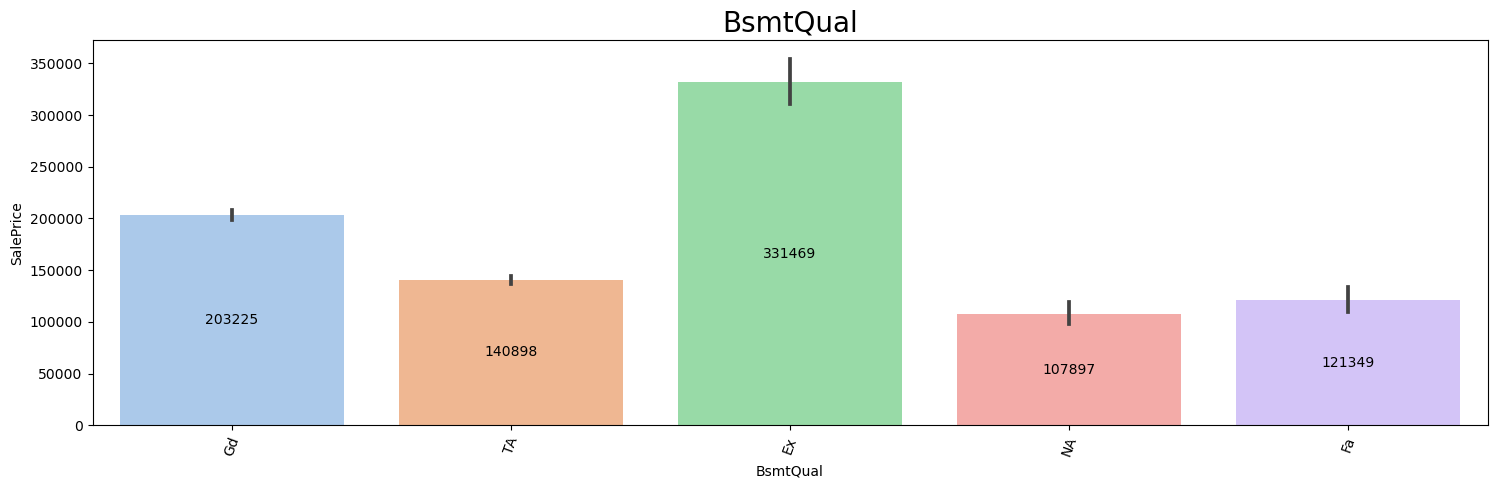

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


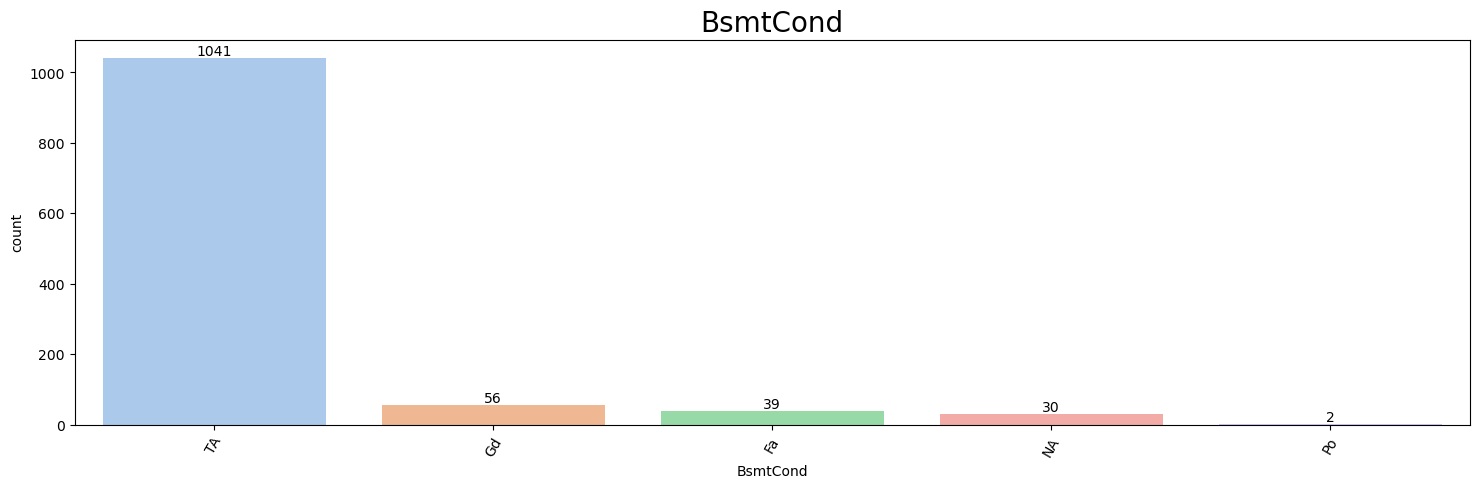

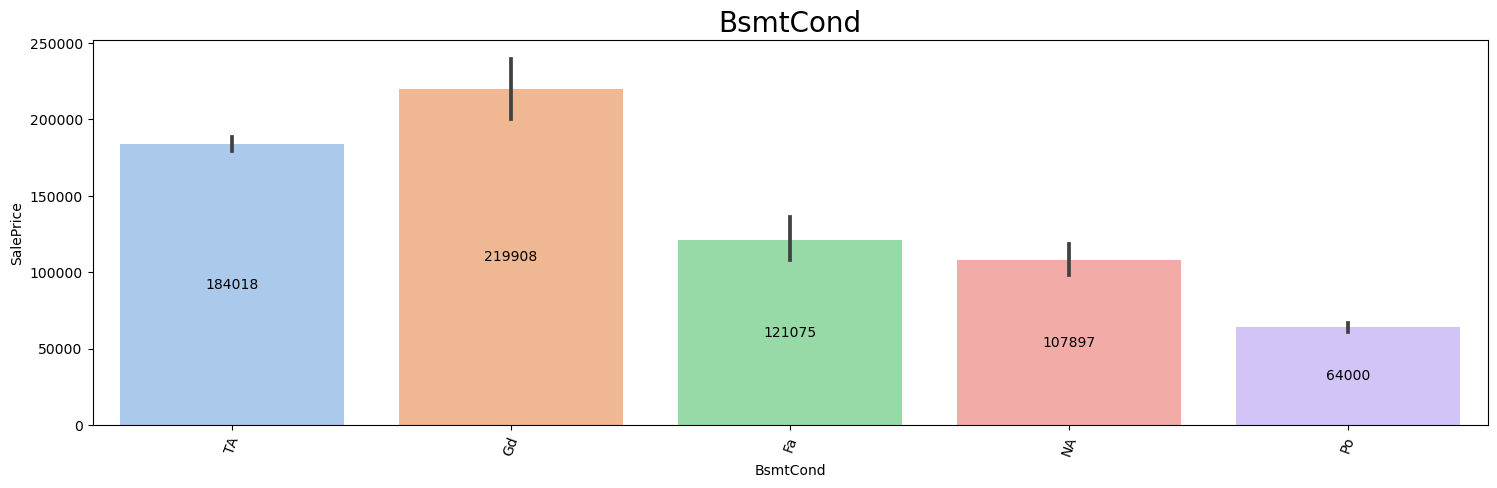

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


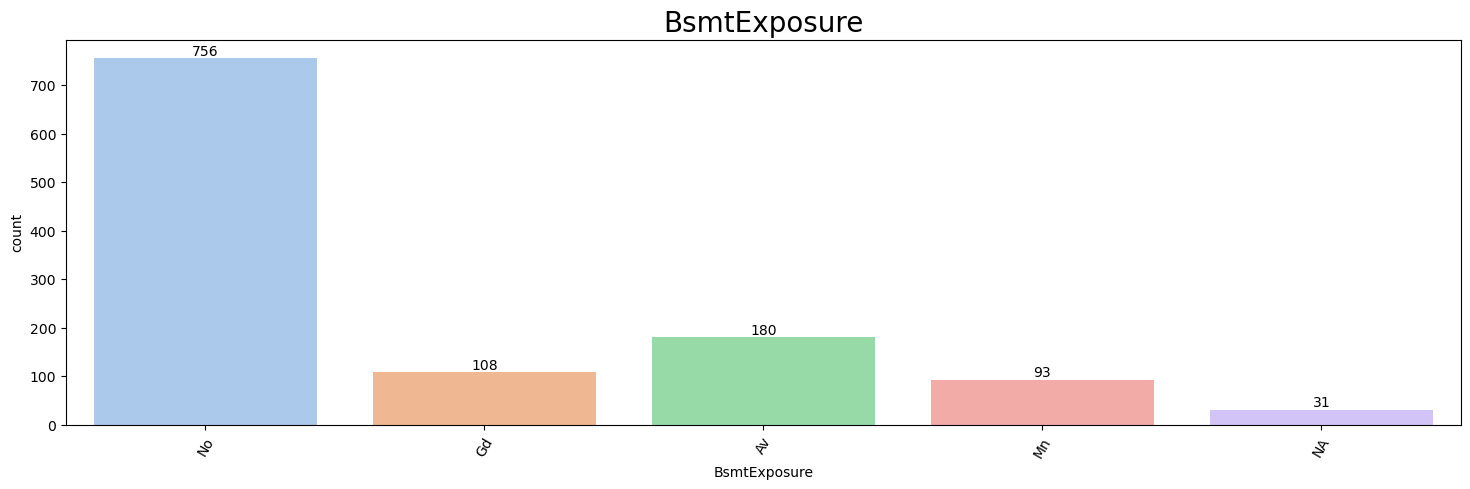

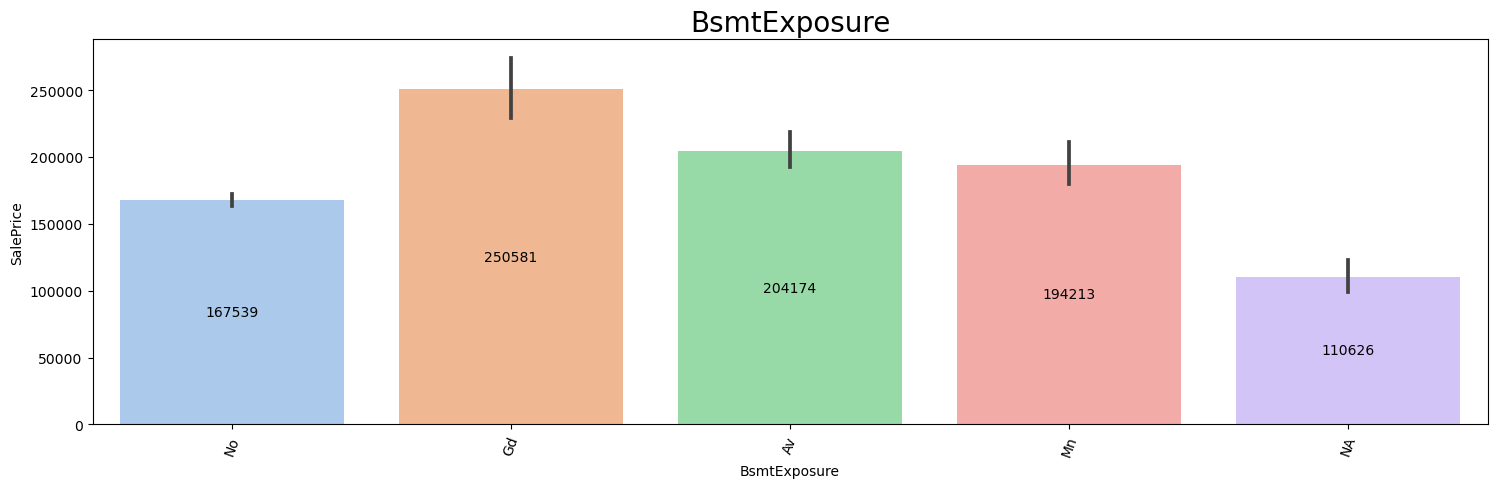

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


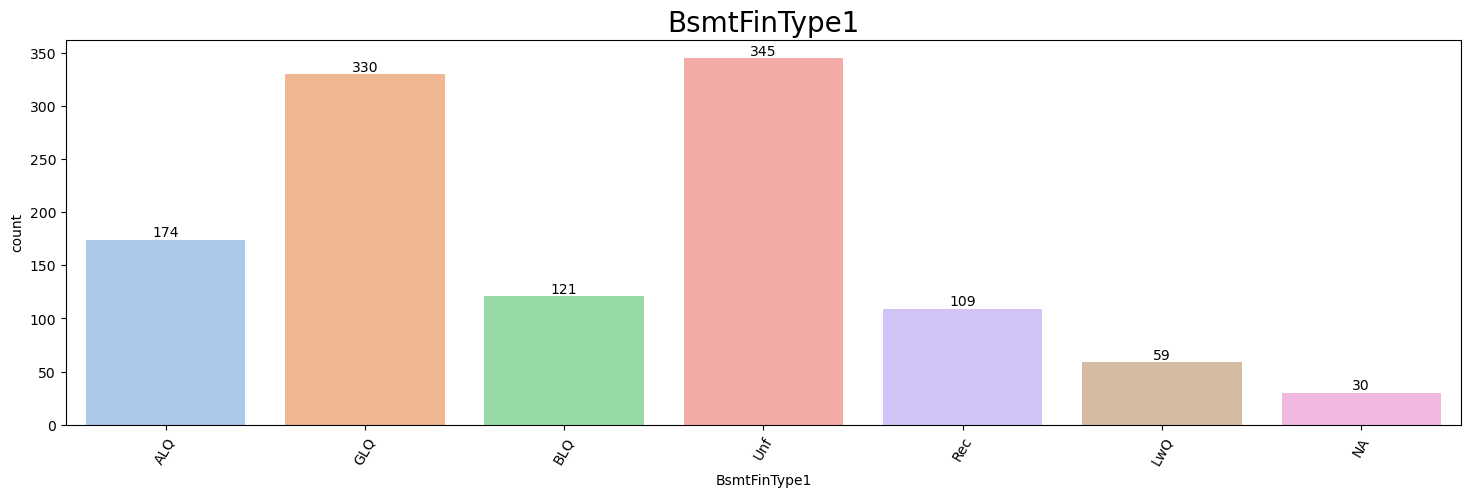

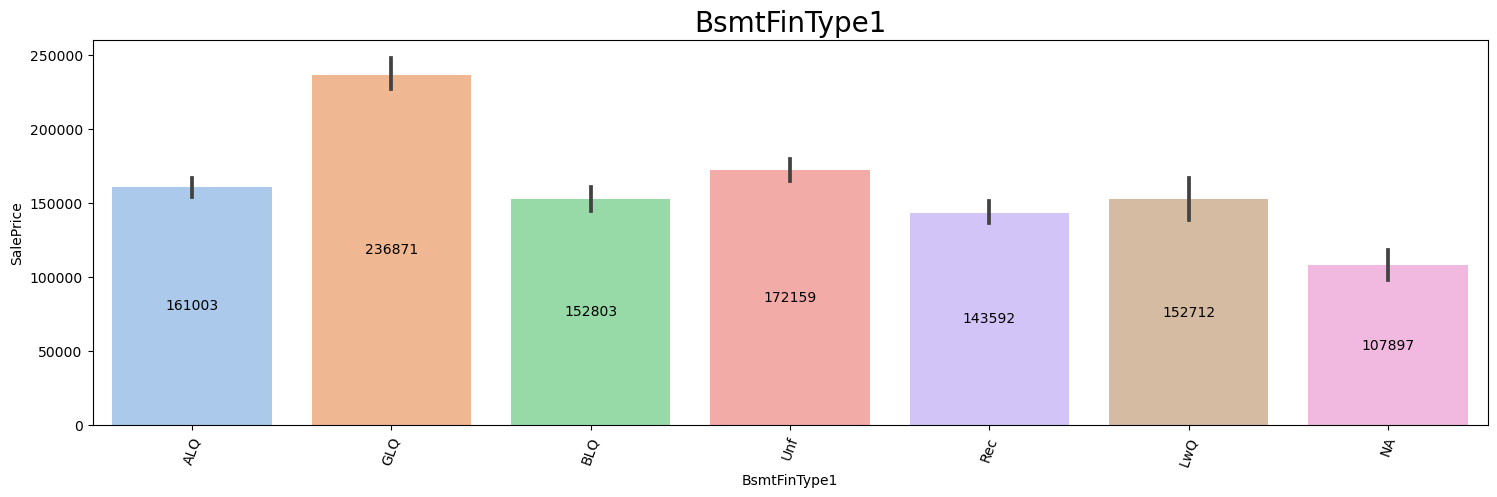

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


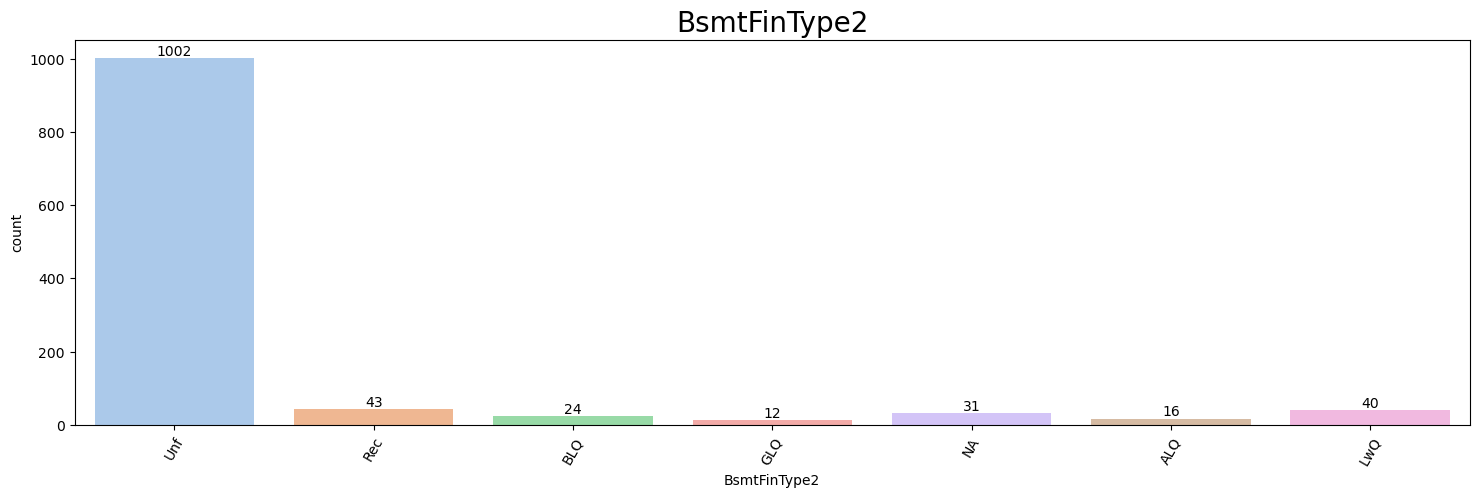

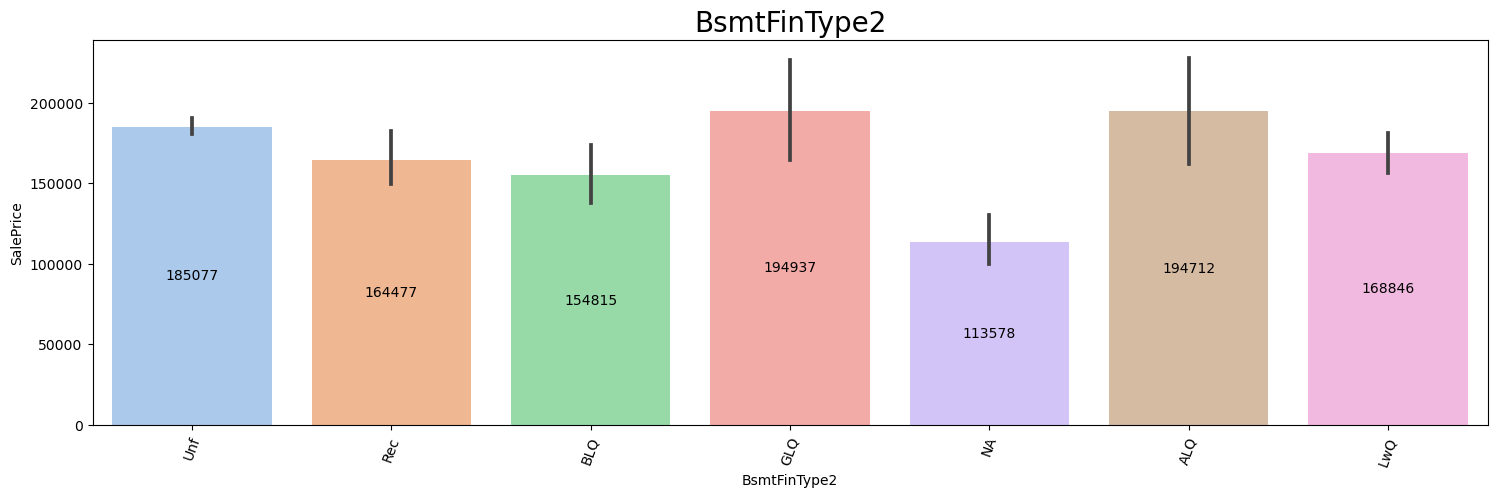

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


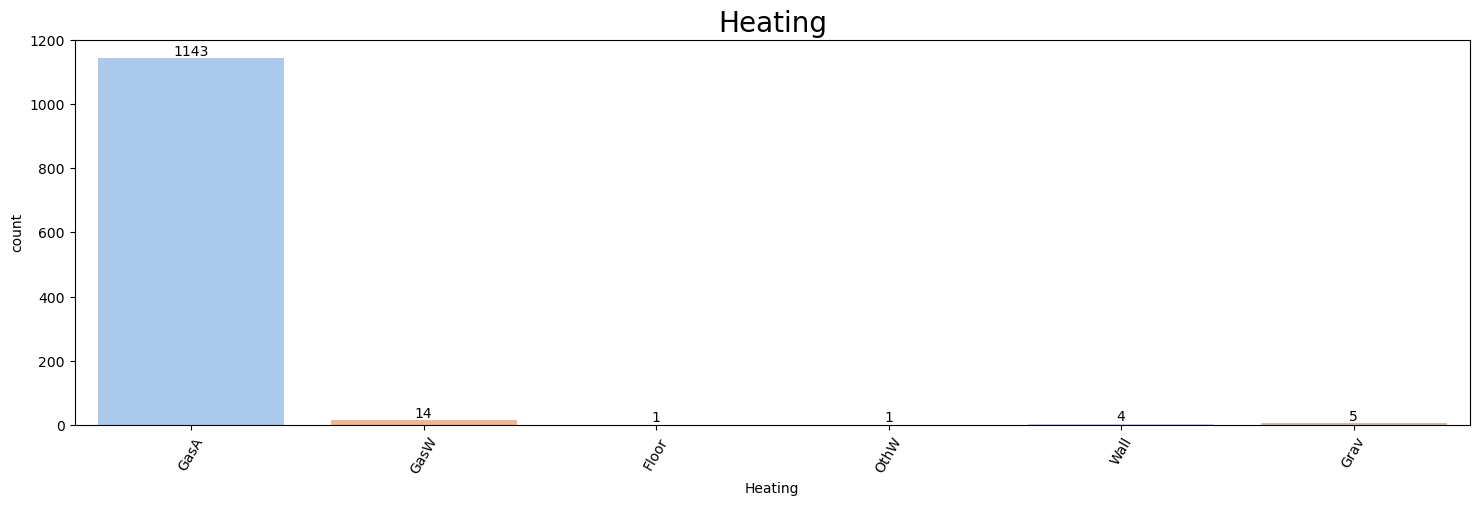

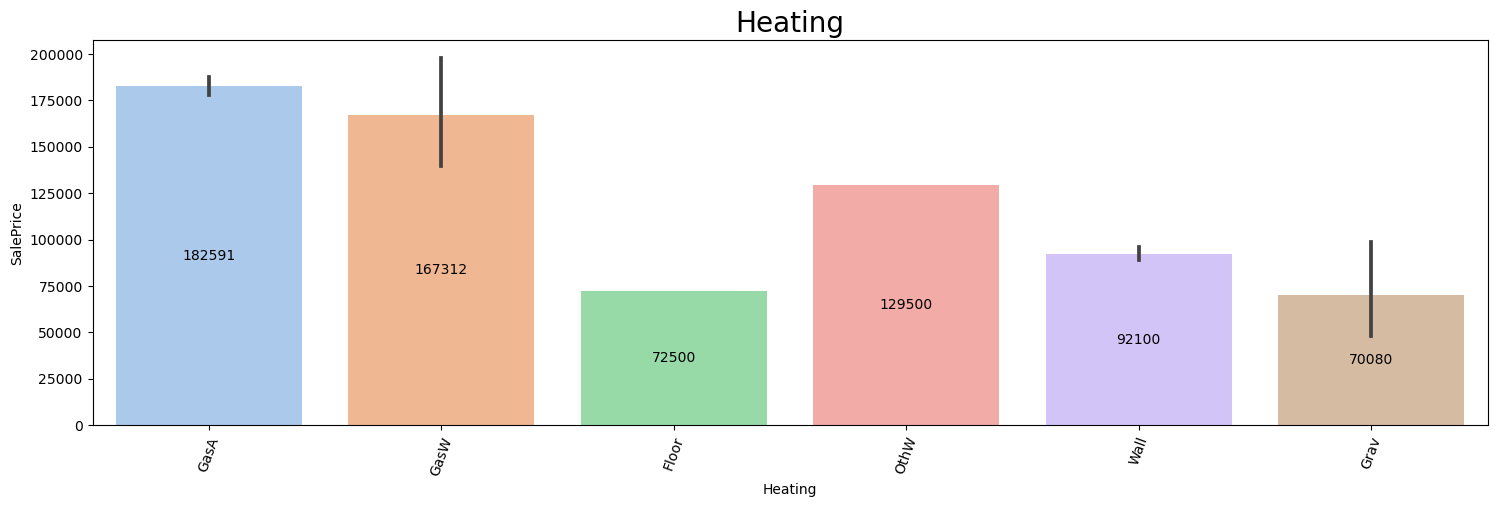

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


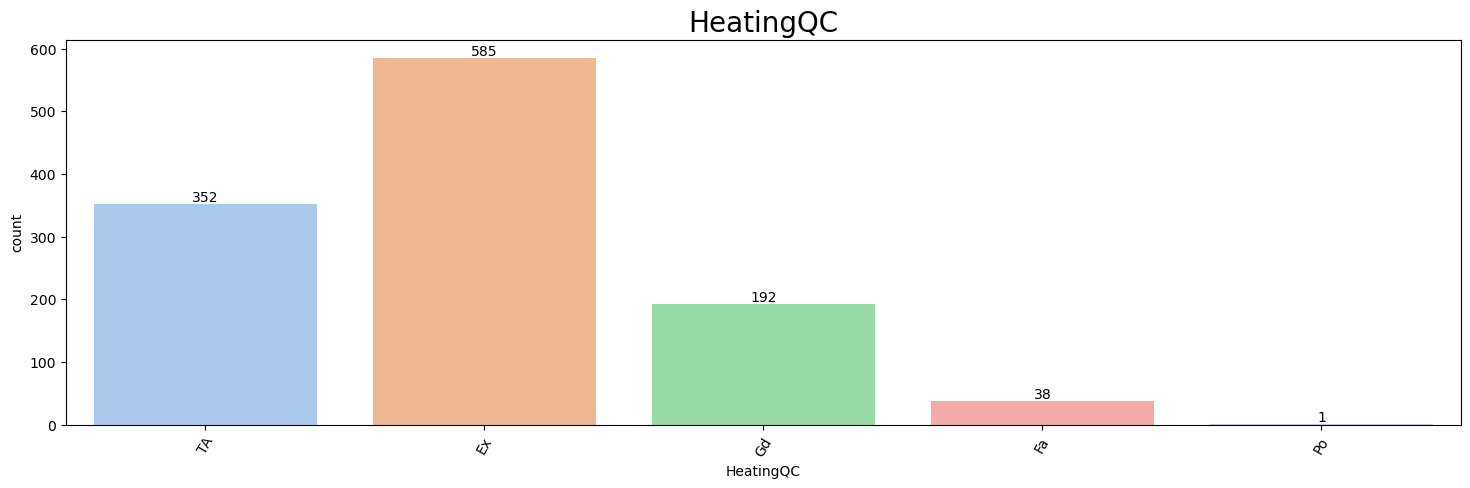

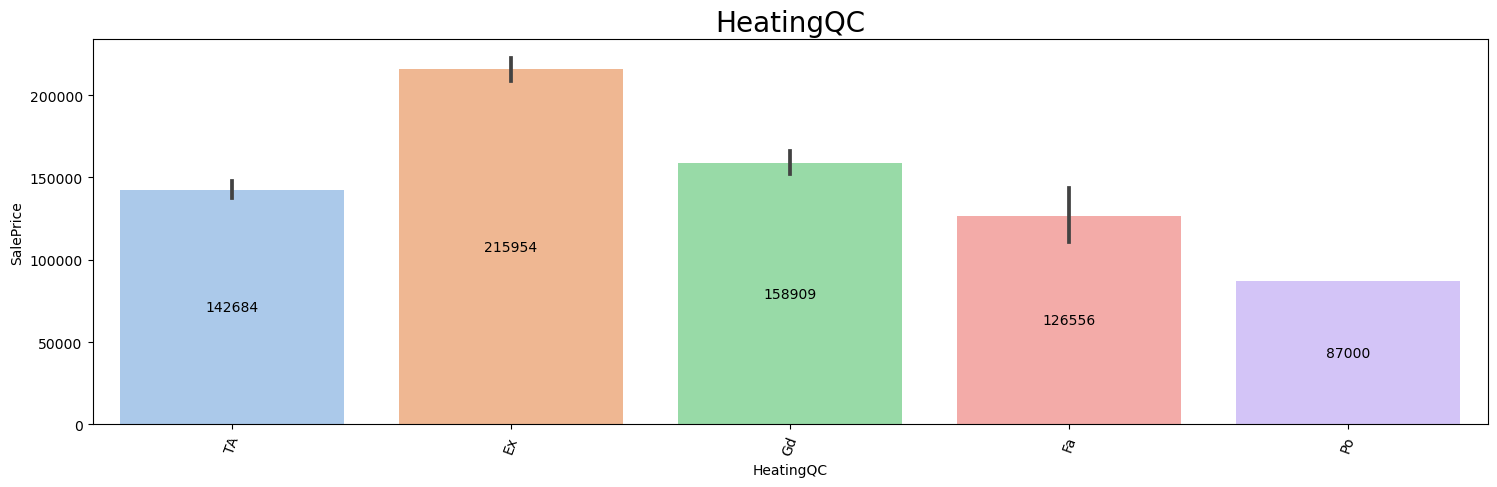

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


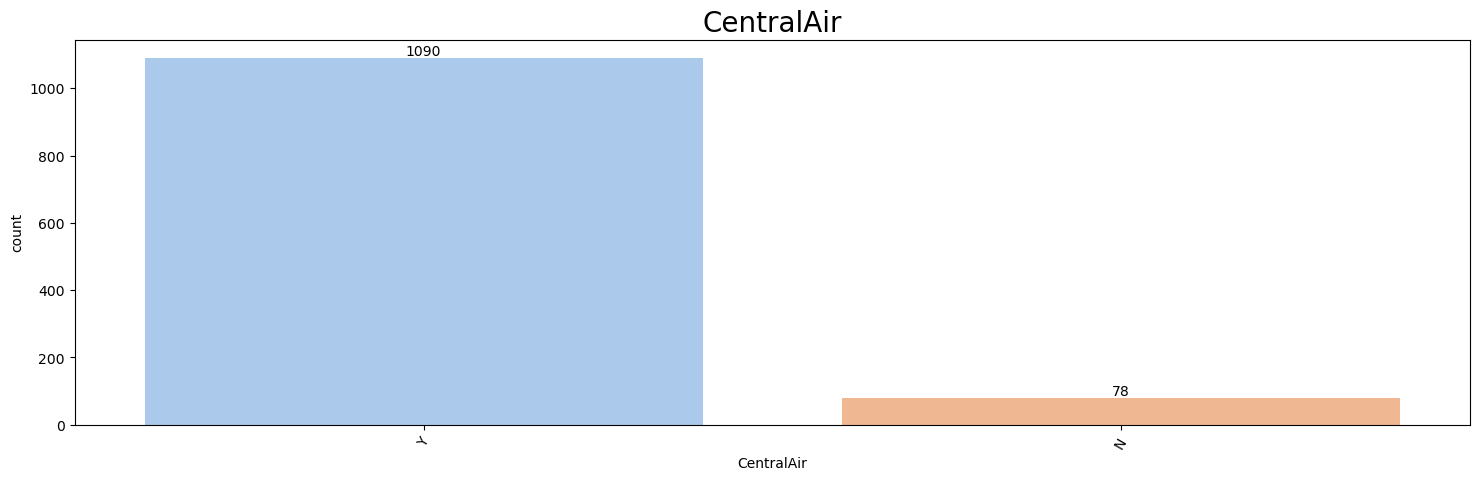

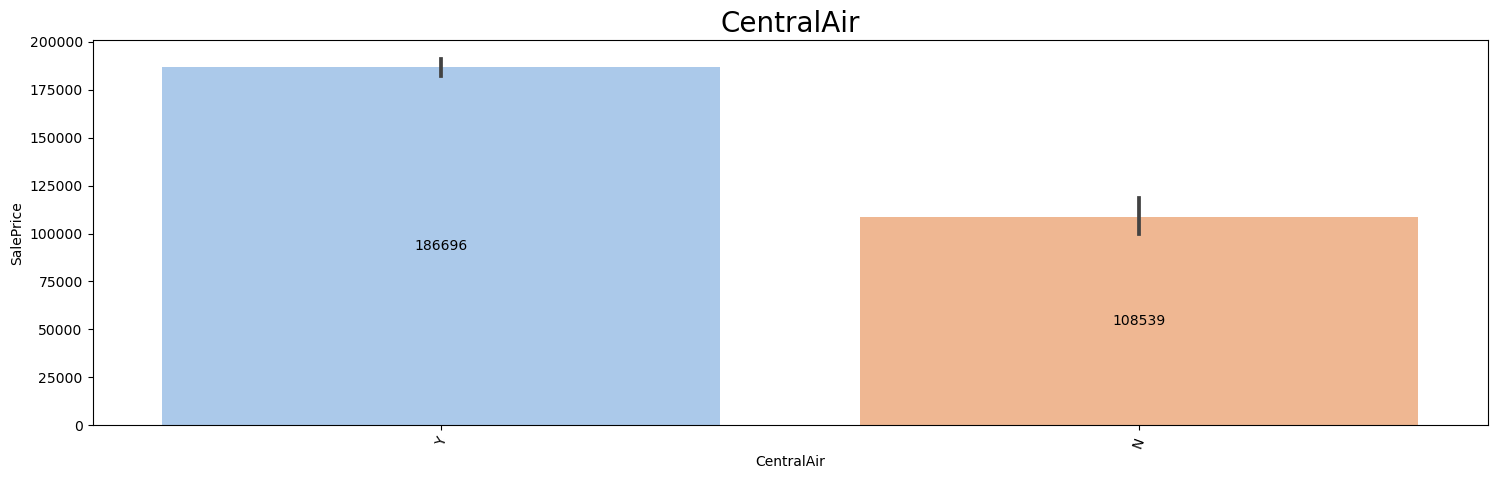

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


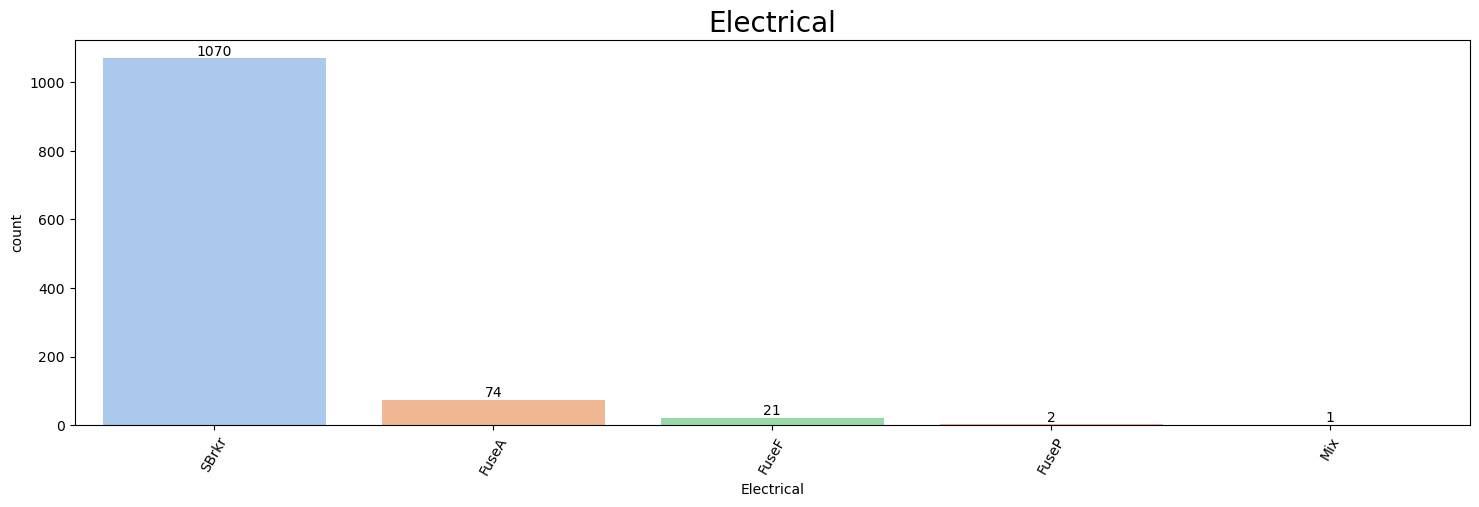

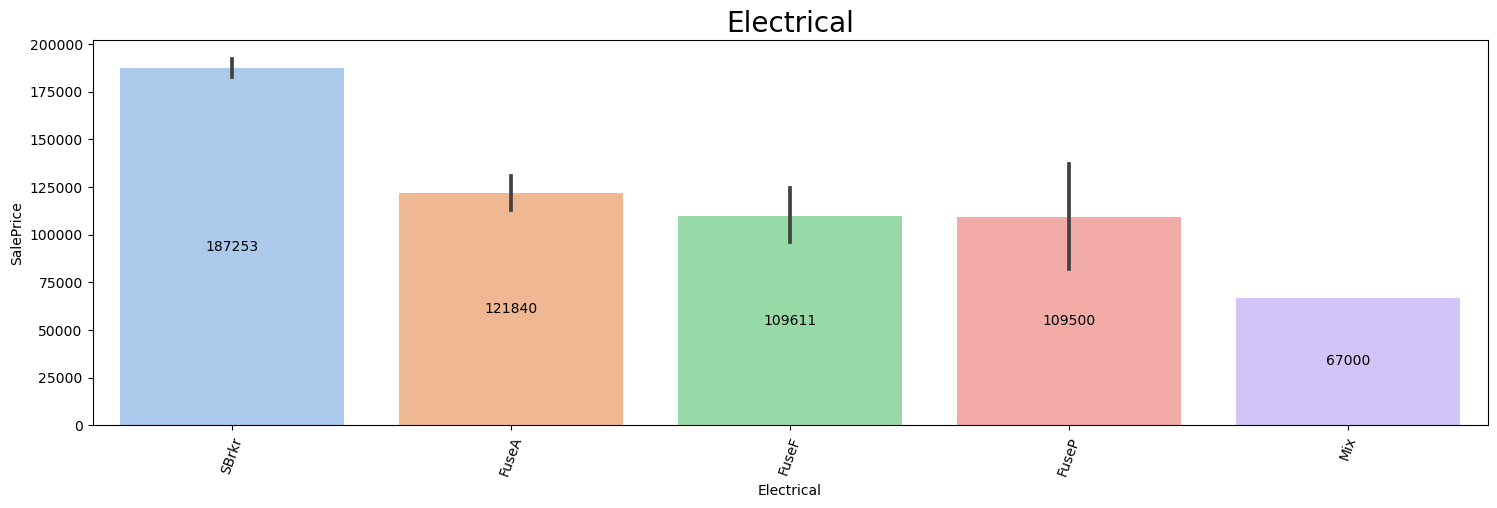

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


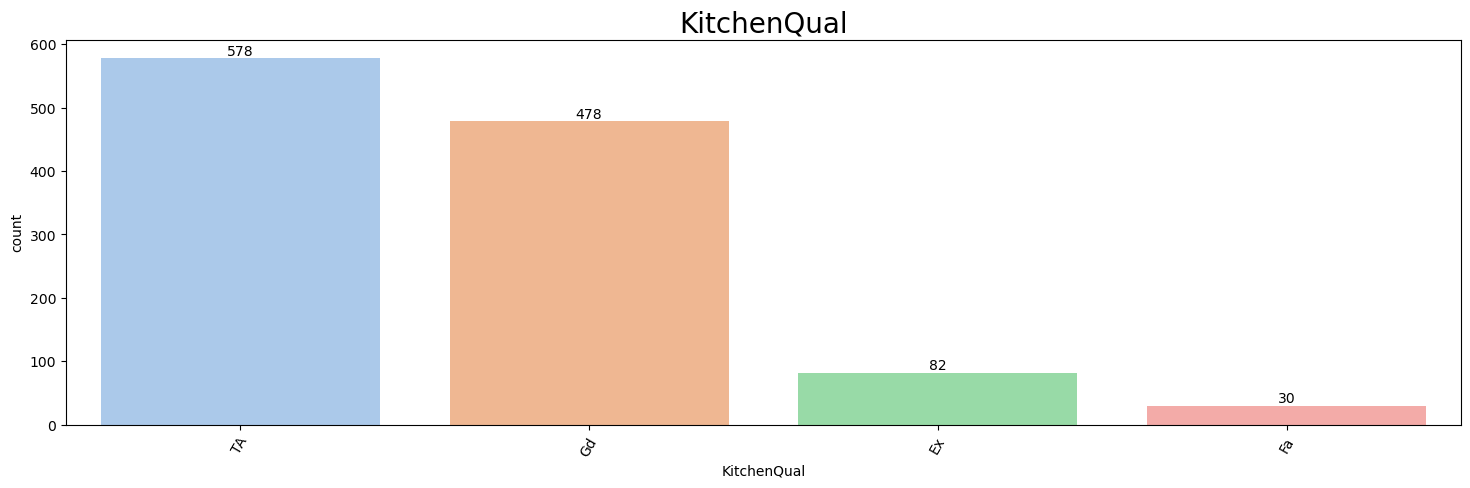

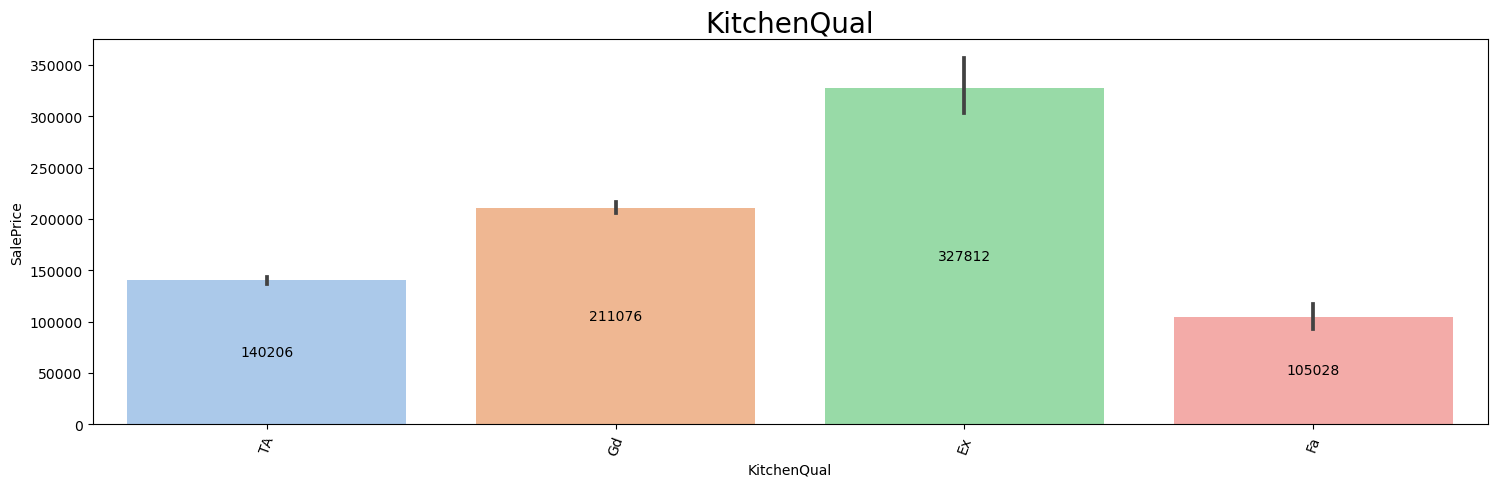

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


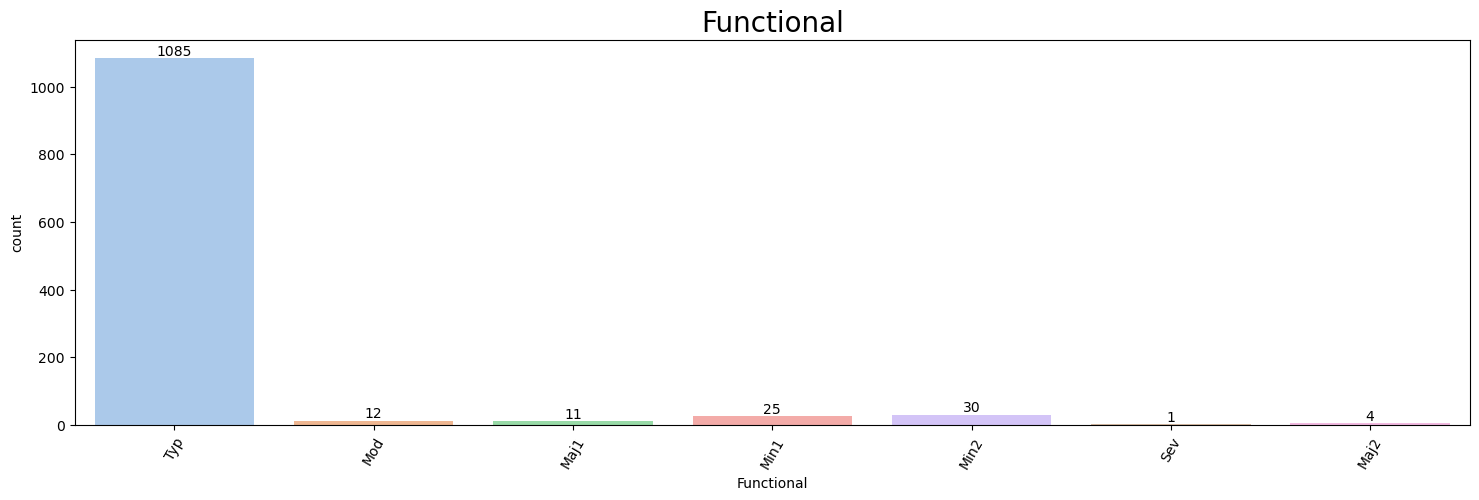

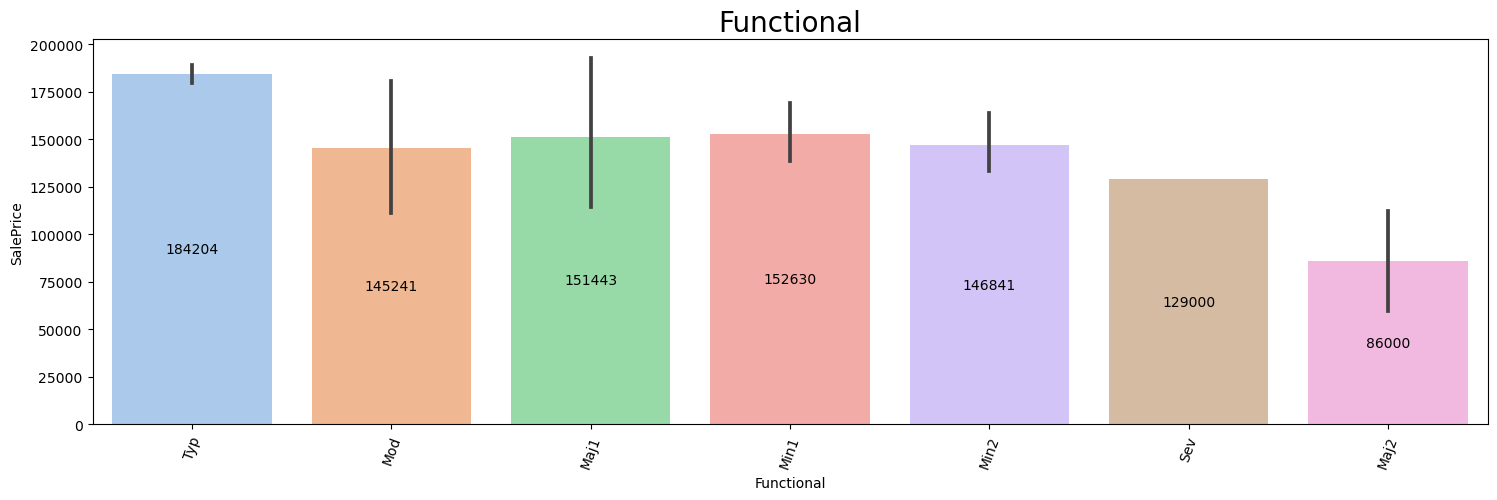

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


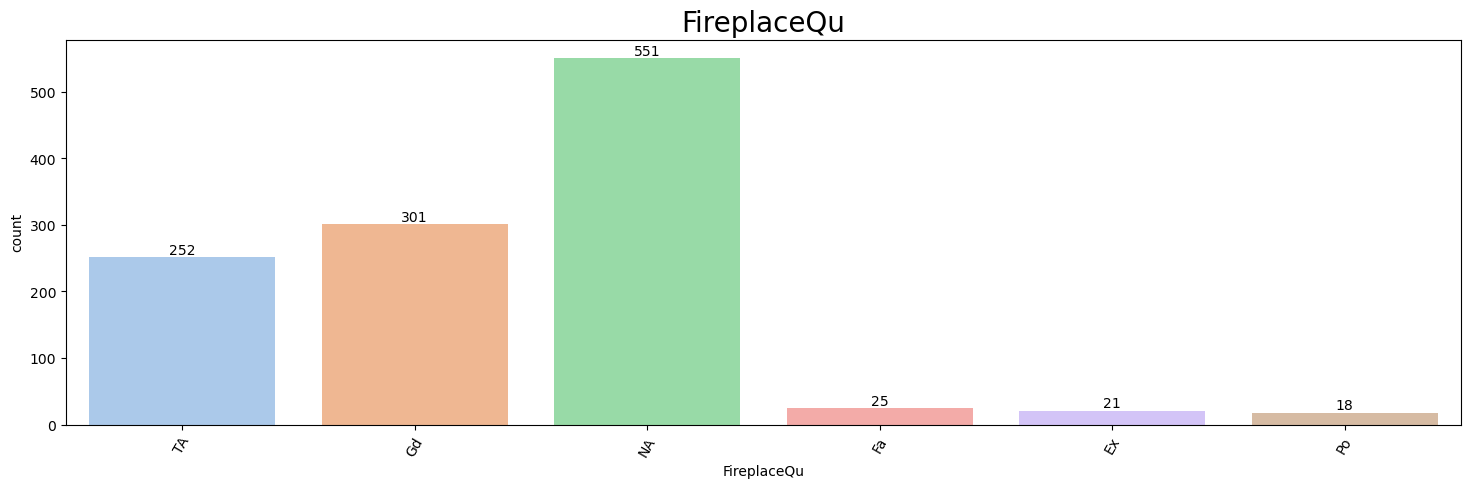

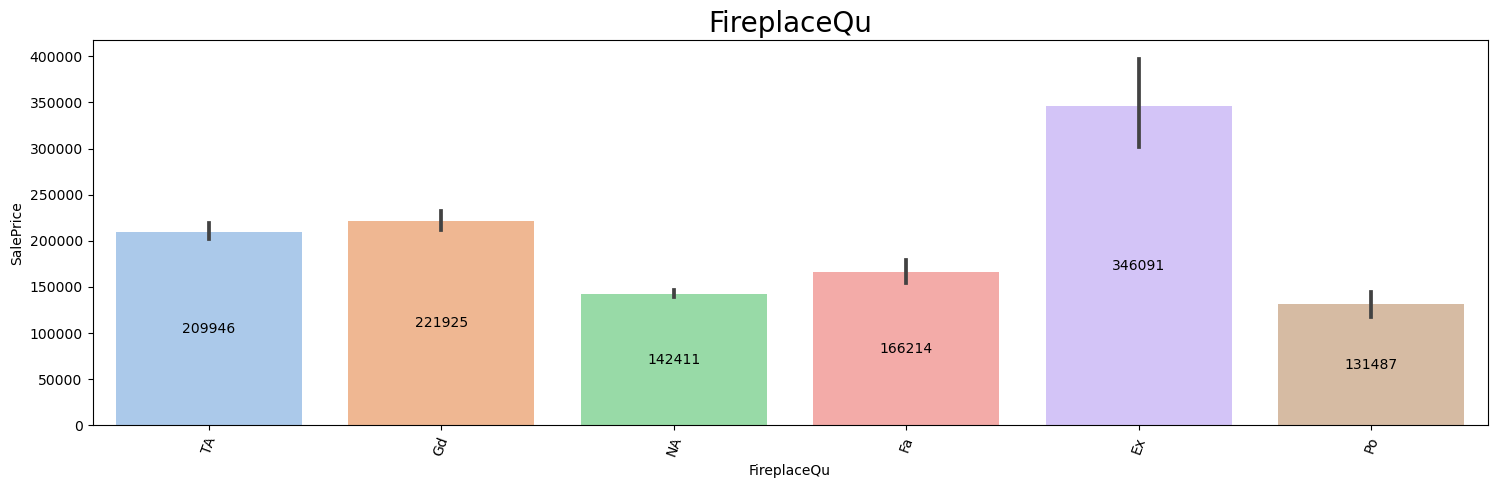

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


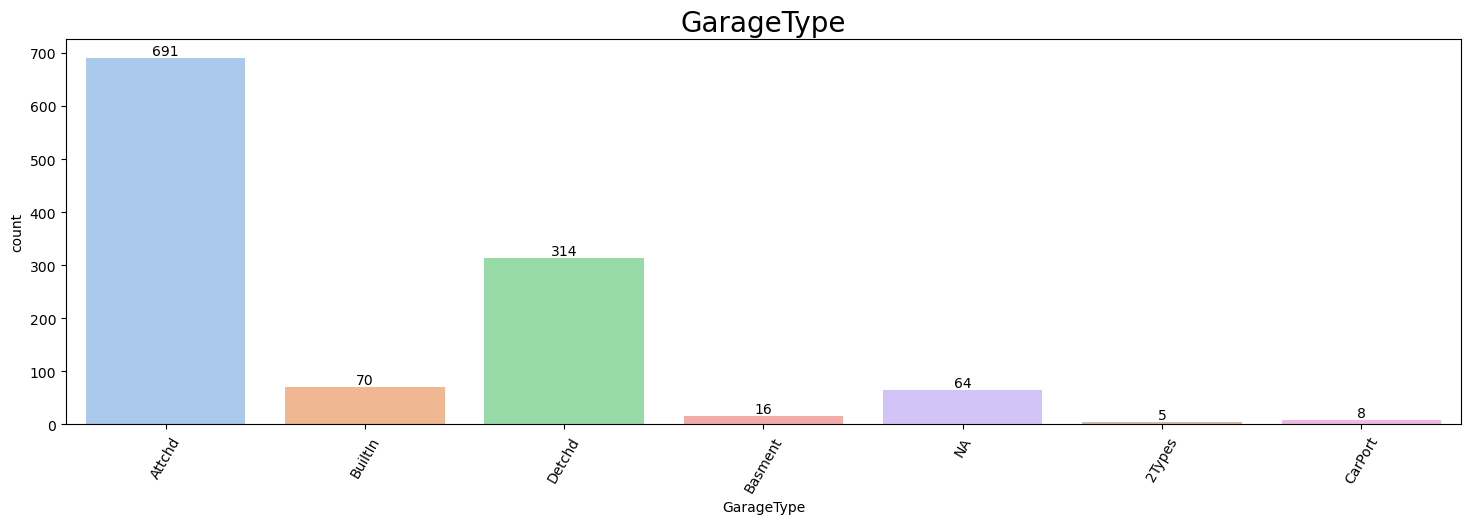

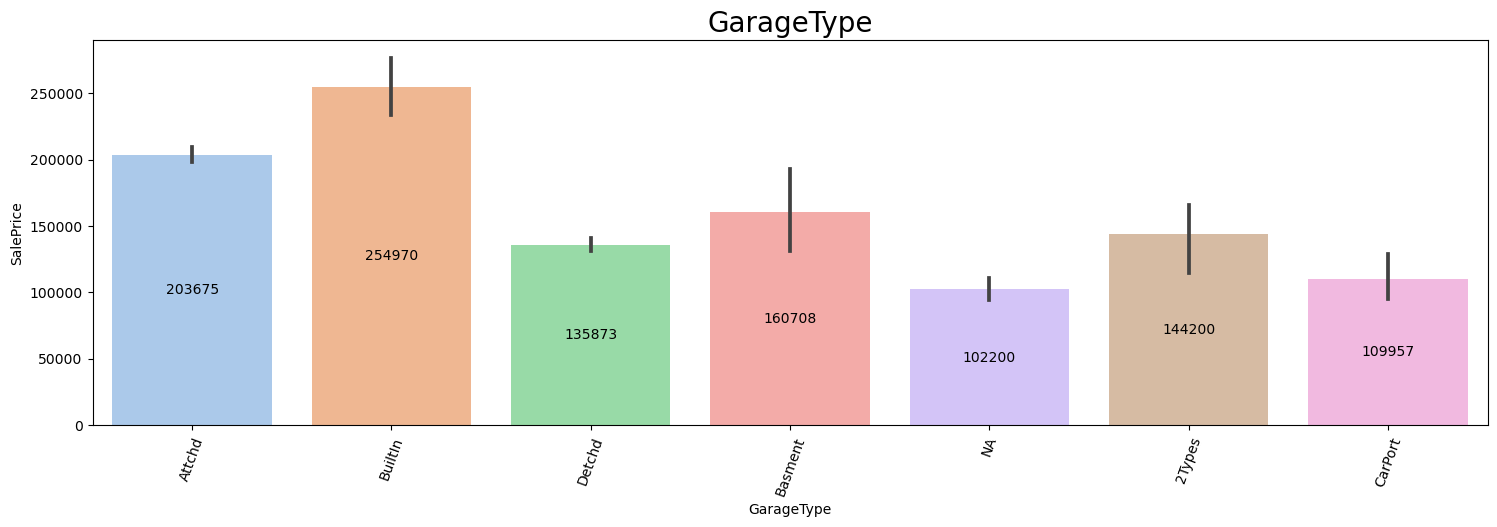

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


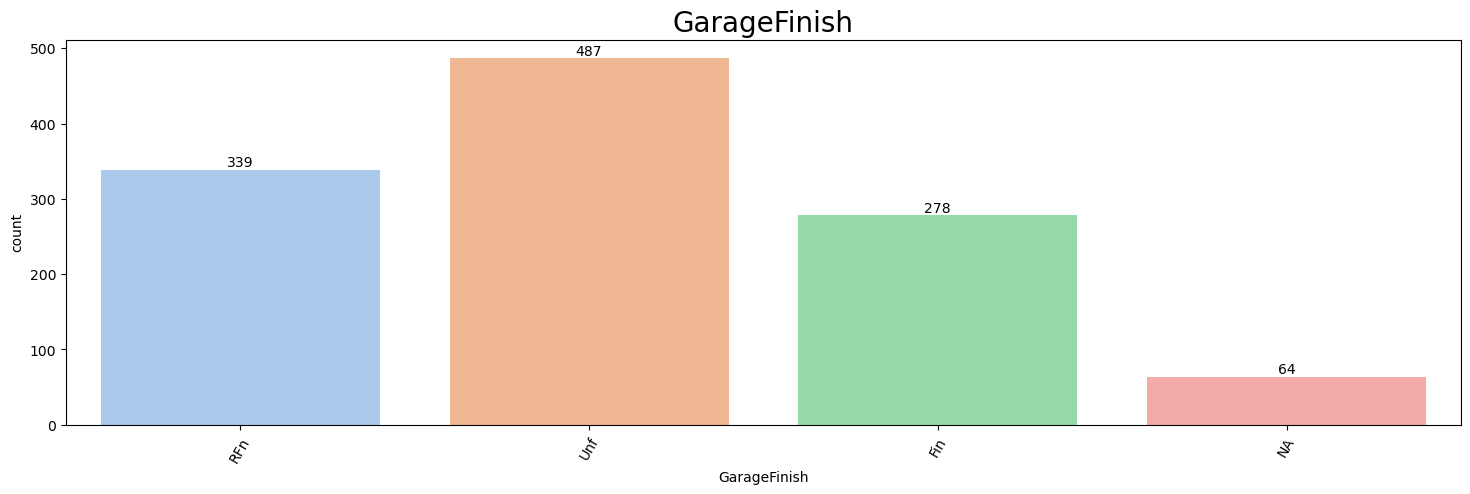

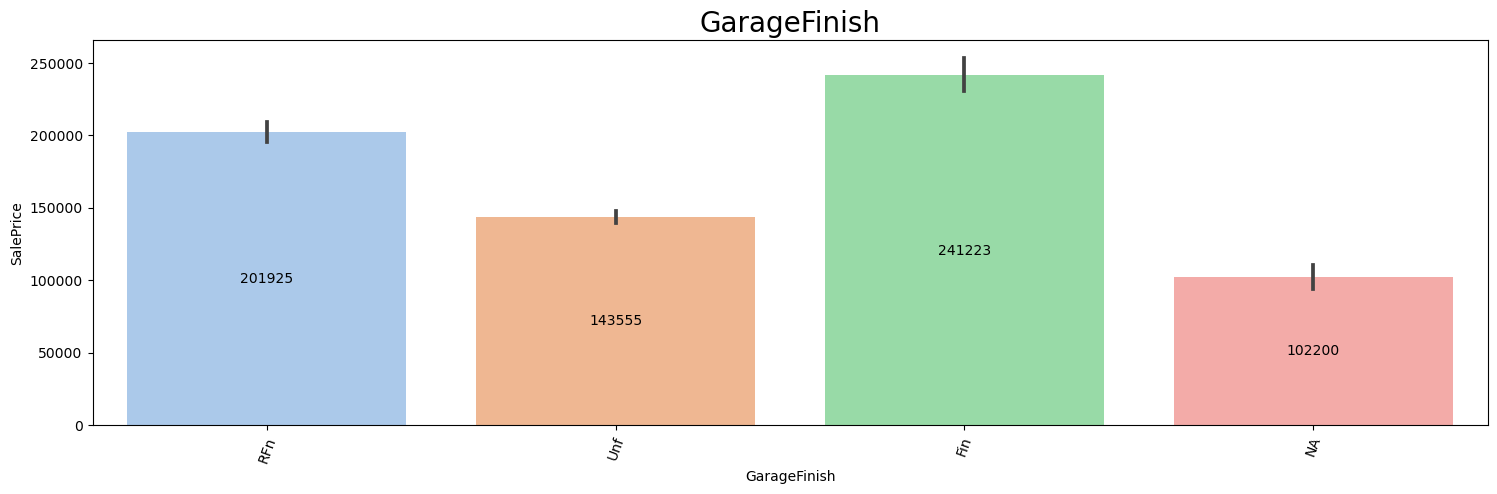

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


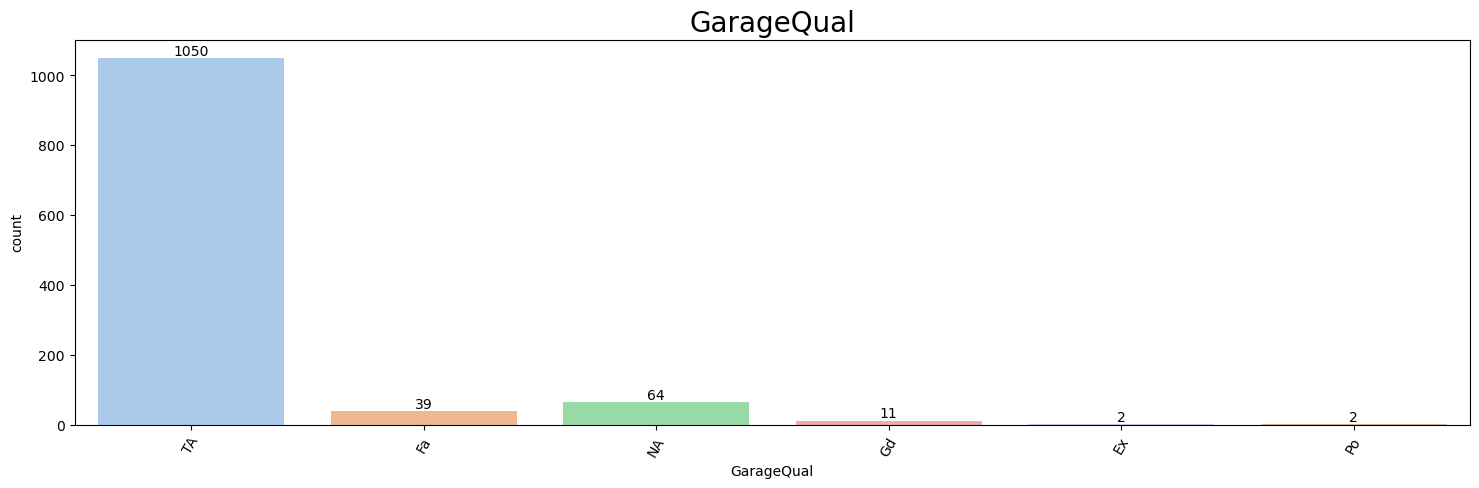

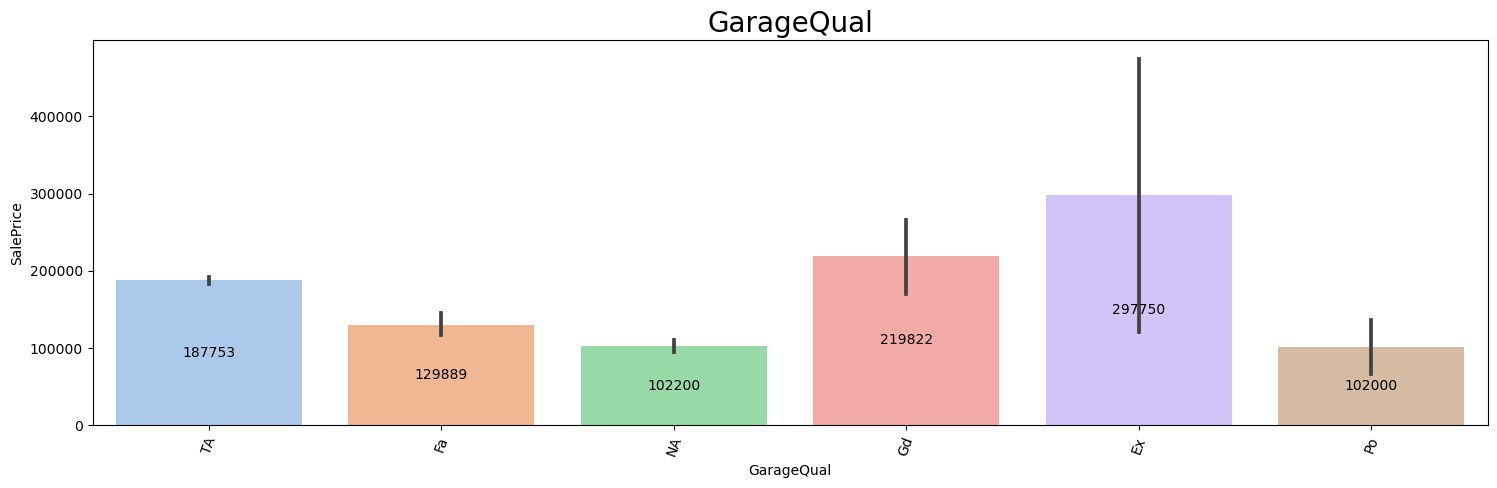

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


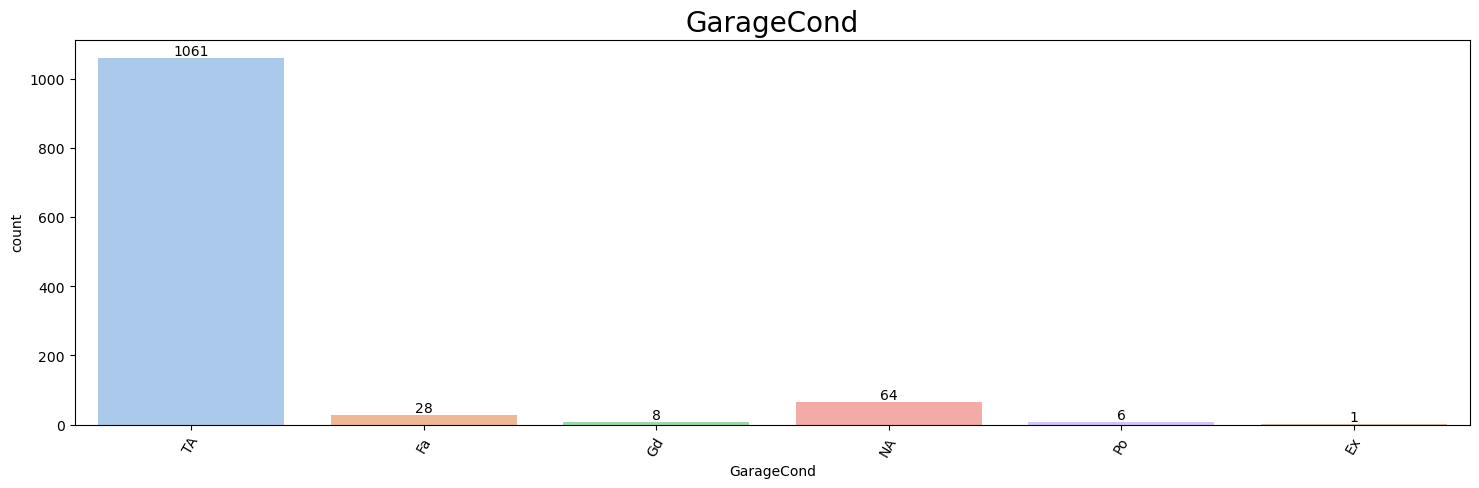

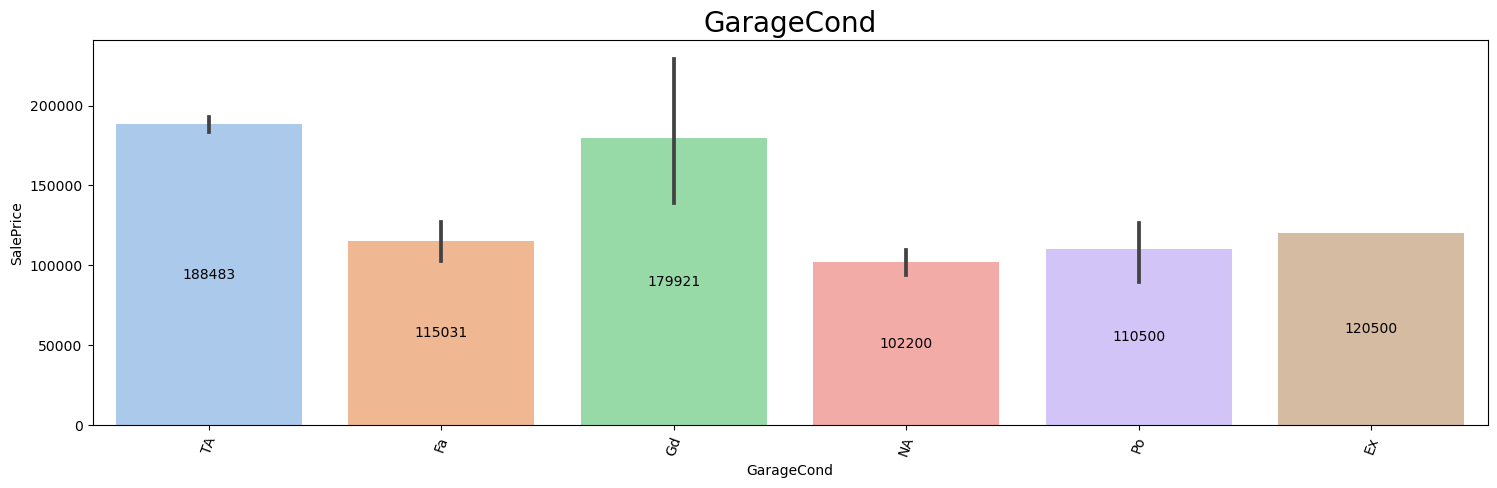

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


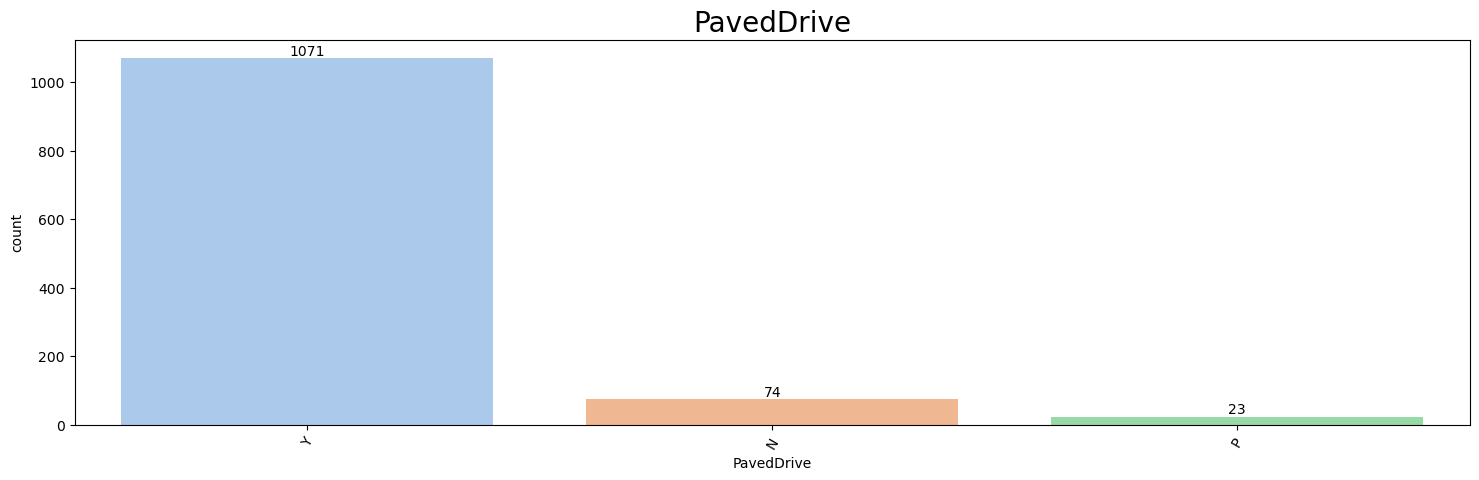

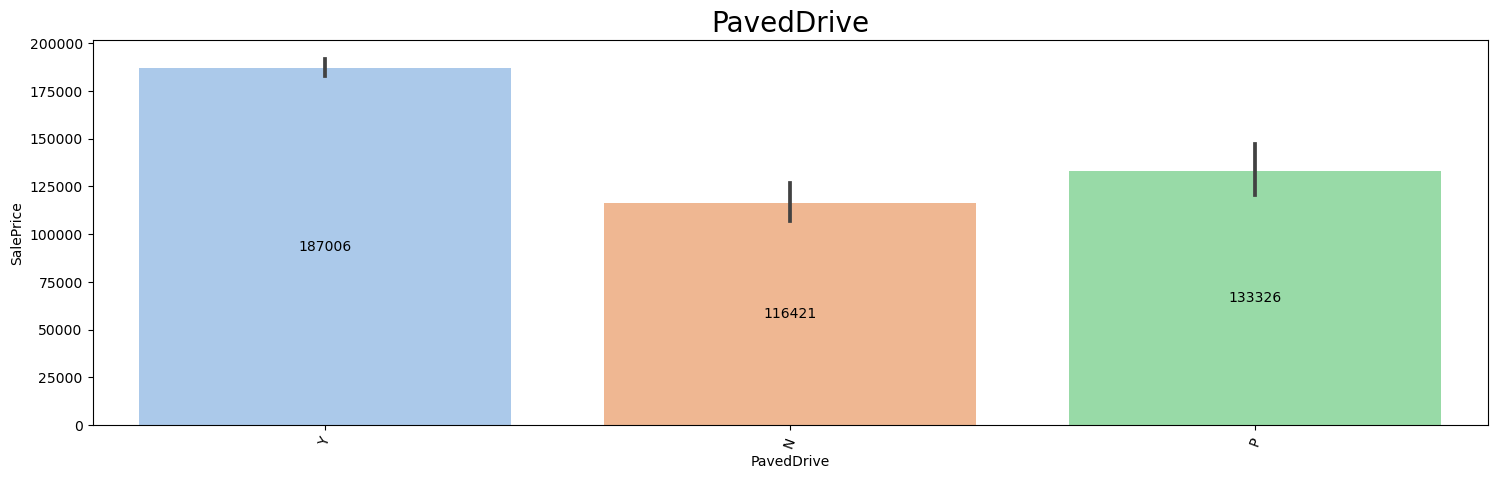

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


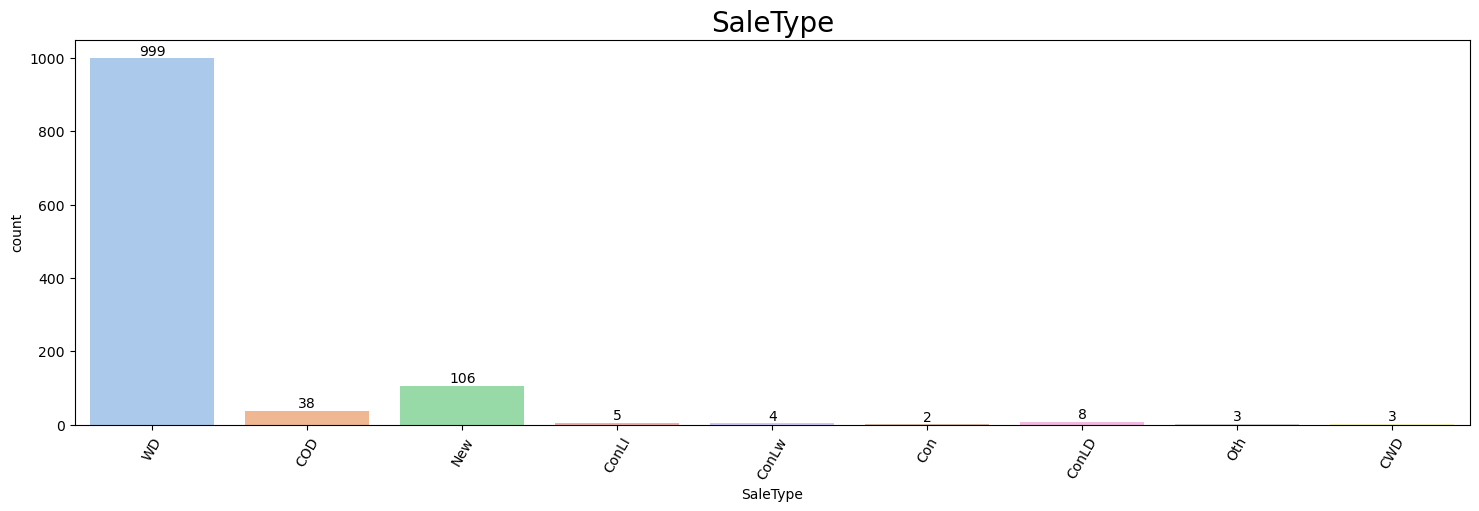

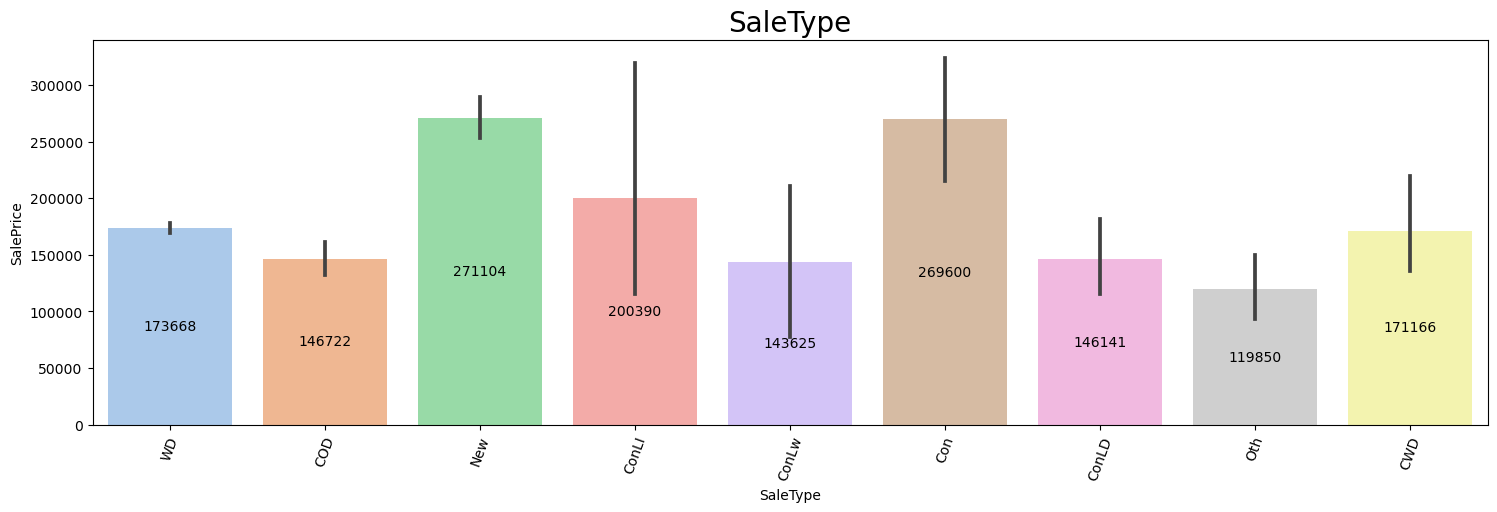

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


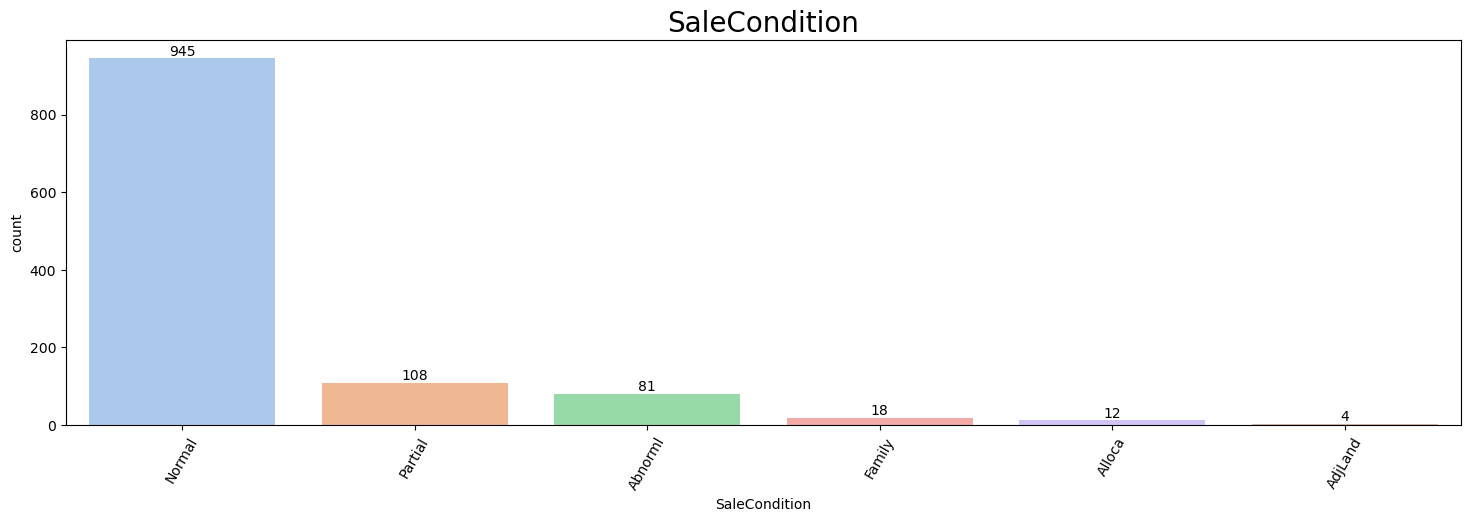

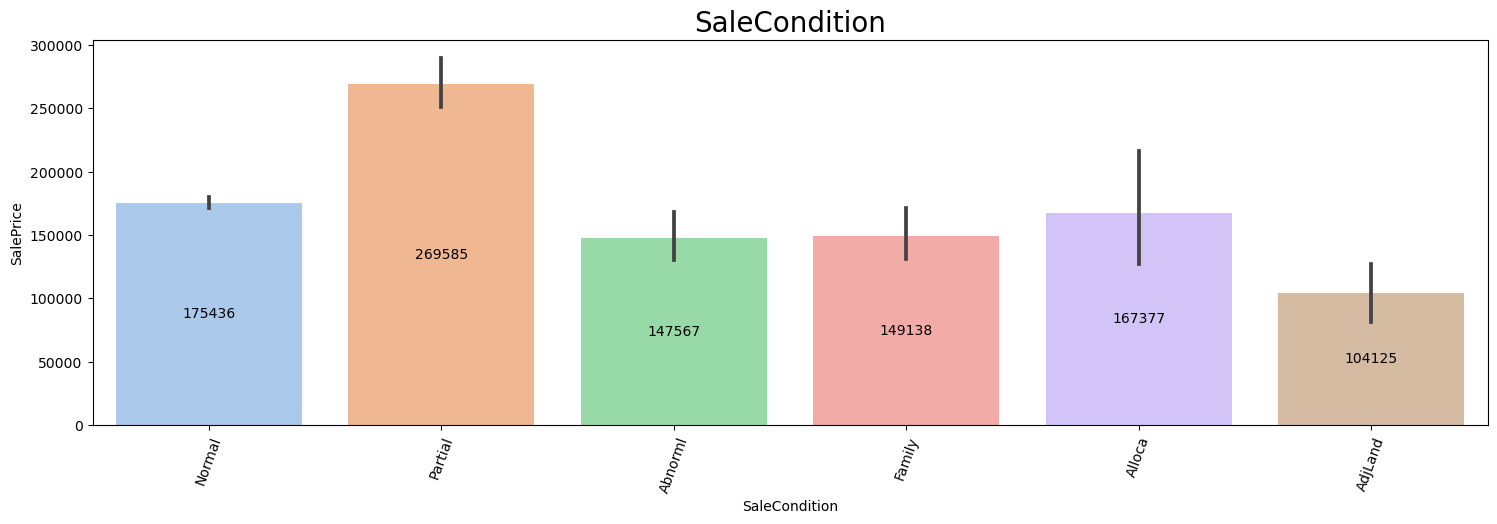

In [44]:
# plotting for categorical columns
for feature in cat_features:
    # plotting count plots for each category
    plt.figure(figsize=(18, 5))
    a = sns.countplot(feature, data = train_dataset[cat_features], palette='pastel')
    plt.title(feature, fontsize=20)
    for c in a.containers:
        labels = [f'{int((v.get_height()))}' for v in c]
        a.bar_label(c, labels=labels, label_type='edge')
    plt.xticks(rotation = 60)
    plt.show()
    
    # plotting barplot for each category
    plt.figure(figsize=(18, 5))
    a = sns.barplot(x = feature, y = 'SalePrice', data = train_dataset, palette='pastel')
    plt.title(feature, fontsize=20)
    for c in a.containers:
        labels = [f'{int((v.get_height()))}' for v in c]
        a.bar_label(c, labels=labels, label_type='center')
    plt.xticks(rotation = 70)
    plt.show()

The above plot shows the count of different categories in a particular column and the mean SalePrice for each category.
For example, RL is the most common MSZoning for all the houses we have in the data. But mean SalePrice for MSZoning FV is highest.

## Correlation

C:\Users\katiy\AppData\Local\Temp/ipykernel_5804/2360348047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr(), annot = True, linewidths = 0.1, linecolor = 'black', fmt = '0.2f', cmap = 'rainbow')


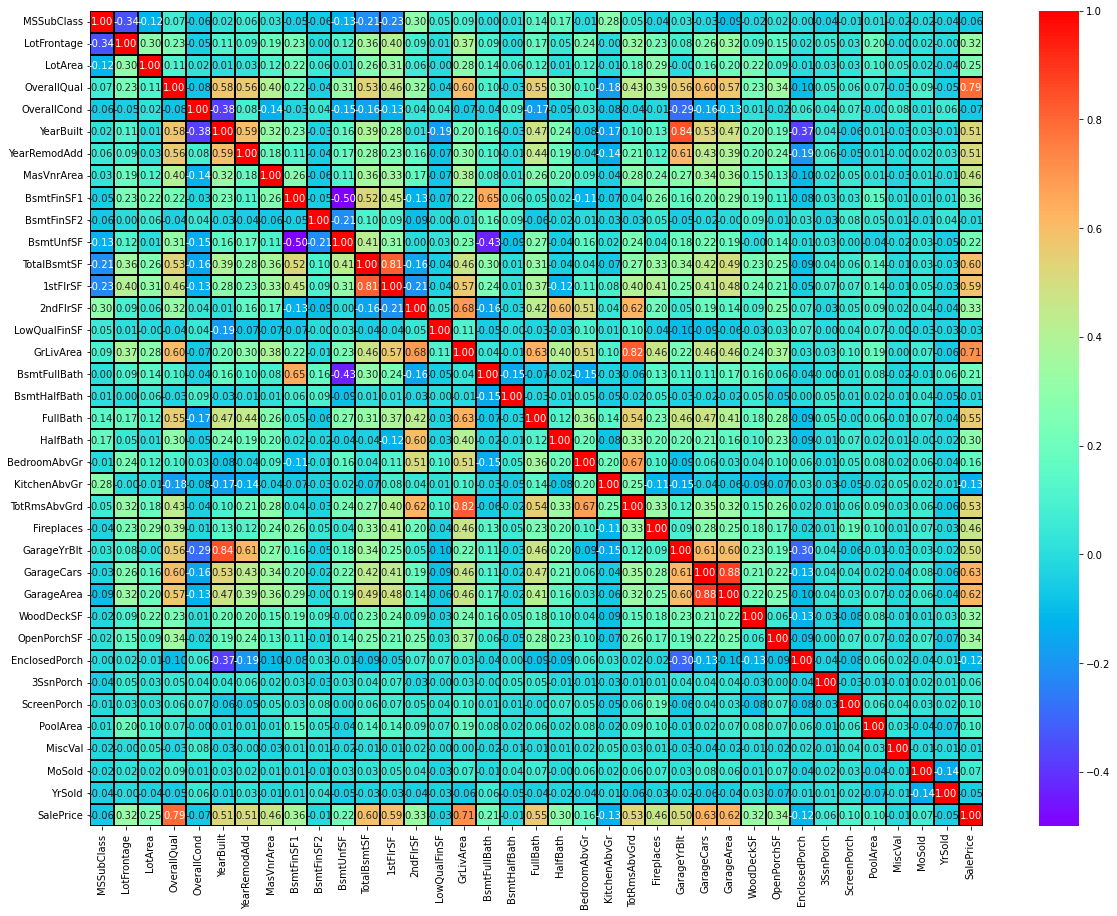

In [44]:
# plotting the correlation heatmap
plt.figure(figsize=(20,15))
sns.heatmap(train_dataset.corr(), annot = True, linewidths = 0.1, linecolor = 'black', fmt = '0.2f', cmap = 'rainbow')
plt.show()

From the correlation heatmap we can see that 'SalePrice' has strong correlation with 'OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea'.

We can verify this by:

In [45]:
# checking the correlation with the target variable and excluding the target variable
train_dataset.corr()['SalePrice'].sort_values(ascending = False)[1:]

C:\Users\katiy\AppData\Local\Temp/ipykernel_5804/80820801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()['SalePrice'].sort_values(ascending = False)[1:]


OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.497402
MasVnrArea       0.460535
Fireplaces       0.459611
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

C:\Users\katiy\AppData\Local\Temp/ipykernel_5804/3784803646.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar', color = 'c')


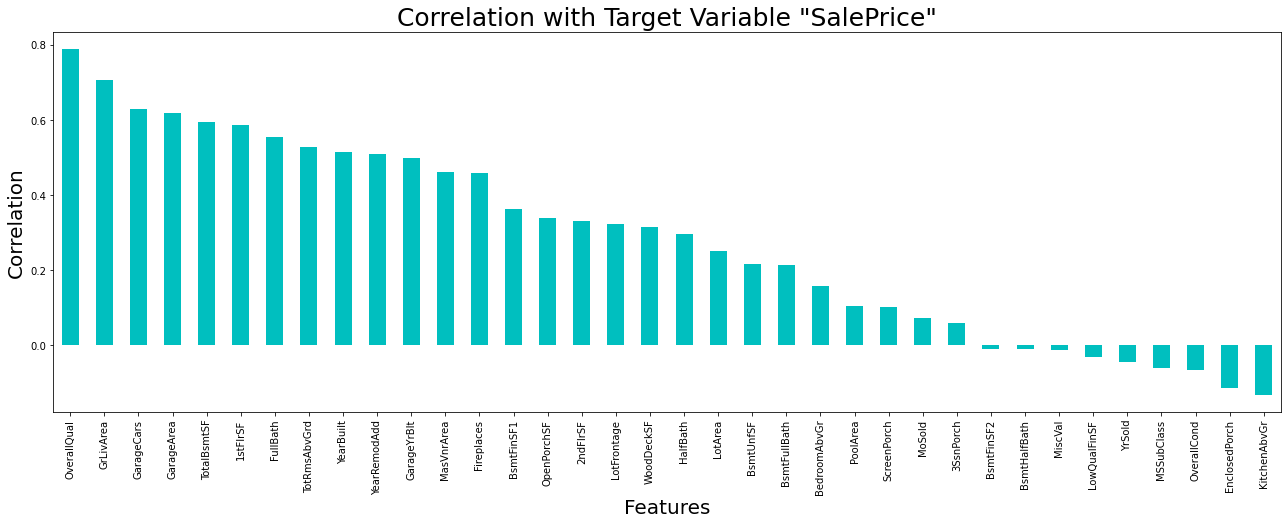

In [46]:
# visualizing the correlations using bar plot
plt.figure(figsize=(22,7))
train_dataset.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar', color = 'c')
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Correlation', fontsize = 20)
plt.title('Correlation with Target Variable "SalePrice"',fontsize=25)
plt.show()

Columns "OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt" have high correlation with the target variable.

## Outliers

In [47]:
# creating the dataframe for numerical features
num_df = train_dataset[num_features]

C:\Users\katiy\AppData\Local\Temp/ipykernel_5804/811017413.py:18: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.20, wspace=1.25)


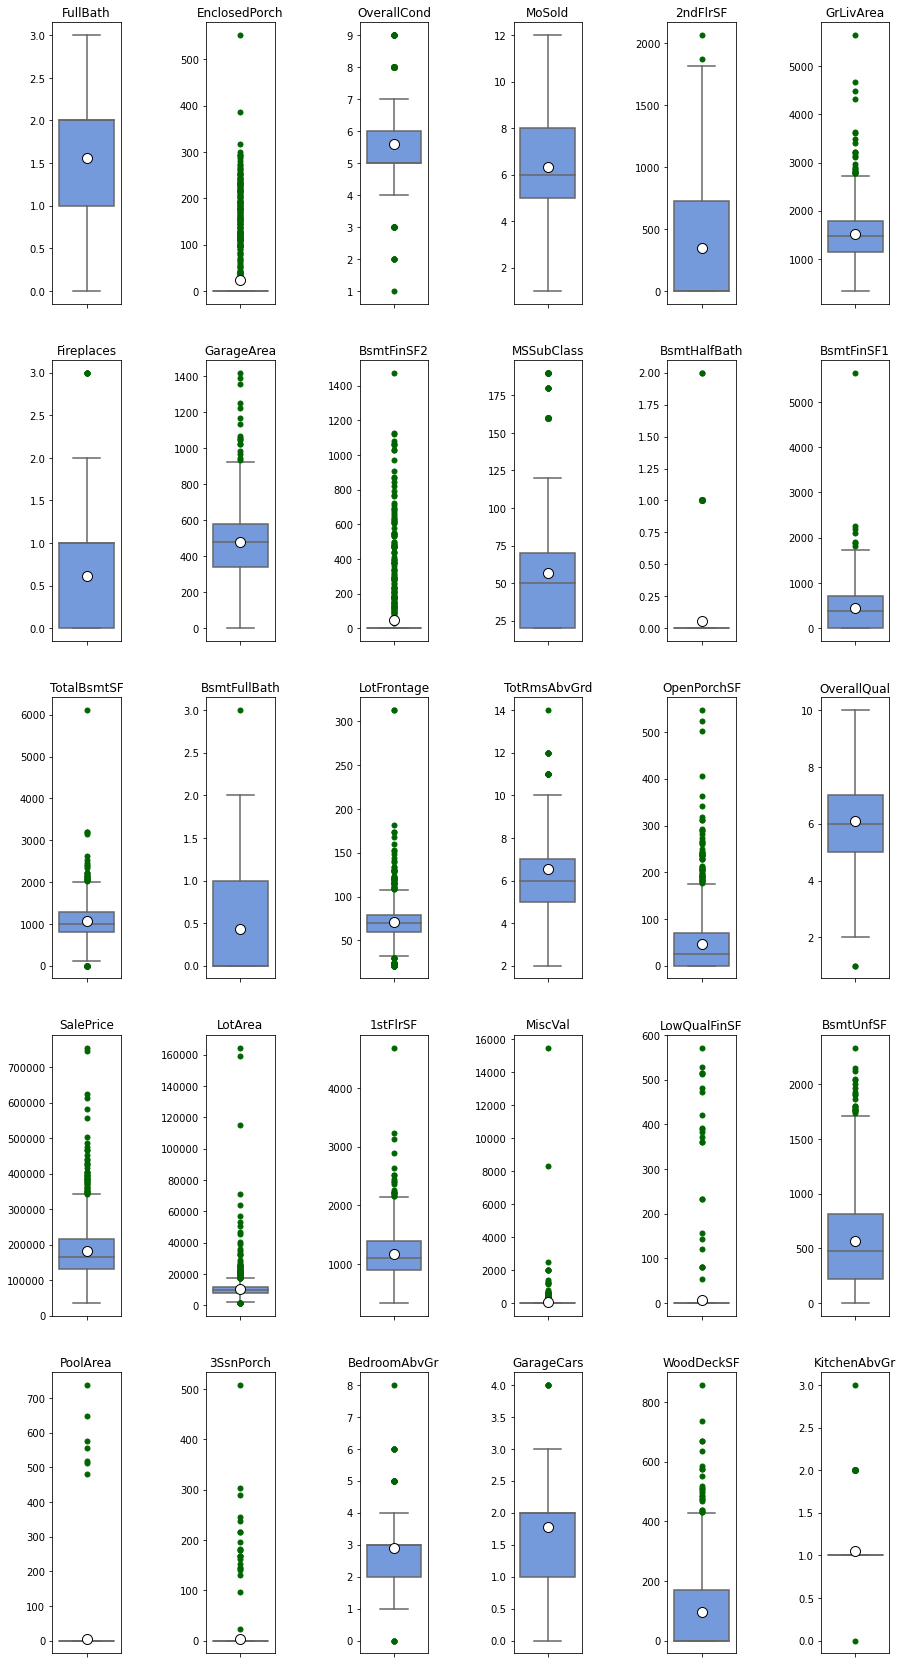

In [48]:
# checking the outliers in the data
ncols = 6
nrows = len(num_df.columns) // ncols

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True, figsize=(15,30))
for col, ax in zip(num_df.columns, axs.T.ravel()):
    sns.boxplot(y=num_df[col], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(col)
    ax.set_ylabel('')
plt.subplots_adjust(hspace=0.20, wspace=1.25)
plt.show()

## Skewness

In [49]:
# importing the necessary library
from scipy import stats as stats
from scipy.stats import skew

# checking the skewness in the data
skewness = pd.DataFrame(train_dataset[num_cols].skew(),columns=['skewness'])

#### Keeping the range of (0.5, -0.5) as optimal range for skeness range.

In [50]:
# Selecting the columns outside skewness range.
skewed_out_range = skewness[(skewness['skewness'] > 0.5) | (skewness['skewness'] < -0.5)]

In [51]:
# checking the skewed data
skewed_out_range

skewness
Fireplaces      0.671966
TotalBsmtSF     1.744591
PoolArea       13.243711
EnclosedPorch   3.043610
BsmtFullBath    0.627106
LotArea        10.659285
3SsnPorch       9.770611
OverallCond     0.580714
BsmtFinSF2      4.365829
LotFrontage     2.733440
1stFlrSF        1.513707
MSSubClass      1.422019
TotRmsAbvGrd    0.644657
MiscVal        23.065943
2ndFlrSF        0.823479
BsmtHalfBath    4.264403
OpenPorchSF     2.410840
LowQualFinSF    8.666142
WoodDeckSF      1.504929
GrLivArea       1.449952
BsmtFinSF1      1.871606
BsmtUnfSF       0.909057
KitchenAbvGr    4.365259
ScreenPorch     4.105741
MasVnrArea      2.835718
HalfBath        0.656492

There are lot of columns with the high degree of skewness. Therefore, applying Box-Cox transformation to removed skewness.

Columns - "BsmtHalfBath, KitchenAbvGr, BsmtFullBath, HalfBath, TotRmsAbvGrd, Fireplaces, MiscVal" do not need to be transformed. Therefore, dropping them.

In [52]:
# converting row indexes to columns indexes
skewed_out_range = skewed_out_range.transpose()
# checking the transposed dataframe
skewed_out_range

Fireplaces  TotalBsmtSF   PoolArea  EnclosedPorch  BsmtFullBath  \
skewness    0.671966     1.744591  13.243711        3.04361      0.627106   

            LotArea  3SsnPorch  OverallCond  BsmtFinSF2  LotFrontage  \
skewness  10.659285   9.770611     0.580714    4.365829      2.73344   

          1stFlrSF  MSSubClass  TotRmsAbvGrd    MiscVal  2ndFlrSF  \
skewness  1.513707    1.422019      0.644657  23.065943  0.823479   

          BsmtHalfBath  OpenPorchSF  LowQualFinSF  WoodDeckSF  GrLivArea  \
skewness      4.264403      2.41084      8.666142    1.504929   1.449952   

          BsmtFinSF1  BsmtUnfSF  KitchenAbvGr  ScreenPorch  MasVnrArea  \
skewness    1.871606   0.909057      4.365259     4.105741    2.835718   

          HalfBath  
skewness  0.656492

In [53]:
# dropping the columns which are not required to be transformed
skewed_out_range.drop(["BsmtHalfBath", "KitchenAbvGr", "BsmtFullBath", "HalfBath", "TotRmsAbvGrd", "Fireplaces", "MiscVal"], axis = 1, inplace = True)
skewed_out_range

TotalBsmtSF   PoolArea  EnclosedPorch    LotArea  3SsnPorch  \
skewness     1.744591  13.243711        3.04361  10.659285   9.770611   

          OverallCond  BsmtFinSF2  LotFrontage  1stFlrSF  MSSubClass  \
skewness     0.580714    4.365829      2.73344  1.513707    1.422019   

          2ndFlrSF  OpenPorchSF  LowQualFinSF  WoodDeckSF  GrLivArea  \
skewness  0.823479      2.41084      8.666142    1.504929   1.449952   

          BsmtFinSF1  BsmtUnfSF  ScreenPorch  MasVnrArea  
skewness    1.871606   0.909057     4.105741    2.835718

In [118]:
skewed_columns = list(skewed_out_range.columns)

In [121]:
# removing the skewness using yeo-johnson
for col in skewed_columns:
    
    train_dataset['{}'.format(col)] = stats.yeojohnson(train_dataset['{}'.format(col)])[0]

In [122]:
# checking the skewness in the columns
skewness = pd.DataFrame(train_dataset[skewed_columns].skew(),columns=['skewness'])

In [123]:
skewness

skewness
TotalBsmtSF     0.286779
PoolArea       12.817372
EnclosedPorch   2.022616
LotArea         0.032509
3SsnPorch       7.087955
OverallCond     0.048063
BsmtFinSF2      2.394737
LotFrontage     0.155904
1stFlrSF       -0.002391
MSSubClass      0.064007
2ndFlrSF        0.280208
OpenPorchSF    -0.002749
LowQualFinSF    6.922843
WoodDeckSF      0.113026
GrLivArea      -0.000054
BsmtFinSF1     -0.404528
BsmtUnfSF      -0.284390
ScreenPorch     3.067153
MasVnrArea      0.439526

Skewness for all columns except "PoolArea, EnclosedPorch, 3SsnPorch, BsmtFinSF2, LowQualFinSF, ScreenPorch" has been removed.

## Model Building

### Separating the columns into features and target:

In [58]:
# importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [59]:
# Let's split our dataset into independent (X) and dependent (y) variables
X = train_dataset.drop('SalePrice', axis = 1)
y = train_dataset.SalePrice

In [60]:
# checking the shape of train and test data
X.shape,test_dataset.shape

((1168, 75), (292, 75))

In [61]:
# joining the train and test dataset for encoding
train_test_df = pd.concat([X,test_dataset],axis=0)

In [62]:
# checking the shape of concatenated dataset
train_test_df.shape

(1460, 75)

In [63]:
# importing the encoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [64]:
# encoding the categorical columns
for i in train_test_df.columns:
    if train_test_df[i].dtypes == 'object':
        train_test_df[i]= enc.fit_transform(train_test_df[i].values.reshape(-1,1))

In [65]:
# checking the shape after encoding
train_test_df.shape

(1460, 75)

In [66]:
# separating the train data from test data
X = train_test_df.iloc[:1168,:]
X

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120       3.0         70.0     4928     1.0       0.0   
1             20       3.0         95.0    15865     1.0       0.0   
2             60       3.0         92.0     9920     1.0       0.0   
3             20       3.0        105.0    11751     1.0       0.0   
4             20       3.0         70.0    16635     1.0       0.0   
...          ...       ...          ...      ...     ...       ...   
1163          20       3.0         70.0     9819     1.0       0.0   
1164          20       3.0         67.0     8777     1.0       3.0   
1165         160       3.0         24.0     2280     1.0       3.0   
1166          70       0.0         50.0     8500     1.0       3.0   
1167          60       3.0         70.0     7861     1.0       0.0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0             3.0        0.0        4.0        0.0          13.0         2.0   
1             3.0        0.0        4.0        1.0          12.0         2.0   
2             3.0        0.0        1.0        0.0          15.0         2.0   
3             3.0        0.0        4.0        0.0          14.0         2.0   
4             3.0        0.0        2.0        0.0          14.0         2.0   
...           ...        ...        ...        ...           ...         ...   
1163          3.0        0.0        4.0        0.0          19.0         2.0   
1164          3.0        0.0        4.0        0.0           7.0         1.0   
1165          3.0        0.0        2.0        0.0          13.0         2.0   
1166          3.0        0.0        4.0        0.0           9.0         1.0   
1167          3.0        0.0        4.0        0.0           8.0         2.0   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0            2.0       4.0         2.0            6            5       1976   
1            2.0       0.0         2.0            8            6       1970   
2            2.0       0.0         5.0            7            5       1996   
3            2.0       0.0         2.0            6            6       1977   
4            2.0       0.0         2.0            6            7       1977   
...          ...       ...         ...          ...          ...        ...   
1163         2.0       0.0         2.0            5            5       1967   
1164         2.0       0.0         2.0            4            5       1949   
1165         2.0       3.0         5.0            6            6       1976   
1166         2.0       0.0         5.0            4            4       1920   
1167         2.0       0.0         5.0            6            5       2002   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             1976        1.0       1.0          9.0         10.0         2.0   
1             1970        0.0       5.0         13.0         14.0         2.0   
2             1997        1.0       1.0          8.0          8.0         2.0   
3             1977        3.0       1.0          9.0         10.0         1.0   
4             2000        1.0       1.0          5.0          5.0         3.0   
...            ...        ...       ...          ...          ...         ...   
1163          1967        1.0       1.0          8.0          8.0         1.0   
1164          2003        1.0       1.0         12.0         13.0         2.0   
1165          1976        1.0       1.0          9.0          2.0         2.0   
1166          1950        2.0       1.0          3.0          3.0         2.0   
1167          2003        1.0       1.0         12.0         13.0         2.0   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0            0.0        3.0        4.0         1.0       2.0       4.0   
1            0.0        2.0        2.0         2.0       4.0       1.0   
2            0.0        2.0        4.0         2.0       2.0

In [67]:
# separating the test data from train data
test_dataset=train_test_df.iloc[1168:,:]
test_dataset

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            20       3.0         86.0    14157     1.0       0.0   
1           120       3.0         70.0     5814     1.0       0.0   
2            20       3.0         70.0    11838     1.0       3.0   
3            70       3.0         75.0    12000     1.0       3.0   
4            60       3.0         86.0    14598     1.0       0.0   
..          ...       ...          ...      ...     ...       ...   
287          20       3.0         78.0    10206     1.0       3.0   
288          20       3.0         57.0     9245     1.0       1.0   
289          20       3.0         70.0    11241     1.0       0.0   
290          50       4.0         50.0     5000     1.0       3.0   
291         160       4.0         21.0     1953     1.0       3.0   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1.0        0.0        0.0        0.0          22.0         2.0   
1            3.0        0.0        1.0        0.0          22.0         2.0   
2            3.0        0.0        4.0        0.0           5.0         2.0   
3            0.0        0.0        4.0        0.0           6.0         2.0   
4            3.0        0.0        1.0        0.0          21.0         1.0   
..           ...        ...        ...        ...           ...         ...   
287          3.0        0.0        4.0        0.0          21.0         2.0   
288          3.0        0.0        4.0        0.0           5.0         2.0   
289          3.0        0.0        1.0        0.0          12.0         2.0   
290          3.0        0.0        0.0        0.0           3.0         1.0   
291          3.0        0.0        4.0        0.0           2.0         2.0   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2.0       0.0         2.0            9            5       2005   
1           2.0       4.0         2.0            8            5       1984   
2           2.0       0.0         2.0            8            5       2001   
3           2.0       0.0         5.0            7            7       1941   
4           2.0       0.0         5.0            6            5       2007   
..          ...       ...         ...          ...          ...        ...   
287         2.0       0.0         2.0            8            5       2007   
288         2.0       0.0         2.0            5            5       1994   
289         2.0       0.0         2.0            6            7       1970   
290         2.0       0.0         0.0            6            7       1947   
291         2.0       3.0         5.0            6            5       1973   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            2006        3.0       1.0         12.0         13.0         3.0   
1            1984        1.0       1.0          6.0          6.0         2.0   
2            2001        3.0       1.0         12.0         13.0         2.0   
3            1950        1.0       1.0          8.0          8.0         2.0   
4            2007        1.0       1.0         12.0         13.0         3.0   
..            ...        ...       ...          ...          ...         ...   
287          2007        1.0       1.0         12.0         13.0         3.0   
288          1995        1.0       1.0         12.0         13.0         2.0   
289          1970        1.0       1.0         13.0         14.0         1.0   
290          1950        1.0       1.0          5.0          5.0         2.0   
291          1973        1.0       1.0          6.0          6.0         1.0   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0        2.0        4.0         2.0       0.0       4.0   
1           0.0        2.0        4.0         1.0       2.0       4.0   
2           0.0        2.0        4.0         2.0       2.0       4.0   
3           0.0        3.0        4.0

In [68]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [69]:
X

array([[0.58823529, 0.75      , 0.16780822, ..., 0.25      , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.25342466, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.24315068, ..., 0.25      , 1.        ,
        0.8       ],
       ...,
       [0.82352941, 0.75      , 0.01027397, ..., 0.75      , 1.        ,
        0.8       ],
       [0.29411765, 0.        , 0.09931507, ..., 0.5       , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.16780822, ..., 0.        , 1.        ,
        0.8       ]])

### Feature Seleciton

In [70]:
# importing the necessary library
from sklearn.decomposition import PCA

In [71]:
# feature selection using principal component analysis
pca = PCA()
pca.fit_transform(X)

array([[-6.59004103e-02,  6.09358130e-01, -4.12382775e-01, ...,
         7.83474547e-15,  7.59488760e-17,  3.19276974e-16],
       [ 3.45869832e-01,  6.30881207e-01, -3.68915461e-02, ...,
         5.07076029e-16, -5.74682826e-17,  1.56205964e-17],
       [ 7.86577259e-01,  7.79734437e-01,  1.08959994e-01, ...,
        -1.24580083e-16,  2.84686831e-17, -3.54309815e-17],
       ...,
       [-3.35455213e-01,  3.02740818e-01, -6.91284163e-01, ...,
         7.87631107e-17,  4.10338529e-18,  1.49609977e-17],
       [-1.61383287e+00, -3.80203253e-01,  2.78934442e-01, ...,
         6.76392226e-17, -6.65642559e-17,  1.10163008e-17],
       [ 9.93462133e-01,  1.03287426e-01,  2.14156492e-01, ...,
         1.00598027e-16,  2.45573853e-17,  5.52300823e-18]])

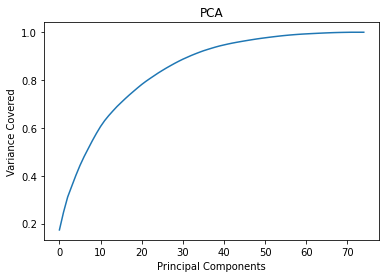

In [72]:
# Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Around 65 Principal Components are able to explain > 95 % variance. Its safe to consider starting 65 PC's

In [73]:
# selecting 65 features based on above analysis
pca = PCA (n_components=65)
new_pcomp = pca.fit_transform(X)
princi_comp = pd.DataFrame(new_pcomp)
princi_comp

0         1         2         3         4         5         6   \
0    -0.065900  0.609358 -0.412383  0.541731 -0.143475 -0.483724  0.293704   
1     0.345870  0.630881 -0.036892 -0.473486  0.577953 -0.357402 -0.230109   
2     0.786577  0.779734  0.108960  0.191822  0.057981  0.311033 -0.260273   
3     0.317685  0.426539  0.085049 -0.467158 -0.253517 -0.588832  0.480937   
4     0.566219  0.774917  0.061174 -0.114518 -0.167486 -0.161163  0.576878   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.818522  0.751258 -0.050903 -0.142042 -0.126729 -0.568840  0.547932   
1164  0.002474 -0.711128  0.092143 -0.286016  0.491814  0.109967  0.555244   
1165 -0.335455  0.302741 -0.691284  0.786902 -0.869097  0.340813  0.111536   
1166 -1.613833 -0.380203  0.278934  0.729185  0.253893 -0.015122  0.017333   
1167  0.993462  0.103287  0.214156  0.183947  0.008025 -0.532506  0.207720   

            7         8         9         10        11        12        13  \
0     0.800322  0.041465  0.142403 -0.050338 -0.526827  0.299441  0.034746   
1    -0.111681 -0.581076  0.052127  0.396754  0.021358  0.352995 -0.476834   
2    -0.043473 -0.656276 -0.192424  0.035989  0.442795  0.122544 -0.155267   
3     0.028752  0.186078 -0.189953 -0.021252  0.185753  0.522481 -0.208545   
4    -0.067962  0.601669  0.204119  0.152368  0.070850 -0.198104 -0.121391   
...        ...       ...       ...       ...       ...       ...       ...   
1163  0.104804  0.115325 -0.466715  0.080726 -0.130538 -0.261850 -0.135807   
1164 -0.392184  0.159365  0.067946 -0.315169 -0.251396 -0.307257 -0.508143   
1165  0.201356 -0.019528 -0.225381  0.100821 -0.117652  0.286390  0.094933   
1166 -0.267938  0.351778 -0.153606  0.263111  0.465062 -0.189090 -0.457699   
1167 -0.186217 -0.231259  0.576164 -0.113278 -0.232228 -0.072771  0.071769   

            14        15        16        17        18        19        20  \
0     0.049658 -0.459598  0.052181  0.003495 -0.094394  0.374938 -0.103418   
1     0.604720  0.115441  0.144865 -0.165421  0.182890  0.178647  0.174709   
2    -0.212242 -0.130193  0.110935  0.108771 -0.132712  0.133941 -0.072202   
3    -0.117540 -0.188868  0.102887 -0.065438  0.526263  0.409331 -0.274180   
4     0.087406  0.015564  0.009409  0.179063 -0.206411  0.267498 -0.046494   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.287427 -0.281501 -0.061696 -0.033272  0.174926  0.099750 -0.030748   
1164  0.190625 -0.001161  0.088658  0.060495 -0.141956 -0.057033  0.031882   
1165  0.095701  0.065123 -0.029797  0.077878 -0.262597  0.238918 -0.017182   
1166 -0.114498 -0.078843  0.002659 -0.218135 -0.248206  0.223838 -0.502263   
1167 -0.137610 -0.049600 -0.189474 -0.011654 -0.044843 -0.245804 -0.025658   

            21        22        23        24        25        26        27  \
0    -0.063067  0.224220 -0.255802  0.058619 -0.121116 -0.124561 -0.057674   
1    -0.092128  0.001023  0.071034  0.208182 -0.230533 -0.387609 -0.337176   
2    -0.001517  0.227548  0.051218  0.029150 -0.241069 -0.016692 -0.061207   
3    -0.242638  0.098030 -0.061111  0.077567 -0.205614  0.300077  0.473565   
4     0.025605  0.176104 -0.401790 -0.054898 -0.160554 -0.170199 -0.026360   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.168092 -0.196909  0.079607  0.354503  0.045870  0.014302  0.031418   
1164  0.036108 -0.055055  0.231066 -0.091825 -0.235935  0.371133  0.181292   
1165 -0.060698  0.327756 -0.095937 -0.018148 -0.073646 -0.060697 -0.055706   
1166 -0.365851 -0.118485  0.362377 -0.446580  0.044885 -0.073445  0.190674   
1167 -0.143926  0.087145 -0.040895 -0.214315  0.087394 -0.032157  0.028008   

            28        29        30        31        32        33        34  \
0     0.028817  0.033301 -0.148081  0.106038 -0.167912  0.014002 -0.244239   
1     0.117164  0.171594 -0.388796 -0.013898  0.096918 -0.254342 -0.043095   
2    -0.029209 -0.018697  0.01

In [74]:
# checking which random state would be most suitable for train-test split
for i in range(0,1000):
    X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=i)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    train_score = round(r2_score(y_train,pred_train),3)
    test_score = round(r2_score(y_test,pred_test),3)
    if train_score == test_score:
        print(f"At random state {i}, the training accuracy is:-  {r2_score(y_train,pred_train)}")
        print(f"At random state {i}, the testing accuracy is:-  {r2_score(y_test,pred_test)}")
        print("\n")

At random state 133, the training accuracy is:-  0.8242218186009044
At random state 133, the testing accuracy is:-  0.824235762468682


At random state 248, the training accuracy is:-  0.827838405166033
At random state 248, the testing accuracy is:-  0.8281574303318073


At random state 301, the training accuracy is:-  0.83066857820614
At random state 301, the testing accuracy is:-  0.8306049524095043


At random state 947, the training accuracy is:-  0.8305906858746801
At random state 947, the testing accuracy is:-  0.8305420427541812


At random state 976, the training accuracy is:-  0.8270043219908405
At random state 976, the testing accuracy is:-  0.826576998808424




Selecting the random state 947 for train test split.

In [75]:
# Data split into train and test
X_train, X_test, y_train, y_test = train_test_split(princi_comp, y, test_size=0.25, random_state=301)

In [76]:
# checking the train data features variables
X_train

0         1         2         3         4         5         6   \
821  0.251792  0.147393 -0.588182  0.041070 -0.424249 -0.223979 -0.049758   
735 -0.840927  0.078231 -0.281886  0.316820 -0.119952  0.409077 -0.185115   
622  0.892126 -0.129326 -0.469814  0.387900  0.011405  0.081151 -0.280913   
340  0.807100  0.790211  0.043677  0.453721  0.487367  0.024616 -0.305657   
799 -0.128185 -0.044424 -0.749153 -0.188409  0.526730  0.335335 -0.049436   
..        ...       ...       ...       ...       ...       ...       ...   
249 -1.417706  0.359756 -0.712957  0.254493  0.886449  0.120792 -0.346054   
317  1.233362 -0.398856  0.826158  0.426877 -0.110122 -0.500156  0.002619   
235 -0.838523  0.111961 -0.461859 -0.301109 -0.369005 -0.188116  0.027116   
423  1.369992 -0.995516  0.182344  0.082730  0.026242  0.133626 -0.560801   
885  0.750108 -0.489614 -0.246068 -0.002880 -0.380260 -0.092351  0.286096   

           7         8         9         10        11        12        13  \
821 -0.364986  1.189452  0.181653  0.375565  0.066921 -0.201175  0.204134   
735  0.593228  0.129480 -0.037018  0.026472 -0.092111  0.002890 -0.319731   
622 -0.993293  0.353050 -0.154872 -0.005349 -0.079286  0.049284  0.264256   
340 -0.304033 -0.197023  0.280273 -0.560329 -0.177932 -0.018918  0.179358   
799 -0.204970 -0.845044 -0.101156 -0.017927  0.052976 -0.050499 -0.050689   
..        ...       ...       ...       ...       ...       ...       ...   
249  0.128504  0.225737  0.369216  0.407291  0.661125  0.231369 -0.235058   
317 -0.271419  0.210723 -0.074729  0.291130 -0.175980 -0.138440 -0.326052   
235  0.011520  0.101472 -0.248602  0.103431 -0.261455 -0.337337 -0.038666   
423 -0.296953  0.253060 -0.909409  0.478192  0.016803 -0.018785  0.175861   
885 -0.507203  0.068113  0.145042 -0.121129 -0.165267 -0.043494 -0.018950   

           14        15        16        17        18        19        20  \
821  0.024810  0.012763 -0.198937  0.010626 -0.057652  0.150056  0.017826   
735  0.061380 -0.301193 -0.064464  0.302295  0.084831 -0.085537  0.322442   
622  0.274756  0.051007  0.002719 -0.235530 -0.018630  0.211849  0.108827   
340  0.010723 -0.017250  0.288065  0.440852 -0.235919 -0.143555 -0.110677   
799 -0.417018 -0.140587  0.073418  0.063134  0.172241  0.111840  0.164302   
..        ...       ...       ...       ...       ...       ...       ...   
249 -0.880229  0.618919 -0.177725  0.330215 -0.011997 -0.172300 -0.385758   
317  0.121767 -0.089404 -0.145832 -0.175585  0.257405 -0.312248  0.206783   
235 -0.277549  0.120363  0.075038 -0.001237 -0.061181  0.127950  0.023012   
423 -0.238225 -0.404730 -0.272867 -0.036467  0.396918  0.157986  0.121177   
885 -0.153582  0.508150  0.094748 -0.041152 -0.238116 -0.192402  0.012680   

           21        22        23        24        25        26        27  \
821 -0.125982  0.101072 -0.148624  0.028284 -0.082374  0.255753 -0.278779   
735 -0.128569 -0.085649 -0.050092 -0.046974 -0.059104  0.070541 -0.057014   
622  0.254469  0.108342 -0.155304  0.111996 -0.058451 -0.581621  0.073756   
340 -0.167907  0.055515 -0.045572 -0.005066 -0.166870 -0.006995  0.036362   
799 -0.307685 -0.061877  0.050069  0.100011  0.126359 -0.090620  0.397044   
..        ...       ...       ...       ...       ...       ...       ...   
249  0.228267 -0.249195 -0.000953  0.042240 -0.346043 -0.214518 -0.317969   
317 -0.081196 -0.330228  0.090718  0.467858  0.147202 -0.027661 -0.079129   
235 -0.084484 -0.286238  0.013960  0.251932  0.013134  0.158737 -0.073144   
423  0.041363 -0.056444 -0.209066 -0.047348 -0.299675 -0.057415  0.120922   
885 -0.107586  0.046878  0.051156 -0.108944  0.087255 -0.087673 -0.026217   

           28        29        30        31        32        33        34  \
821  0.104508 -0.075903  0.113612 -0.090652  0.270595 -0.120584 -0.114497   
735  0.257799 -0.038424 -0.145269 -0.037113 -0.103967  0.035783  0.092273   
622  0.053467 -0.174015 -0.037928  0.096339 -0.261988  0.038017  0.046872   
340

In [77]:
# checking the train data target variable
y_train

821    278000
735    101800
622    345000
340    185000
799    129500
        ...  
249     35311
317    325000
235    135000
423    582933
885    227000
Name: SalePrice, Length: 876, dtype: int64

In [78]:
# checking the test data feature variables
X_test

0         1         2         3         4         5         6   \
580  -0.135848  0.800893  0.379410 -0.398391 -0.399311  0.348280  1.044654   
685  -0.500839 -0.204278  0.546609 -0.438317  0.094619  0.848486 -0.179147   
157  -0.333285 -0.047482 -0.352361 -0.714668 -0.262248 -0.174203  0.271771   
593  -0.375725 -0.052357 -0.463326 -0.513760 -0.047932 -0.073555  0.186522   
1137 -0.399698  1.045344 -0.528609  0.310003  0.517271 -0.311285 -0.414472   
...        ...       ...       ...       ...       ...       ...       ...   
246   0.415382 -0.240618 -0.273124  0.137281 -0.465013 -0.156445  0.151076   
192   0.013105 -0.696188  0.255222 -0.093586 -0.544026 -0.147211 -0.308625   
211   0.166082  0.310019 -0.790393 -0.012950  0.321898  0.028220 -0.013980   
20    0.549704 -0.435516 -0.181210 -0.044987 -0.527691 -0.135274 -0.046497   
1106 -1.008736 -0.312144  0.166111 -0.048978 -0.003330 -0.191820 -0.189702   

            7         8         9         10        11        12        13  \
580  -0.025380 -0.439733 -0.257156  0.319858  0.296975 -0.465398 -0.082639   
685   0.175864 -0.120034 -0.451901 -0.117261 -0.272431 -0.286376 -0.364381   
157  -0.356960 -0.036367  0.181761 -0.240432  0.019427  0.643582  0.101855   
593  -0.180501 -0.289236  0.287118  0.171418 -0.471603 -0.500339 -0.158601   
1137  0.153973 -0.360212 -0.039279 -0.136305  0.136144 -0.118372 -0.095153   
...        ...       ...       ...       ...       ...       ...       ...   
246  -0.691489  0.089196  0.476799 -0.435361  0.160118  0.390724  0.049426   
192  -0.075154 -0.158751 -0.339165  0.410963  0.696653 -0.184705  0.116373   
211  -0.638293  0.866785 -0.245060 -0.354899 -0.188633  0.066183  0.519160   
20   -0.408744 -0.347581  0.047976 -0.190870 -0.106457  0.268106 -0.032556   
1106  0.016999  0.381515 -0.295126  0.021753  0.053995 -0.339879  0.117704   

            14        15        16        17        18        19        20  \
580  -0.136608 -0.103343 -0.062046  0.075124 -0.060301 -0.108608 -0.115181   
685   0.456665  0.370356 -0.268442  0.041834  0.278755 -0.181132  0.219877   
157  -0.033856 -0.324589  0.248553 -0.124104  0.079631  0.242920 -0.048960   
593   0.037334  0.057862  0.067715  0.032189 -0.007926 -0.131858  0.262687   
1137 -0.250997 -0.245224 -0.065647 -0.210976 -0.053382 -0.191634 -0.161263   
...        ...       ...       ...       ...       ...       ...       ...   
246  -0.038452 -0.195231 -0.090520  0.160604  0.032820  0.281814 -0.014386   
192   0.511345 -0.349226 -0.090119 -0.357104  0.072575 -0.190254 -0.109572   
211   0.222116 -0.014666 -0.022697  0.524781 -0.079728  0.031442  0.063862   
20   -0.039777  0.007992 -0.248763  0.227693 -0.036124  0.247608 -0.197669   
1106 -0.123152  0.327651  0.040471 -0.096910 -0.007850  0.524573  0.260088   

            21        22        23        24        25        26        27  \
580  -0.026792  0.025634  0.085523  0.260390 -0.301286  0.048168 -0.040974   
685  -0.207122 -0.031378  0.046753  0.293263 -0.446053 -0.101864 -0.023158   
157  -0.159178 -0.183614  0.214951  0.200693  0.074902 -0.115721  0.162746   
593   0.409859 -0.426300 -0.126722 -0.323908 -0.093194  0.073721 -0.007494   
1137 -0.164801  0.088634 -0.091363 -0.018871  0.150556 -0.223571  0.179297   
...        ...       ...       ...       ...       ...       ...       ...   
246  -0.210245 -0.063572 -0.046516  0.066019  0.014682  0.237443  0.026178   
192  -0.123948 -0.058404 -0.828415 -0.089976  0.045033  0.242808 -0.119221   
211   0.186820  0.045392  0.619130  0.065197 -0.173049 -0.240892  0.159865   
20    0.075811 -0.014026  0.091866 -0.013029  0.014202 -0.053259 -0.035259   
1106  0.259392  0.101345  0.140482  0.048538  0.261953 -0.566074 -0.202991   

            28        29        30        31        32        33        34  \
580  -0.214270  0.253713  0.193864  0.033859  0.028345 -0.159343  0.031115   
685  -0.187788 -0.148477 -0.064993 -0.289786 -0.260881  0.368524  0.075839   
157   0.042755 -0.244725 -0.10

In [79]:
# checking the test data target variable
y_test

580     127000
685     110000
157     149500
593     129000
1137    134500
         ...  
246     192000
192     295000
211     260000
20      231500
1106    115000
Name: SalePrice, Length: 292, dtype: int64

In [80]:
# Write one function and call as many as times to check different performance parameters for different models
def metric_score(clf, X_train,X_test,y_train,y_test, train = True):
    
    if train:
        y_pred = clf.predict(X_train)
        
        print("\n========================Train Result========================")
        print(f'Training Score is: {clf.score(X_train, y_train)}')
        print(f'Mean absolute error is : {mean_absolute_error(y_train,y_pred)}')
        print(f'Mean squared error is : {mean_squared_error(y_train,y_pred)}')
        print(f'Root Mean squared error is : {np.sqrt(mean_squared_error(y_train,y_pred))}')
        print(f'R2 score is : {r2_score(y_train,y_pred)}')
        
    elif train == False:
        pred = clf.predict(X_test)

        print("\n========================Test Result========================")
        scores = cross_val_score(clf, X_test, pred, cv=10)
        print(f'Testing Score is: {clf.score(X_test, y_test)}')
        print(f'Mean absolute error is : {mean_absolute_error(y_test,pred)}')
        print(f'Mean squared error is : {mean_squared_error(y_test,pred)}')
        print(f'Root Mean squared error is : {np.sqrt(mean_squared_error(y_test,pred))}')
        print(f'R2 score is : {r2_score(y_test,pred)}')
        print('Cross-Validation Accuracy Scores', scores)
        
        return np.sqrt(mean_squared_error(y_test,pred))

### 1. Linear Regression

In [81]:
# Running linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
# Call the function and pass dataset to check train and test score
metric_score(lr,X_train,X_test,y_train,y_test, train = True)   # This is for training score

lr_rmse = metric_score(lr,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.8262127703858682
Mean absolute error is : 19667.854479283604
Mean squared error is : 1038580329.2896587
Root Mean squared error is : 32227.012416444355
R2 score is : 0.8262127703858682

========================Test Result========================
Testing Score is: 0.8308481547413721
Mean absolute error is : 22168.54501422597
Mean squared error is : 1197712870.4870055
Root Mean squared error is : 34607.988535698016
R2 score is : 0.8308481547413721
Cross-Validation Accuracy Scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 2. Logistic Regression

In [83]:
# Running Logistic Regression
from sklearn.linear_model import LogisticRegression
logf = LogisticRegression()
logf.fit(X_train, y_train)

LogisticRegression()

In [84]:
# Call the function and pass dataset to check train and test score
metric_score(logf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

logf_rmse = metric_score(logf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.4063926940639269
Mean absolute error is : 22714.948630136987
Mean squared error is : 1962992756.2956622
Root Mean squared error is : 44305.67408691196
R2 score is : 0.671529429887664

========================Test Result========================


C:\Users\katiy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Testing Score is: 0.010273972602739725
Mean absolute error is : 37074.058219178085
Mean squared error is : 3498765554.7089043
Root Mean squared error is : 59150.36394401056
R2 score is : 0.5058726809325382
Cross-Validation Accuracy Scores [0.4        0.33333333 0.4137931  0.51724138 0.44827586 0.65517241
 0.51724138 0.37931034 0.4137931  0.4137931 ]


### 3. Decision Tree

In [85]:
# Running Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
# Call the function and pass dataset to check train and test score
metric_score(dt,X_train,X_test,y_train,y_test, train = True)   # This is for training score

dt_rmse = metric_score(dt,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 1.0
Mean absolute error is : 0.0
Mean squared error is : 0.0
Root Mean squared error is : 0.0
R2 score is : 1.0

========================Test Result========================
Testing Score is: 0.6185300241342027
Mean absolute error is : 34528.44520547945
Mean squared error is : 2701073104.4657536
Root Mean squared error is : 51971.84915380396
R2 score is : 0.6185300241342027
Cross-Validation Accuracy Scores [ 0.7075764   0.25252256  0.69763455  0.6352567   0.51903866 -0.99341896
  0.62165226  0.32718968  0.31213341  0.67815705]


### 4. Random Forest

In [87]:
# Running Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
# Call the function and pass dataset to check train and test score
metric_score(rf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

rf_rmse = metric_score(rf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.9616331886532987
Mean absolute error is : 9446.164920091325
Mean squared error is : 229286211.94276178
Root Mean squared error is : 15142.199706210515
R2 score is : 0.9616331886532987

========================Test Result========================
Testing Score is: 0.7602879159295003
Mean absolute error is : 25989.927705479455
Mean squared error is : 1697328503.0590353
Root Mean squared error is : 41198.64685956367
R2 score is : 0.7602879159295003
Cross-Validation Accuracy Scores [0.93310653 0.88125488 0.97053481 0.94810516 0.9433489  0.9499154
 0.9516627  0.88939011 0.89571539 0.93829118]


### 5. Ada Boost

In [89]:
# Running Ada Boost
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [90]:
# Call the function and pass dataset to check train and test score
metric_score(ab,X_train,X_test,y_train,y_test, train = True)   # This is for training score

ab_rmse = metric_score(ab,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.8233519375414956
Mean absolute error is : 26301.509169788198
Mean squared error is : 1055677124.7455055
Root Mean squared error is : 32491.185339188618
R2 score is : 0.8233519375414956

========================Test Result========================
Testing Score is: 0.6934037954862312
Mean absolute error is : 32250.021997232016
Mean squared error is : 2170914657.343216
Root Mean squared error is : 46593.07520805228
R2 score is : 0.6934037954862312
Cross-Validation Accuracy Scores [0.95100975 0.89952092 0.97116851 0.93542639 0.94252935 0.94487181
 0.92789364 0.87418554 0.93250398 0.93345366]


### 6. Gradient Boost

In [91]:
# Running Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [92]:
# Call the function and pass dataset to check train and test score
metric_score(gb,X_train,X_test,y_train,y_test, train = True)   # This is for training score

gb_rmse = metric_score(gb,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.9690014694623494
Mean absolute error is : 10537.826109800413
Mean squared error is : 185252185.24267584
Root Mean squared error is : 13610.737865475032
R2 score is : 0.9690014694623494

========================Test Result========================
Testing Score is: 0.797094964372054
Mean absolute error is : 24781.373403499394
Mean squared error is : 1436708965.7617524
Root Mean squared error is : 37903.94393413108
R2 score is : 0.797094964372054
Cross-Validation Accuracy Scores [0.91929755 0.84473314 0.91604552 0.8828866  0.95254703 0.94513881
 0.94267473 0.83871191 0.90627545 0.94868373]


### 7. K-Nearest Neighbors

In [93]:
# Running K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [94]:
# Call the function and pass dataset to check train and test score
metric_score(knn,X_train,X_test,y_train,y_test, train = True)   # This is for training score

knn_rmse = metric_score(knn,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.800262873089478
Mean absolute error is : 21760.850228310504
Mean squared error is : 1193661073.363653
Root Mean squared error is : 34549.4004776299
R2 score is : 0.800262873089478

========================Test Result========================
Testing Score is: 0.7028955762098927
Mean absolute error is : 29544.36712328767
Mean squared error is : 2103706239.2547946
Root Mean squared error is : 45866.17750864786
R2 score is : 0.7028955762098927
Cross-Validation Accuracy Scores [0.83331592 0.77450643 0.84329426 0.84301272 0.84748411 0.76562201
 0.85737488 0.69968487 0.73138747 0.69787464]


### 8. Support Vector Machine

In [95]:
# Running Support Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [96]:
# Call the function and pass dataset to check train and test score
metric_score(svc,X_train,X_test,y_train,y_test, train = True)   # This is for training score

svc_rmse = metric_score(svc,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.2819634703196347
Mean absolute error is : 32963.59817351598
Mean squared error is : 3623866876.6621003
Root Mean squared error is : 60198.562081349584
R2 score is : 0.39361283164657535

========================Test Result========================


C:\Users\katiy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Testing Score is: 0.017123287671232876
Mean absolute error is : 45834.96232876712
Mean squared error is : 5731157157.44863
Root Mean squared error is : 75704.40645991903
R2 score is : 0.19059414611162728
Cross-Validation Accuracy Scores [0.76666667 0.76666667 0.75862069 0.75862069 0.82758621 0.72413793
 0.72413793 0.62068966 0.79310345 0.79310345]


In [97]:
# creating the dataframe for root mean square error for each model
rmse = [lr_rmse, logf_rmse, dt_rmse, rf_rmse, ab_rmse, gb_rmse, knn_rmse, svc_rmse]
model = ['Linear Regression', 'Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boost','K-nearest neighbor', 'Support Vector Machine']

model_data = {'Model': model, 'Root Mean Squared Error': rmse}
data = pd.DataFrame(model_data)

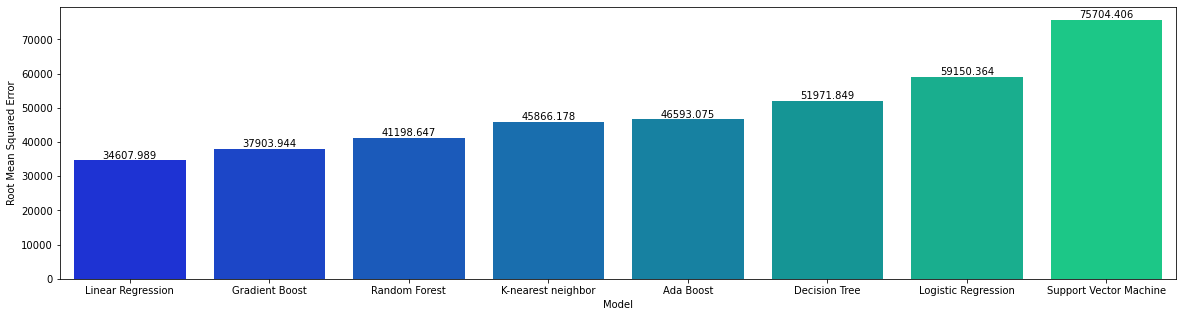

In [98]:
# plotting the graph for root mean square error for each model based on above dataframe
plt.figure(figsize=(20,5))
ax.set_title('Model Comparison: Root Mean Squared Error', fontsize=13)
color = 'tab:blue'
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('Root Mean Squared Error', fontsize=18)
ax = sns.barplot(x='Model', y='Root Mean Squared Error', data = data, palette='winter', order=data.sort_values('Root Mean Squared Error',ascending = True).Model)
ax.tick_params(axis='y')
for c in ax.containers:                        # labelling the root mean square error for each model
    labels = [f'{round(float((v.get_height())),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

From the above graph, we can see that the Linear Regression model is performing the best followed by Gradient Boost and Random Forest.

Let's check for if we can improve our model with regularizations.

In [99]:
# importing necessary libraries
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

### Lasso Regularization

In [100]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000)
lasscv.fit(X_train, y_train)

LassoCV()

In [101]:
# best alpha parameter
alpha = lasscv.alpha_

In [102]:
# checking the alpha value
alpha

240.44578830193484

In [103]:
# now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=240.44578830193484)

In [104]:
# Call the function and pass dataset to check train and test score
metric_score(lasso_reg,X_train,X_test,y_train,y_test, train = True)   # This is for training score

lasso_reg_rmse = metric_score(lasso_reg,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.8063065821845343
Mean absolute error is : 20932.28861888311
Mean squared error is : 1157542899.456333
Root Mean squared error is : 34022.682132017944
R2 score is : 0.8063065821845343

========================Test Result========================
Testing Score is: 0.8060546636755327
Mean absolute error is : 23347.85661683682
Mean squared error is : 1373268054.6971273
Root Mean squared error is : 37057.631531131716
R2 score is : 0.8060546636755327
Cross-Validation Accuracy Scores [0.99414803 0.98874222 0.99238265 0.98982738 0.99388329 0.98958735
 0.99232469 0.97004061 0.99207565 0.99061909]


### Ridge Regularization

In [105]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [106]:
# checking the alpha value
ridgecv.alpha_

0.09099999999999998

In [107]:
# Running the ridge model
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.09099999999999998)

In [108]:
# Call the function and pass dataset to check train and test score
metric_score(ridge_model,X_train,X_test,y_train,y_test, train = True)   # This is for training score

ridge_model_rmse = metric_score(ridge_model,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.8262060130376091
Mean absolute error is : 19662.021944225246
Mean squared error is : 1038620712.2855525
Root Mean squared error is : 32227.63894990684
R2 score is : 0.8262060130376091

========================Test Result========================
Testing Score is: 0.8306616015107826
Mean absolute error is : 22172.853487550557
Mean squared error is : 1199033797.2848554
Root Mean squared error is : 34627.06740809645
R2 score is : 0.8306616015107826
Cross-Validation Accuracy Scores [0.99960325 0.99987864 0.99970601 0.99984359 0.99981507 0.99982789
 0.99993322 0.99944528 0.99977916 0.99968291]


### Hyperparameter Tuning

Since the linear regression is the best performing model. Therefore, selecting the Gradient Boosting and Random Forest - the next 2 top performing models for the hyperparameter tuning.

In [109]:
# importing the necessary library
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tuning for Gradient Boosting

In [111]:
# selecting the parameters for Gradient Boosting
gb = GradientBoostingRegressor()
learning_rate = [0.01, 0.1, 1]
n_estimators = [300,400,500,600,700,800,900]
subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_split = [1,2,3,4,5,6,7]
max_depth = range(5,16,1)
random_state = [85]
# define grid search
grid = dict(learning_rate = learning_rate, n_estimators = n_estimators, subsample = subsample, 
            min_samples_split = min_samples_split, max_depth = max_depth, random_state = random_state)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=gb, param_grid=grid, n_jobs=-1, error_score=0, verbose = 1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 8085 candidates, totalling 40425 fits


/Users/sk/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/sk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5775 fits failed out of a total of 40425.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5775 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sk/opt/anaco

Best: 0.877761 using {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 85, 'subsample': 0.8}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 300, 'random_state': 85, 'subsample': 0.6}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 300, 'random_state': 85, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 300, 'random_state': 85, 'subsample': 0.8}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 300, 'random_state': 85, 'subsample': 0.9}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 300, 'random_state': 85, 'subsample': 1.0}
0.000000 (0.000000) with: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 1, 'n_estimators': 400, '

In [112]:
# Running the gradient boosting with best parameters
gb = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, min_samples_split= 4, n_estimators= 300, random_state= 85, subsample= 0.8)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=4, n_estimators=300,
                          random_state=85, subsample=0.8)

In [113]:
# Call the function and pass dataset to check train and test score
metric_score(gb,X_train,X_test,y_train,y_test, train = True)   # This is for training score

gb_rmse = metric_score(gb,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.9999950404292275
Mean absolute error is : 134.98940421623493
Mean squared error is : 29639.189585364154
Root Mean squared error is : 172.1603600872284
R2 score is : 0.9999950404292275

========================Test Result========================
Testing Score is: 0.7644535815148367
Mean absolute error is : 24453.504660999668
Mean squared error is : 1667832689.5308197
Root Mean squared error is : 40839.107354725806
R2 score is : 0.7644535815148367
Cross-Validation Accuracy Scores [0.86066685 0.84642145 0.94476832 0.87649499 0.92604157 0.93536663
 0.90777757 0.87811729 0.81157163 0.90453492]


### Hypertuning for Random Forest

In [114]:
# selecting the best parameters for random forest
rf = RandomForestRegressor()
n_estimators = range(80, 151, 10)
max_depth = range(21,35,1)
min_samples_split = [1,2,3]
min_samples_leaf = [1,2,3]
random_state = [513]
# define grid search
grid = dict(n_estimators=n_estimators, max_depth = max_depth, random_state = random_state,
            min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, error_score=0, verbose = 2)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.7s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   1.9s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; tota

[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.4s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.6s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.4s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=130, random_state=513; total time=   4.1s
[CV] END max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.1s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=23, min_samples_leaf=2, min_sample

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.5s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.7s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.0s
[CV] END max_depth=21, min_samples_leaf=1, min_sampl

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.7s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.2s
[CV] END max_depth=21, min_samples_leaf=1, min_sam

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.7s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   1.9s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.2s
[CV] END max_depth=21, min_samples_leaf=1, min_sam

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.5s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.7s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.1s
[CV] END max_depth=21, min_samples_leaf=1, min_sampl

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.5s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   1.9s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.1s
[CV] END max_depth=21, min_samples_leaf=1, min_sam

[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.5s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   1.8s
[CV] END max_depth=21, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.0s
[CV] END max_depth=21, min_samples_leaf=1, min_sam

[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.1s
[CV] END max_depth=24, min_samples_leaf=1, min_s

[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.8s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.8s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=80, random_state=513; total time=   1.9s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.2s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.4s
[CV] END max_depth=23, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.4s
[CV] END max_depth=23, min_samples_leaf=2, min_sam

[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.1s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.5s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.9s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.9s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.6s
[CV] END max_depth=24, min_samples_leaf=1, min_sam

[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=513; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.5s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.1s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.4s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.3s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.5s
[CV] END max_depth=24, min_samples_leaf=3, min_s

[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.7s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=140, random_state=513; total time=   4.2s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.9s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.7s
[CV] END max_depth=24, min_samples_leaf=1, min_sam

[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   2.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=513; total time=   3.1s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   3.3s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.9s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.7s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.1s
[CV] END max_depth=24, min_samples_leaf=1, min_sam

[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.6s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=2, n_estimators=130, random_state=513; total time=   2.8s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.4s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.4s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.0s
[CV] END max_depth=23, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_sa

[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.4s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.2s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.2s
[CV] END max_depth=24, min_samples_leaf=2, min_samp

[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.8s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.1s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.3s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=80, random_state=513; total time=   1.7s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.1s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=3, min_samp

[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.4s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.8s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.0s
[CV] END max_depth=26, min_samples_leaf=3, min_s

[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=100, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_sample

[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.2s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.2s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=513; total time=   1.8s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.4s
[CV] END max_depth=27, min_samples_leaf=3, min_sa

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.3s[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.5s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.8s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.2s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.7s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.3s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=1, n_estimators=90, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=2, min_sample

[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=80, random_state=513; total time=   1.7s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.3s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.6s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=130, random_state=513; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.5s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.2s
[CV] END max_depth=27, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=27, min_samples_leaf=1, min_sa

[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.2s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.9s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.7s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.4s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.7s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.0s
[CV] END max_depth=27, min_samples_leaf=2, min_sam

[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.5s
[CV] END max_depth=27, min_samples_leaf=2, min_samples_split=3, n_estimators=150, random_state=513; total time=   4.1s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.0s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.4s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.6s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.0s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.6s
[CV] END max_depth=27, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.6s
[CV] END max_depth=27, min_samples_leaf=3, min_sa

[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.6s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.5s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.6s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.8s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.0s
[CV] END max_depth=29, min_samples_leaf=2, min_sam


[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=513; total time=   3.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=513; total time=   4.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=2, min_sa

[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.0s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.6s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   3.1s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=2, n_estimators=110, random_state=513; total time=   3.3s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   3.7s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=2, n_estimators=140, random_state=513; total time=   4.3s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.7s
[CV] END max_depth=29, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=513; total time=   3.1s
[CV] END max_depth=29, min_samples_leaf=1, min_sa

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.9s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=3, n_estimators=150, random_state=513; total time=   4.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=130, random_state=513; total time=   3.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=2, min_sa

[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=120, random_state=513; total time=   2.9s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.5s
[CV] END max_depth=29, min_samples_leaf=2, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.7s
[CV] END max_depth=29, min_samples_leaf=3, min_samples_split=2, n_estimators=90, random_state=513; total time=   1.9s
[CV] END max_depth=29, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=29, min_samples_leaf=3, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.6s
[CV] END max_depth=29, min_samples_leaf=3, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.1s
[CV] END max_depth=29, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.3s
[CV] END max_depth=29, min_samples_leaf=3, min_sa

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=3, n_estimators=140, random_state=513; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=3, min_sample

/Users/sk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1680 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sk/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sk/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/sk/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/User

Best: 0.854644 using {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 80, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 90, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 100, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 110, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 120, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 130, 'random_state': 513}
0.000000 (0.000000) with: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samp

[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   5.0s
[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=513; total time=   3.0s
[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.3s
[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.6s
[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.2s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=110, random_state=513; total time=   0.1s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=33, min_samples_leaf=2, min_s

[CV] END max_depth=32, min_samples_leaf=2, min_samples_split=3, n_estimators=150, random_state=513; total time=   4.2s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.0s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=120, random_state=513; total time=   2.7s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=140, random_state=513; total time=   3.2s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.4s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.3s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.6s
[CV] END max_depth=32, min_samples_leaf=3, min_sa

[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.5s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=2, n_estimators=130, random_state=513; total time=   2.9s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.4s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=3, n_estimators=80, random_state=513; total time=   1.8s
[CV] END max_depth=31, min_samples_leaf=3, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.0s
[CV] END max_depth=31, min_samples_leaf=3, min_samp

[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=120, random_state=513; total time=   0.1s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.2s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.2s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=2, n_estimators=80, random_state=513; total time=   2.0s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=2, n_estimators=90, random_state=513; total time=   2.2s
[CV] END max_depth=33, min_samples_leaf=2, min_samples_split=2, n_estimators=110, random_state=513; total time=   2.7s
[CV] END max_depth=33, min_samples_leaf=2, min_sam

[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=130, random_state=513; total time=   2.9s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2, n_estimators=150, random_state=513; total time=   3.4s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.0s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.0s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.0s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.5s
[CV] END max_depth=33, min_samples_leaf=1, min_samples_split=2, n_estimators=90, random_state=513; total time=   3.1s
[CV] END max_depth=33, min_samples_leaf=1, min_sam

[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=513; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=110, random_state=513; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=130, random_state=513; total time=   3.3s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=150, random_state=513; total time=   3.4s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=1, n_estimators=130, random_state=513; total time=   0.1s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=1, n_estimators=140, random_state=513; total time=   0.1s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=1, n_estimators=150, random_state=513; total time=   0.2s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=80, random_state=513; total time=   2.5s
[CV] END max_depth=31, min_samples_leaf=1, min_sa

[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=120, random_state=513; total time=   3.7s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=140, random_state=513; total time=   4.4s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=513; total time=   4.8s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=3, n_estimators=90, random_state=513; total time=   2.5s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=3, n_estimators=110, random_state=513; total time=   3.6s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=3, n_estimators=120, random_state=513; total time=   3.4s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=3, n_estimators=140, random_state=513; total time=   4.1s
[CV] END max_depth=31, min_samples_leaf=2, min_samples_split=1, n_estimators=80, random_state=513; total time=   0.1s
[CV] END max_depth=31, min_samples_leaf=2, min_sam

In [114]:
# running the random forest with the best parameters
rf = RandomForestRegressor(max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 110, random_state= 513)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=110, random_state=513)

In [115]:
# Call the function and pass dataset to check train and test score
metric_score(rf,X_train,X_test,y_train,y_test, train = True)   # This is for training score

rf_rmse = metric_score(rf,X_train,X_test,y_train,y_test, train = False)  # This is for testing score


========================Train Result========================
Training Score is: 0.9608443020970685
Mean absolute error is : 9518.641718555416
Mean squared error is : 234000724.4023993
Root Mean squared error is : 15297.082218593168
R2 score is : 0.9608443020970685

========================Test Result========================
Testing Score is: 0.7608123548903388
Mean absolute error is : 26422.802490660022
Mean squared error is : 1693615109.969999
Root Mean squared error is : 41153.55525310054
R2 score is : 0.7608123548903388
Cross-Validation Accuracy Scores [0.91760842 0.88130341 0.95926236 0.95036286 0.95839111 0.94498266
 0.95847038 0.8831461  0.90474123 0.95059931]


In [116]:
# creating the dataframe for root mean square error for regularised models and hypertuned models along with the linear regression
rmse = [lr_rmse, lasso_reg_rmse, ridge_model_rmse, rf_rmse, gb_rmse]
model = ['Linear Regression', 'Lasso Regression','Ridge Regression','Random Forest','Gradient Boost']

model_data = {'Model': model, 'Root Mean Squared Error': rmse}
data = pd.DataFrame(model_data)

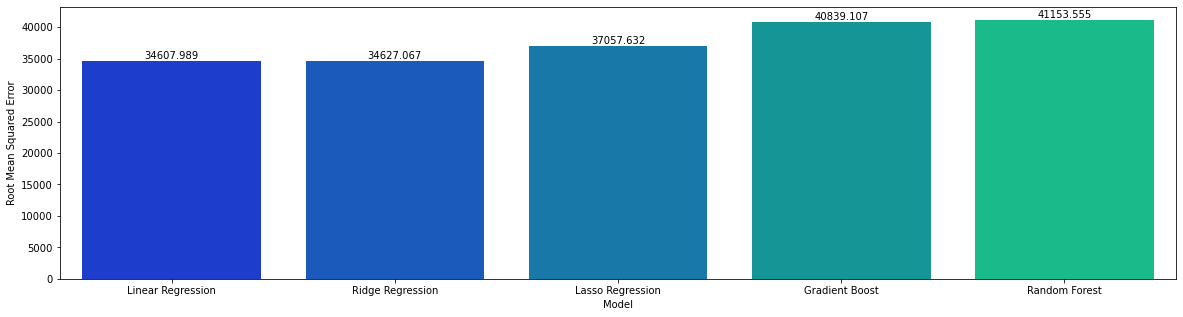

In [117]:
# plotting the graph for root mean square error for each model based on above dataframe
plt.figure(figsize=(20,5))
ax.set_title('Model Comparison: Root Mean Squared Error', fontsize=13)
color = 'tab:blue'
ax.set_xlabel('Model', fontsize=18)
ax.set_ylabel('Root Mean Squared Error', fontsize=18)
ax = sns.barplot(x='Model', y='Root Mean Squared Error', data = data, palette='winter', order=data.sort_values('Root Mean Squared Error',ascending = True).Model)
ax.tick_params(axis='y')
for c in ax.containers:
    labels = [f'{round(float((v.get_height())),3)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

Hypertuning the model did not reduce the root mean square error for Gradient Boosting but increased it and for Random Forest it didnot decreased by significant amount. Ridge Regression Regression seems to perform well than Lasso Regression but both do not outperform the Linear Regression. Therefore, selecting the linear regression model.

In [126]:
test_dataset

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            20       3.0         86.0    14157     1.0       0.0   
1           120       3.0         70.0     5814     1.0       0.0   
2            20       3.0         70.0    11838     1.0       3.0   
3            70       3.0         75.0    12000     1.0       3.0   
4            60       3.0         86.0    14598     1.0       0.0   
..          ...       ...          ...      ...     ...       ...   
287          20       3.0         78.0    10206     1.0       3.0   
288          20       3.0         57.0     9245     1.0       1.0   
289          20       3.0         70.0    11241     1.0       0.0   
290          50       4.0         50.0     5000     1.0       3.0   
291         160       4.0         21.0     1953     1.0       3.0   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1.0        0.0        0.0        0.0          22.0         2.0   
1            3.0        0.0        1.0        0.0          22.0         2.0   
2            3.0        0.0        4.0        0.0           5.0         2.0   
3            0.0        0.0        4.0        0.0           6.0         2.0   
4            3.0        0.0        1.0        0.0          21.0         1.0   
..           ...        ...        ...        ...           ...         ...   
287          3.0        0.0        4.0        0.0          21.0         2.0   
288          3.0        0.0        4.0        0.0           5.0         2.0   
289          3.0        0.0        1.0        0.0          12.0         2.0   
290          3.0        0.0        0.0        0.0           3.0         1.0   
291          3.0        0.0        4.0        0.0           2.0         2.0   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2.0       0.0         2.0            9            5       2005   
1           2.0       4.0         2.0            8            5       1984   
2           2.0       0.0         2.0            8            5       2001   
3           2.0       0.0         5.0            7            7       1941   
4           2.0       0.0         5.0            6            5       2007   
..          ...       ...         ...          ...          ...        ...   
287         2.0       0.0         2.0            8            5       2007   
288         2.0       0.0         2.0            5            5       1994   
289         2.0       0.0         2.0            6            7       1970   
290         2.0       0.0         0.0            6            7       1947   
291         2.0       3.0         5.0            6            5       1973   

     YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            2006        3.0       1.0         12.0         13.0         3.0   
1            1984        1.0       1.0          6.0          6.0         2.0   
2            2001        3.0       1.0         12.0         13.0         2.0   
3            1950        1.0       1.0          8.0          8.0         2.0   
4            2007        1.0       1.0         12.0         13.0         3.0   
..            ...        ...       ...          ...          ...         ...   
287          2007        1.0       1.0         12.0         13.0         3.0   
288          1995        1.0       1.0         12.0         13.0         2.0   
289          1970        1.0       1.0         13.0         14.0         1.0   
290          1950        1.0       1.0          5.0          5.0         2.0   
291          1973        1.0       1.0          6.0          6.0         1.0   

     MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         200.0        2.0        4.0         2.0       0.0       4.0   
1           0.0        2.0        4.0         1.0       2.0       4.0   
2           0.0        2.0        4.0         2.0       2.0       4.0   
3           0.0        3.0        4.0

### Predicting Price on test dataset

In [138]:
# standardize test dataset
scaler = MinMaxScaler()

test_data = scaler.fit_transform(test_dataset)

In [140]:
# selecting 65 features based on train data analysis for test dataset
pca = PCA (n_components=65)
new_pcomp = pca.fit_transform(test_data)
test_data = pd.DataFrame(new_pcomp)
test_data

0         1         2         3         4         5         6   \
0    1.680313  0.497874  0.502568 -0.493494  0.106935  0.479548 -0.021445   
1    0.622867  1.054884 -0.310536 -0.069650  0.753352  0.778961 -0.206511   
2    0.829295 -0.777063  0.036528 -0.596866 -0.328178  0.179077 -0.617775   
3   -0.505678 -0.418805  0.215317  0.206880 -0.338564 -0.076789  0.123644   
4    1.067336 -0.444211  0.794072  0.533560  0.371211  0.289200  0.203030   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.583432 -0.517139 -0.060319 -0.438257 -0.505142 -0.372801 -0.115134   
288 -0.152249  0.005286  0.084775 -0.492629  0.375686 -0.786624  0.355704   
289  0.262057  0.737243  0.374643 -0.124767 -0.031232 -0.237961  0.926522   
290 -0.599923  0.386017  0.363425  0.086198 -0.244796  0.155185  0.454242   
291 -1.094248  0.140582 -0.860164  0.791393  0.568356 -0.149989 -0.209000   

           7         8         9         10        11        12        13  \
0   -0.090212  0.000568 -0.335309 -0.065068 -0.343674 -0.099218 -0.106852   
1   -0.565869 -0.350056  0.525309  0.279896  0.279460 -0.487053  0.149258   
2   -0.303082 -0.137752  0.150162 -0.089505  0.352495 -0.162823 -0.133042   
3    0.032890  0.484968  0.419156  0.468282  0.488573 -0.006784 -0.000433   
4   -0.078567 -0.076862  0.016163 -0.173572  0.127384  0.121514  0.113403   
..        ...       ...       ...       ...       ...       ...       ...   
287 -0.335419 -0.100703 -0.040367  0.054277 -0.317042 -0.266277  0.151096   
288 -0.047792  0.005940  0.311498 -0.246071 -0.150234  0.170490 -0.176535   
289  0.126987 -0.506315 -0.108399 -0.102399  0.479973  0.154521 -0.592962   
290 -0.421003  0.732022 -0.509933  0.734762 -0.200666 -0.490863 -0.330409   
291  0.175161  0.207613 -0.118242  0.246905 -0.372844  0.035025 -0.041210   

           14        15        16        17        18        19        20  \
0    0.171286 -0.347801 -0.083173  0.213022  0.235141  0.063848  0.295794   
1    0.059374  0.114948 -0.126321  0.637419 -0.371625  0.158860  0.066447   
2   -0.267239  0.326456  0.151024 -0.472712  0.126954 -0.241498 -0.112274   
3   -0.226530 -0.074275 -0.141904 -0.180104  0.077873 -0.245437  0.894987   
4   -0.123281 -0.353840 -0.183752 -0.029346  0.081069  0.367366 -0.157827   
..        ...       ...       ...       ...       ...       ...       ...   
287 -0.172046  0.197039 -0.021526  0.355021  0.051492 -0.086949  0.124053   
288  0.309973 -0.111917  0.600837 -0.254629  0.000806  0.277909 -0.084236   
289  0.032693  0.101215 -0.182213  0.053766  0.139208 -0.235476 -0.069501   
290 -0.569901  0.373679  0.290789 -0.210795 -0.013755 -0.175779 -0.084170   
291  0.017411  0.161435  0.349330 -0.278497 -0.168302  0.023855 -0.093639   

           21        22        23        24        25        26        27  \
0   -0.258211 -0.022798 -0.078945 -0.138227  0.114674  0.176797 -0.280921   
1   -0.209082 -0.275497 -0.332734  0.252200  0.025023  0.088390  0.045042   
2    0.462659  0.061795  0.039323 -0.078945 -0.163153 -0.063578 -0.002558   
3    0.156319 -0.383720 -0.182457  0.270866 -0.044163  0.023234 -0.268317   
4   -0.061868  0.131610 -0.256458 -0.014164  0.434483 -0.160163  0.099595   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.039749  0.212139 -0.281760 -0.117952  0.188885  0.129871  0.137686   
288 -0.100809 -0.204650 -0.477580 -0.342307  0.014533 -0.138559  0.054299   
289  0.002613  0.164221  0.029585 -0.211324  0.264900  0.053347 -0.035338   
290 -0.316781 -0.210789 -0.254152 -0.165939  0.122869  0.159251 -0.111612   
291  0.063840 -0.328243  0.106404  0.294132  0.317009  0.535075  0.338698   

           28        29        30        31        32        33        34  \
0   -0.037620  0.125950  0.041235 -0.047156  0.122167  0.059167  0.057662   
1   -0.089977 -0.291171 -0.004498 -0.027923  0.135598  0.148296  0.155169   
2   -0.155391  0.042213 -0.010959 -0.129419  0.267971  0.311465  0.157508   
3  

In [142]:
# predicting SalePrice for test dataset
lr_pred=lr.predict(test_data)

In [143]:
# converting the dataframe for SalePrice
df = pd.DataFrame({'SalePrice': lr_pred})

In [144]:
# calling the dataframe for the SalePrice
df

SalePrice
0    334723.881315
1    264832.346965
2    247980.903599
3    231881.080513
4    254193.579129
..             ...
287  246082.680601
288  131559.533151
289  122616.050787
290  200030.159989
291  111266.289942

[292 rows x 1 columns]

Above dataframe represents the SalePrice for the test dataset based on linear regression which performed well compared to other models.